### DOWNLOAD PACKAGES

In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr

### LINE OF BEST FIT

In [2]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

### REGION OF INTEREST

In [3]:
t = open("bndgmw.txt", "r", encoding="utf-8")
t.read()
t = '  42.20   70.50\n  42.00   70.00\n  41.10   69.00\n  41.80   68.00\n  44.20   68.00\n  43.90   69.00\n  43.70   70.00\n  43.00   70.50\n  42.20   70.50'
output1t = t.split('\n')
newt = [] 
for string in output1t:
    output2t = string.split(' ')
    newt.append(output2t)
lon_t = []; lat_t = []

for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})

lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

In [4]:
polygon_t = Polygon(df_t.values)
print(polygon_t)

POLYGON ((70.5 42.2, 70 42, 69 41.1, 68 41.8, 68 44.2, 69 43.9, 70 43.7, 70.5 43, 70.5 42.2))


### ANNUAL TREND - STANDARD DEVIATION and BY MONTHS

In [6]:
januarystd = statistics.stdev([82.93333333333334,73.64285714285714,98.11111111111111,
                           87.5,82.27272727272727,73.29411764705883,80.73333333333333,
                           99.23076923076923,64.53846153846153,63.76923076923077,
                           114.05555555555556,106.83333333333333,85.10555555555555,
                           70.93181818181819,84.34782608695652,87.4375,
                           61.22727272727273,97.0,146.78571428571428,58.0,89.2])
februarystd = statistics.stdev([89.9,68.55555555555556,66.57894736842105,103.86666666666666,
                            92.6923076923077,100.25,74.71428571428571,90.0,
                            102.76923076923077,123.75,49.714285714285715,85.73076923076923,
                            73.51,84.05882352941177,106.0,76.3076923076923,70.27586206896552,
                            82.35714285714286,62.02857142857143,62.46,73.44444444444444,
                            95.0,86.14285714285714])
marchstd = statistics.stdev([47.72,57.333333333333336,110.58333333333333,
                         82.92307692307692,72.33333333333333,86.0,
                         79.55555555555556,43.42857142857143,
                         51.4,83.75714285714287,38.3125,
                         90.45833333333333,69.58823529411765,
                         78.26666666666667,65.4375,62.46666666666667])
aprilstd = statistics.stdev([79.75,83.57142857142857,87.53846153846153,
                         67.38636363636364,80.4090909090909,84.89189189189189,
                         62.925925925925924,81.85,84.8780487804878,89.26164383561644,
                         90.95833333333333,117.81481481481481,72.09615384615384,79.6086956521739,
                         79.01923076923077,57.472727272727276,57.7,78.18518518518519,
                         84.85106382978724,71.91666666666667,84.51282051282051,48.77777777777778,
                         88.875,52.46938775510204,55.10526315789474,21.0,
                         66.45833333333333,36.23076923076923,75.93333333333334])
maystd = statistics.stdev([35.56521739130435,8.366666666666667,20.642857142857142,
                       9.0,12.0,34.09090909090909,22.333333333333332,
                       5.714285714285714,12.142857142857142,88.66666666666667,
                       52.875,34.93636363636364,11.1,13.444444444444445,34.2,
                       17.6,13.225806451612904,22.464646464646464,20.61111111111111,
                       37.68421052631579,42.0,148.0,77.0,26.901639344262296,49.32432432432432,
                       22.256410256410255,39.130434782608695,15.961538461538462,64.88571428571429,
                       20.02777777777778,70.17647058823529])
junestd = statistics.stdev([6.115384615384615,7.166666666666667,18.5,6.6,14.6,
                        13.6,6.294117647058823,18.647058823529413,12.2,16.0,
                        6.55,9.075,10.551724137931034,12.307692307692308,13.0,
                        11.84375,11.0625,10.714285714285714,11.894736842105264,
                        10.066666666666666,21.75,7.769230769230769,10.851851851851851,
                        11.676470588235293,6.5,11.727272727272727,13.875,9.377358490566039,
                        9.214285714285714,11.791666666666666,9.172413793103448])
julystd = statistics.stdev([7.72,5.428571428571429,5.0,7.0,
                        6.75,8.0,7.461538461538462,8.444444444444445,
                        7.0,7.0,8.555555555555555,7.0,9.0,6.0,13.0,11.0])
auguststd = statistics.stdev([0.6451612903225806,10.166666666666666,7.523809523809524,
                          6.5,9.428571428571429,7.705882352941177,7.0,17.0,
                          8.444444444444445,8.608695652173912,8.96875,8.5,8.0,
                          10.461538461538462,7.791666666666667,10.521739130434783,
                          8.2,8.352941176470589,10.0,9.933333333333334,8.6875,
                          8.647058823529411,9.538461538461538,10.1875,
                          7.7727272727272725,10.0,8.6,10.5])
septemberstd = statistics.stdev([8.75,7.4,7.92,13.478260869565217,
                             11.592592592592593,17.0,12.0,8.0,
                             12.0,16.333333333333332,11.907692307692308,
                             11.23404255319149,11.857142857142858,12.28,
                             12.166666666666666,13.767857142857142,
                             11.0,15.75,13.526315789473685,15.172413793103448,
                             11.647887323943662,14.222222222222221,
                             7.555555555555555,10.428571428571429,50.0,17.0])
octoberstd = statistics.stdev([29.6,23.321428571428573,26.64,35.53333333333333,
                           20.6,26.11764705882353,28.540983606557376,28.367346938775512,
                           27.02,24.704545454545453,26.28846153846154,35.36666666666667,
                           27.03125,28.0,25.379310344827587,20.232142857142858,
                           36.152542372881356,29.29310344827586,27.754716981132077,
                           27.821428571428573,22.258823529411764,17.160493827160494,
                           25.776119402985074,22.975,29.660377358490567,15.859375,
                           21.56179775280899,31.363636363636363,24.82608695652174,
                           37.9811320754717,34.63333333333333,24.545454545454547,31.47222222222222,29.636363636363637])
novemberstd = statistics.stdev([32.333333333333336,51.878787878787875,30.555555555555557,37.666666666666664,
                            26.0,45.25,29.666666666666668,49.75,54.0,31.75,36.75,31.94736842105263,
                            40.81818181818182,18.0,35.23809523809524,49.09090909090909,42.484848484848484,
                            45.018181818181816,51.111111111111114,52.388888888888886,51.0,
                            71.3,34.285714285714285,58.22727272727273,43.951219512195124,42.44444444444444,
                            32.98245614035088,33.535714285714285,53.82539682539682,69.953125,48.98275862068966,
                            43.3,64.41935483870968,62.73076923076923,49.421052631578945,43.375,41.22222222222222,
                            68.41666666666667,54.391304347826086])
decemberstd = statistics.stdev([62.5,64.75,73.61538461538461,93.0,
                            64.0,81.47058823529412,56.18181818181818,
                            66.70370370370371,70.72222222222223,47.0,
                            68.28571428571429,82.9090909090909,68.125,
                            87.375,77.07142857142857,34.86666666666667,
                            82.0,72.97142857142858,71.0])

In [7]:
january = statistics.mean([82.93333333333334,73.64285714285714,98.11111111111111,
                           87.5,82.27272727272727,73.29411764705883,80.73333333333333,
                           99.23076923076923,64.53846153846153,63.76923076923077,
                           114.05555555555556,106.83333333333333,85.10555555555555,
                           70.93181818181819,84.34782608695652,87.4375,
                           61.22727272727273,97.0,146.78571428571428,58.0,89.2])
february = statistics.mean([89.9,68.55555555555556,66.57894736842105,103.86666666666666,
                            92.6923076923077,100.25,74.71428571428571,90.0,
                            102.76923076923077,123.75,49.714285714285715,85.73076923076923,
                            73.51,84.05882352941177,106.0,76.3076923076923,70.27586206896552,
                            82.35714285714286,62.02857142857143,62.46,73.44444444444444,
                            95.0,86.14285714285714])
march = statistics.mean([47.72,57.333333333333336,110.58333333333333,
                         82.92307692307692,72.33333333333333,86.0,
                         79.55555555555556,43.42857142857143,
                         51.4,83.75714285714287,38.3125,
                         90.45833333333333,69.58823529411765,
                         78.26666666666667,65.4375,62.46666666666667])
april = statistics.mean([79.75,83.57142857142857,87.53846153846153,
                         67.38636363636364,80.4090909090909,84.89189189189189,
                         62.925925925925924,81.85,84.8780487804878,89.26164383561644,
                         90.95833333333333,117.81481481481481,72.09615384615384,79.6086956521739,
                         79.01923076923077,57.472727272727276,57.7,78.18518518518519,
                         84.85106382978724,71.91666666666667,84.51282051282051,48.77777777777778,
                         88.875,52.46938775510204,55.10526315789474,21.0,
                         66.45833333333333,36.23076923076923,75.93333333333334])
may = statistics.mean([35.56521739130435,8.366666666666667,20.642857142857142,
                       9.0,12.0,34.09090909090909,22.333333333333332,
                       5.714285714285714,12.142857142857142,88.66666666666667,
                       52.875,34.93636363636364,11.1,13.444444444444445,34.2,
                       17.6,13.225806451612904,22.464646464646464,20.61111111111111,
                       37.68421052631579,42.0,148.0,77.0,26.901639344262296,49.32432432432432,
                       22.256410256410255,39.130434782608695,15.961538461538462,64.88571428571429,
                       20.02777777777778,70.17647058823529])
june = statistics.mean([6.115384615384615,7.166666666666667,18.5,6.6,14.6,
                        13.6,6.294117647058823,18.647058823529413,12.2,16.0,
                        6.55,9.075,10.551724137931034,12.307692307692308,13.0,
                        11.84375,11.0625,10.714285714285714,11.894736842105264,
                        10.066666666666666,21.75,7.769230769230769,10.851851851851851,
                        11.676470588235293,6.5,11.727272727272727,13.875,9.377358490566039,
                        9.214285714285714,11.791666666666666,9.172413793103448])
july = statistics.mean([7.72,5.428571428571429,5.0,7.0,
                        6.75,8.0,7.461538461538462,8.444444444444445,
                        7.0,7.0,8.555555555555555,7.0,9.0,6.0,13.0,11.0])
august = statistics.mean([0.6451612903225806,10.166666666666666,7.523809523809524,
                          6.5,9.428571428571429,7.705882352941177,7.0,17.0,
                          8.444444444444445,8.608695652173912,8.96875,8.5,8.0,
                          10.461538461538462,7.791666666666667,10.521739130434783,
                          8.2,8.352941176470589,10.0,9.933333333333334,8.6875,
                          8.647058823529411,9.538461538461538,10.1875,
                          7.7727272727272725,10.0,8.6,10.5])
september = statistics.mean([8.75,7.4,7.92,13.478260869565217,
                             11.592592592592593,17.0,12.0,8.0,
                             12.0,16.333333333333332,11.907692307692308,
                             11.23404255319149,11.857142857142858,12.28,
                             12.166666666666666,13.767857142857142,
                             11.0,15.75,13.526315789473685,15.172413793103448,
                             11.647887323943662,14.222222222222221,
                             7.555555555555555,10.428571428571429,50.0,17.0])
october = statistics.mean([29.6,23.321428571428573,26.64,35.53333333333333,
                           20.6,26.11764705882353,28.540983606557376,28.367346938775512,
                           27.02,24.704545454545453,26.28846153846154,35.36666666666667,
                           27.03125,28.0,25.379310344827587,20.232142857142858,
                           36.152542372881356,29.29310344827586,27.754716981132077,
                           27.821428571428573,22.258823529411764,17.160493827160494,
                           25.776119402985074,22.975,29.660377358490567,15.859375,
                           21.56179775280899,31.363636363636363,24.82608695652174,
                           37.9811320754717,34.63333333333333,24.545454545454547,31.47222222222222,29.636363636363637])
november = statistics.mean([32.333333333333336,51.878787878787875,30.555555555555557,37.666666666666664,
                            26.0,45.25,29.666666666666668,49.75,54.0,31.75,36.75,31.94736842105263,
                            40.81818181818182,18.0,35.23809523809524,49.09090909090909,42.484848484848484,
                            45.018181818181816,51.111111111111114,52.388888888888886,51.0,
                            71.3,34.285714285714285,58.22727272727273,43.951219512195124,42.44444444444444,
                            32.98245614035088,33.535714285714285,53.82539682539682,69.953125,48.98275862068966,
                            43.3,64.41935483870968,62.73076923076923,49.421052631578945,43.375,41.22222222222222,
                            68.41666666666667,54.391304347826086])
december = statistics.mean([62.5,64.75,73.61538461538461,93.0,
                            64.0,81.47058823529412,56.18181818181818,
                            66.70370370370371,70.72222222222223,47.0,
                            68.28571428571429,82.9090909090909,68.125,
                            87.375,77.07142857142857,34.86666666666667,
                            82.0,72.97142857142858,71.0])

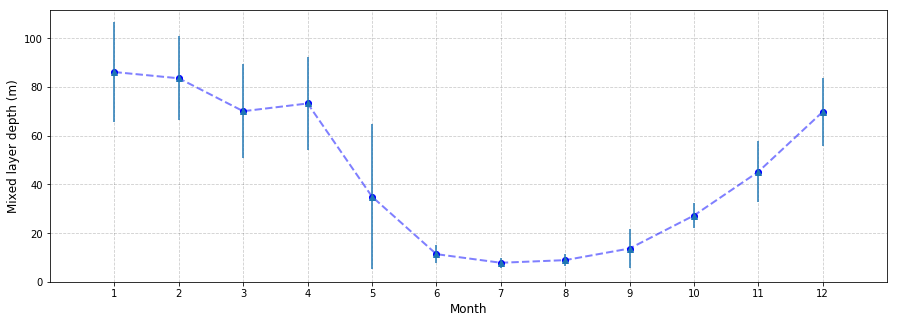

In [96]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [january, february, march, april, may, june, july, august, september,october,november,december]
e = [januarystd, februarystd, marchstd, aprilstd, maystd, junestd, julystd, auguststd, septemberstd,octoberstd,novemberstd,decemberstd]

plt.figure(figsize=(15, 5))
plt.xlim((0,13))
# plt.ylim((0,65))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# # plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]) 
plt.errorbar(x, y, e, linestyle='None', marker='^')
# plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65])
plt.savefig('annualtrend_avgmonthly_timeseries_WesternGoM_withstd')
plt.show()

### SPRING

In [8]:
stddepth_1978= 50.837256508446195
stddepth_1979= 29.757609213820402
stddepth_1980= 57.287193029569
stddepth_1981= 47.204192903431775
stddepth_1982= 33.582816373192344
stddepth_1984= 55.567247621818225
stddepth_1985 =43.398661119696406
stddepth_1986 =1.749635530559413
stddepth_1987 =3.270149469217028
stddepth_1990 =0.0
stddepth_1991 =73.2236987536931
stddepth_1992 =35.54989373852221
stddepth_1993 =65.52907688465764
stddepth_1994 =62.20358197028736
stddepth_1995 =50.862406303673836
stddepth_1996 =45.28746405408858
stddepth_1997 =42.30203800312329
stddepth_1998 =44.6746922178509
stddepth_1999 =67.0265139638806
stddepth_2000 =71.49112027080616
stddepth_2001 =61.480221840155984
stddepth_2002 =70.23670484151666
stddepth_2003 =64.98736970060827
stddepth_2004 =48.24048713395316
stddepth_2005 =52.04785055353144
stddepth_2006 =45.15011686624996
stddepth_2007 =63.679041852156445
stddepth_2008 =61.13370076968889
stddepth_2009 =58.91609728879607
stddepth_2010 =65.88262592903804
stddepth_2011 =54.866306025279684
stddepth_2012 =49.67255260175425
stddepth_2013 =60.09240333665738
stddepth_2014 =43.111769635709095
stddepth_2015 =65.3673215668475
stddepth_2016 =35.881729622609605
stddepth_2017 =72.78152953646047
stddepth_2018 =36.89962820582878
stddepth_2019 =71.14097025778793

In [9]:
depth_1978 =41.895833333333336
depth_1979 =22.357142857142858
depth_1980 =62.15384615384615
depth_1981 =38.61904761904762
depth_1982 =42.166666666666664
depth_1984 =34.09090909090909
depth_1985 =55.30769230769231
depth_1986 =5.714285714285714
depth_1987 =12.142857142857142
depth_1990 =86.0
depth_1991 =87.53846153846153
depth_1992 =69.45283018867924
depth_1993 =80.4090909090909
depth_1994 =84.89189189189189
depth_1995 =63.375
depth_1996 =76.58904109589041
depth_1997 =71.51785714285714
depth_1998 =73.44215686274511
depth_1999 =82.19753086419753
depth_2000 =95.21621621621621
depth_2001 =72.09615384615384
depth_2002 =79.6086956521739
depth_2003 =69.11290322580645
depth_2004 =42.033112582781456
depth_2005 =37.05917159763314
depth_2006 =32.948412698412696
depth_2007 =84.85106382978724
depth_2008 =62.3448275862069
depth_2009 =67.12121212121212
depth_2010 =54.979166666666664
depth_2011 =80.87755102040816
depth_2012 =46.537974683544306
depth_2013 =51.285714285714285
depth_2014 =32.982142857142854
depth_2015 =57.605633802816904
depth_2016 =15.961538461538462
depth_2017 =57.125
depth_2018 =20.02777777777778
depth_2019 =71.48484848484848

best fit line:
y = -241.21 + 0.15x


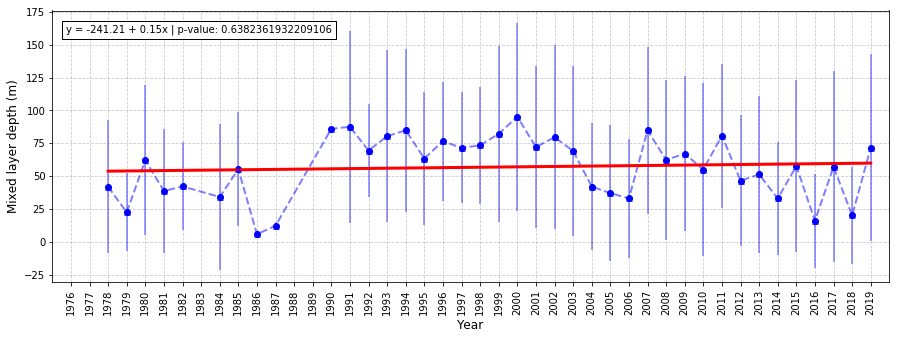

In [21]:
from matplotlib.offsetbox import AnchoredText

x = [1978,1979,1980,1981,1982,1984,1985,1986,1987,1990,1991,1992,
    1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,
    2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1984,depth_1985,
    depth_1986,depth_1987,depth_1990,depth_1991,depth_1992,depth_1993,depth_1994,
    depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,depth_2000,depth_2001,
    depth_2002,depth_2003,depth_2004,depth_2005,depth_2006,depth_2007,depth_2008,
    depth_2009,depth_2010,depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,
    depth_2016,depth_2017,depth_2018,depth_2019]
e = [stddepth_1978,stddepth_1979,stddepth_1980,stddepth_1981,stddepth_1982,
    stddepth_1984,stddepth_1985,stddepth_1986,stddepth_1987,stddepth_1990,
    stddepth_1991,stddepth_1992,stddepth_1993,stddepth_1994,stddepth_1995,
    stddepth_1996,stddepth_1997,stddepth_1998,stddepth_1999,stddepth_2000,
    stddepth_2001,stddepth_2002,stddepth_2003,stddepth_2004,stddepth_2005,
    stddepth_2006,stddepth_2007,stddepth_2008,stddepth_2009,stddepth_2010,
    stddepth_2011,stddepth_2012,stddepth_2013,stddepth_2014,stddepth_2015,
    stddepth_2016,stddepth_2017,stddepth_2018,stddepth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,100))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -241.21 + 0.15x | p-value: 0.6382361932209106".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
# plt.savefig('timeseries_spring_WesternGoM_withstd')
plt.show()

In [17]:
from scipy import stats
import numpy as np
# x = np.random.random(10)
# y = np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [18]:
print ("r-squared:", r_value**2)

r-squared: 0.006037430151576605


In [20]:
print ("p-value:", p_value)

p-value: 0.6382361932209106


### SUMMER

In [109]:
stddepth_1977 = 2.4567010018915836
stddepth_1978 =3.6669346857551437
stddepth_1979 =3.511380913311364
stddepth_1980 =2.9458453006136276
stddepth_1981 =3.0776975521032313
stddepth_1982 =12.00520720354297
stddepth_1983 =2.2891046284519194
stddepth_1984 =5.102940328869229
stddepth_1986 =6.770524351924303
stddepth_1987 =2.6516300399022694
stddepth_1991 =6.154888549862172
stddepth_1992 =1.841817105315592
stddepth_1993 =1.947367953440772
stddepth_1994 =12.573092086996706
stddepth_1995 =3.5692850710425676
stddepth_1996 =26.180701127570874
stddepth_1997 =2.8900571889766398
stddepth_1998 =2.8343278087447517
stddepth_1999 =3.182292275543547
stddepth_2000 =5.936049729452454
stddepth_2001 =4.102921435395729
stddepth_2002 =4.9933509509154534
stddepth_2003 =1.9390719429665315
stddepth_2004 =4.747244693496513
stddepth_2005 =3.8841646069492923
stddepth_2006 =3.855576833587955
stddepth_2007 =2.7421252306262462
stddepth_2008 =9.166635745155022
stddepth_2009 =2.9814239699997196
stddepth_2010 =8.229667078755362
stddepth_2011 =4.891292312306541
stddepth_2012 =1.649915822768611
stddepth_2013 =4.203408028404385
stddepth_2014 =5.932958789676531
stddepth_2015 =7.590083991630133
stddepth_2016 =3.322892884592166
stddepth_2017 =3.1887877550785313
stddepth_2018 =3.4728024206610493
stddepth_2019 =3.043403349554581

In [110]:
depth_1977 =0.6451612903225806
depth_1978 =8.193548387096774
depth_1979 =6.685714285714286
depth_1980 =6.190476190476191
depth_1981 =7.166666666666667
depth_1982 =18.5
depth_1983 =6.6
depth_1984 =14.6
depth_1986 =13.6
depth_1987 =6.294117647058823
depth_1991 =8.214285714285714
depth_1992 =7.523809523809524
depth_1993 =7.717948717948718
depth_1994 =14.090909090909092
depth_1995 =9.785714285714286
depth_1996 =12.304347826086957
depth_1997 =8.725000000000001
depth_1998 =8.802631578947368
depth_1999 =9.666666666666666
depth_2000 =11.384615384615385
depth_2001 =9.162790697674419
depth_2002 =11.290909090909091
depth_2003 =8.2
depth_2004 =9.588235294117647
depth_2005 =10.357142857142858
depth_2006 =10.693877551020408
depth_2007 =9.35483870967742
depth_2008 =11.142857142857142
depth_2009 =8.666666666666666
depth_2010 =10.604651162790697
depth_2011 =11.676470588235293
depth_2012 =7.666666666666667
depth_2013 =11.153846153846153
depth_2014 =13.0
depth_2015 =13.875
depth_2016 =9.310344827586206
depth_2017 =9.214285714285714
depth_2018 =11.703703703703704
depth_2019 =9.604651162790697

best fit line:
y = -121.79 + 0.07x


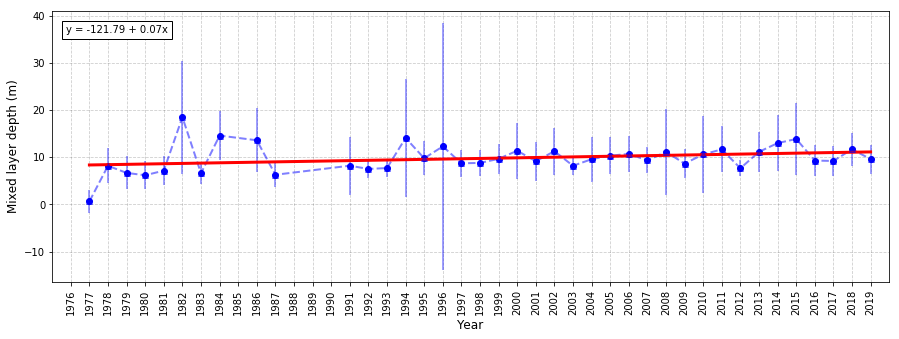

In [113]:
from matplotlib.offsetbox import AnchoredText

x = [1977,1978,1979,1980,1981,1982,1983,1984,1986,1987,1991,1992,
    1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,
    2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1984,
    depth_1986,depth_1987,depth_1991,depth_1992,depth_1993,depth_1994,
    depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,depth_2000,depth_2001,
    depth_2002,depth_2003,depth_2004,depth_2005,depth_2006,depth_2007,depth_2008,
    depth_2009,depth_2010,depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,
    depth_2016,depth_2017,depth_2018,depth_2019]
e = [stddepth_1977,stddepth_1978,stddepth_1979,stddepth_1980,stddepth_1981,stddepth_1982,stddepth_1983,stddepth_1984,
    stddepth_1986,stddepth_1987,stddepth_1991,stddepth_1992,stddepth_1993,stddepth_1994,
    stddepth_1995,stddepth_1996,stddepth_1997,stddepth_1998,stddepth_1999,stddepth_2000,stddepth_2001,
    stddepth_2002,stddepth_2003,stddepth_2004,stddepth_2005,stddepth_2006,stddepth_2007,stddepth_2008,
    stddepth_2009,stddepth_2010,stddepth_2011,stddepth_2012,stddepth_2013,stddepth_2014,stddepth_2015,
    stddepth_2016,stddepth_2017,stddepth_2018,stddepth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,20))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -121.79 + 0.07x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('SUMMER_MLDtimeseries_withstd.png')
plt.show()

### FALL

In [115]:
stddepth_1977 = 21.9778158660933
stddepth_1978 =22.94160325180683
stddepth_1979 =15.855735216333962
stddepth_1980 =13.48019122844908
stddepth_1981 =6.599663291074444
stddepth_1982 =14.127986409959489
stddepth_1984 =22.68672519338126
stddepth_1985 =8.60076823811189
stddepth_1986 =13.788625757280832
stddepth_1987 =8.665775398964948
stddepth_1988 =11.986972094736853
stddepth_1989 =15.059465461961125
stddepth_1990 =13.018508730267365
stddepth_1991 =18.343175809151266
stddepth_1992 =12.947724633265944
stddepth_1993 =13.474508837616199
stddepth_1994 =21.519339376781872
stddepth_1995 =10.821764039336513
stddepth_1996 =15.51953340004194
stddepth_1997 =18.19062640177322
stddepth_1998 =19.0683125493123
stddepth_1999 =27.36958633328906
stddepth_2000 =20.892818050330142
stddepth_2001 =16.41245676609364
stddepth_2002 =24.095560102368424
stddepth_2003 =12.939331205935073
stddepth_2004 =20.293395477346813
stddepth_2005 =18.59036201686342
stddepth_2006 =12.814444974324873
stddepth_2007 =13.761911102559926
stddepth_2008 =16.92535927242291
stddepth_2009 =29.018927600740465
stddepth_2010 =32.17227403741613
stddepth_2011 =18.95830211949921
stddepth_2012 =17.808490522609645
stddepth_2013 =32.302612963708754
stddepth_2014 =30.09072144289987
stddepth_2015 =18.675267657196514
stddepth_2016 =23.318837354872354
stddepth_2017 =19.20435272748861
stddepth_2018 =25.883778945408913
stddepth_2019 =21.72051692865277

In [116]:
depth_1977= 32.0
depth_1978= 36.92307692307692
depth_1979= 25.076923076923077
depth_1980= 35.53333333333333
depth_1981= 37.666666666666664
depth_1982= 26.0
depth_1984= 45.25
depth_1985= 10.25
depth_1986= 18.85185185185185
depth_1987= 13.107142857142858
depth_1988= 31.75
depth_1989= 36.75
depth_1990= 28.03448275862069
depth_1991= 29.711111111111112
depth_1992= 27.597014925373134
depth_1993= 30.239436619718308
depth_1994= 31.0
depth_1995= 22.75
depth_1996= 32.576470588235296
depth_1997= 35.36666666666667
depth_1998= 36.75
depth_1999= 46.44705882352941
depth_2000= 28.819148936170212
depth_2001= 21.794520547945204
depth_2002= 29.086206896551722
depth_2003= 24.419354838709676
depth_2004= 30.59
depth_2005= 26.32520325203252
depth_2006= 21.55
depth_2007= 23.60431654676259
depth_2008= 26.794701986754966
depth_2009= 37.4344262295082
depth_2010= 44.445205479452056
depth_2011= 24.264248704663213
depth_2012= 26.262857142857143
depth_2013= 53.74390243902439
depth_2014= 47.63414634146341
depth_2015= 41.12328767123287
depth_2016= 38.51851851851852
depth_2017= 33.734693877551024
depth_2018= 40.224489795918366
depth_2019= 49.6140350877193

best fit line:
y = -473.45 + 0.25x


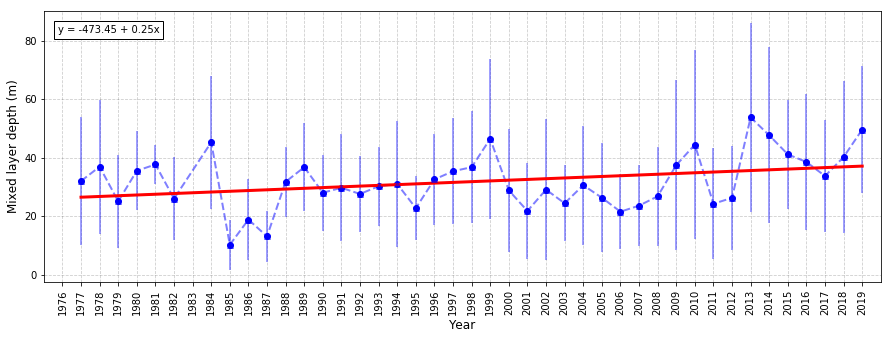

In [117]:
from matplotlib.offsetbox import AnchoredText

x = [1977,1978,1979,1980,1981,1982,1984,1985,1986,1987,1988,1989,1990, 1991,1992,
    1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,
    2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1984,depth_1985,
    depth_1986,depth_1987,depth_1988,depth_1989, depth_1990, depth_1991,depth_1992,depth_1993,depth_1994,
    depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,depth_2000,depth_2001,
    depth_2002,depth_2003,depth_2004,depth_2005,depth_2006,depth_2007,depth_2008,
    depth_2009,depth_2010,depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,
    depth_2016,depth_2017,depth_2018,depth_2019]
e = [stddepth_1977,stddepth_1978,stddepth_1979,stddepth_1980,stddepth_1981,stddepth_1982,stddepth_1984,stddepth_1985,
    stddepth_1986,stddepth_1987,stddepth_1988,stddepth_1989, stddepth_1990, stddepth_1991,stddepth_1992,stddepth_1993,stddepth_1994,
    stddepth_1995,stddepth_1996,stddepth_1997,stddepth_1998,stddepth_1999,stddepth_2000,stddepth_2001,
    stddepth_2002,stddepth_2003,stddepth_2004,stddepth_2005,stddepth_2006,stddepth_2007,stddepth_2008,
    stddepth_2009,stddepth_2010,stddepth_2011,stddepth_2012,stddepth_2013,stddepth_2014,stddepth_2015,
    stddepth_2016,stddepth_2017,stddepth_2018,stddepth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,60))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -473.45 + 0.25x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('FALL_MLDtimeseries_withstd.png')
plt.show()

### WINTER

In [119]:
stddepth_1977 = 18.7949461292125
stddepth_1979 =42.14780539956974
stddepth_1980 =38.466924960102205
stddepth_1981 =46.84888347625511
stddepth_1982 =22.561245844358567
stddepth_1983 =49.860157541819554
stddepth_1984 =38.264899037582005
stddepth_1985 =31.177310521563996
stddepth_1986 =32.60782727054281
stddepth_1987 =50.094311054250454
stddepth_1988 =14.829644882698263
stddepth_1989 =24.539687874782263
stddepth_1990 =22.05219660260628
stddepth_1991 =42.950629986731144
stddepth_1992 =49.668746460928524
stddepth_1993 =27.647286466841404
stddepth_1994 =30.973408608293767
stddepth_1995 =42.93720188583699
stddepth_1996 =50.470801213651534
stddepth_1997 =21.167083196089557
stddepth_1998 =36.77957780820764
stddepth_1999 =31.39545150177013
stddepth_2002 =36.1575869458956
stddepth_2003 =47.09654669658702
stddepth_2004 =41.07919181288746
stddepth_2005 =48.58792754996974
stddepth_2006 =30.649904839439007
stddepth_2007 =27.0553587772058
stddepth_2008 =36.8373840769964
stddepth_2009 =34.218013515977105
stddepth_2010 =35.76420796590596
stddepth_2011 =24.540057821240406
stddepth_2012 =23.153806715788633
stddepth_2013 =45.6737915887792
stddepth_2017 =54.0355136432872

In [120]:
depth_1977 =62.5
depth_1979 =64.75
depth_1980 =83.48484848484848
depth_1981 =81.71794871794872
depth_1982 =65.11363636363636
depth_1983 =89.08510638297872
depth_1984 =68.71794871794872
depth_1985 =74.55555555555556
depth_1986 =84.02083333333333
depth_1987 =89.6
depth_1988 =68.28571428571429
depth_1989 =82.5909090909091
depth_1990 =71.475
depth_1991 =86.06521739130434
depth_1992 =92.625
depth_1993 =48.642857142857146
depth_1994 =65.07142857142857
depth_1995 =115.81818181818181
depth_1996 =76.07692307692308
depth_1997 =85.36774193548388
depth_1998 =71.73750000000001
depth_1999 =84.225
depth_2002 =87.4375
depth_2003 =61.22727272727273
depth_2004 =97.0
depth_2005 =136.05263157894737
depth_2006 =58.0
depth_2007 =81.91304347826087
depth_2008 =70.27586206896552
depth_2009 =82.35714285714286
depth_2010 =67.5
depth_2011 =64.43076923076923
depth_2012 =73.44444444444444
depth_2013 =95.0
depth_2017 =86.14285714285714

best fit line:
y = -353.38 + 0.22x


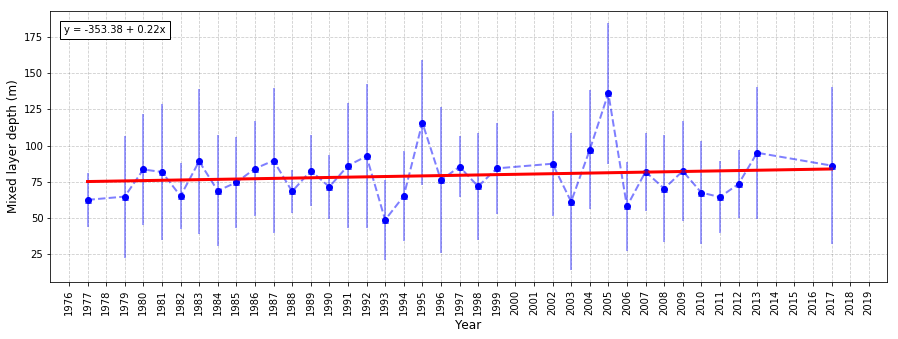

In [122]:
from matplotlib.offsetbox import AnchoredText

x = [1977,1979,1980,1981,1982,1983, 1984,1985,1986,1987,1988,1989,1990, 1991,1992,
    1993,1994,1995,1996,1997,1998,1999,2002,2003,2004,2005,2006,
    2007,2008,2009,2010,2011,2012,2013,2017]
y = [depth_1977,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1984,depth_1985,
    depth_1986,depth_1987,depth_1988,depth_1989, depth_1990, depth_1991,depth_1992,depth_1993,depth_1994,
    depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2002,depth_2003,depth_2004,depth_2005,depth_2006,depth_2007,depth_2008,
    depth_2009,depth_2010,depth_2011,depth_2012,depth_2013,depth_2017]
e = [stddepth_1977,stddepth_1979,stddepth_1980,stddepth_1981,stddepth_1982,stddepth_1983,stddepth_1984,stddepth_1985,
    stddepth_1986,stddepth_1987,stddepth_1988,stddepth_1989, stddepth_1990, stddepth_1991,stddepth_1992,stddepth_1993,stddepth_1994,
    stddepth_1995,stddepth_1996,stddepth_1997,stddepth_1998,stddepth_1999,
    stddepth_2002,stddepth_2003,stddepth_2004,stddepth_2005,stddepth_2006,stddepth_2007,stddepth_2008,
    stddepth_2009,stddepth_2010,stddepth_2011,stddepth_2012,stddepth_2013,stddepth_2017]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((50,140))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([50,60,70,80,90,100,110,120,130,140])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -353.38 + 0.22x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_winterMLDLD_WesternGoM')
plt.show()

### DATA AVAILABILITY

In [125]:
filelen = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 334 and yd <= 365:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [181]:
years = [1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [182]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

In [140]:
# print(df['Bottle'].sum())
# print(df['MK-3'].sum())
# print(df['SBE-17'].sum())
# print(df['SBE-19'].sum())
# print(df['SBE-19+V2'].sum())
# print(df['SBE-911+'].sum())
# print(df['SBE-19+'].sum())
# print(df['MK-5'].sum())

In [185]:
Bottlemonth = [56, 102, 77, 11, 143, 145, 45, 98, 61, 90, 99, 145]
MK3month = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
SBE17month = [22, 0, 0, 0, 7, 0, 0, 0, 30, 0, 42, 44]
SBE19month = [243, 122, 127, 752, 180, 204, 189, 461, 346, 848, 420, 63]
SBE19V2month = [0, 11, 11, 35, 151, 126, 3, 21, 15, 53, 75, 0]
SBE911plusmonth = [1, 21, 7, 69, 127, 125, 18, 24, 43, 173, 131, 0]
SBE19plusmonth = [0, 172, 49, 265, 496, 161, 6, 174, 180, 366, 341, 50]
MK5month = [8, 11, 16, 13, 16, 23, 4, 0, 0, 0, 7, 0]

In [186]:
dfmonth = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11,12], 
                  data={'Bottle': Bottlemonth,'MK-3': MK3month, 
                        'SBE-17': SBE17month,'SBE-19': SBE19month,
                        'SBE-19+V2': SBE19V2month,'SBE-911+': SBE911plusmonth,
                        'SBE-19+': SBE19plusmonth,'MK-5': MK5month})

In [141]:
# print(dfmonth)

In [142]:
# print(df)

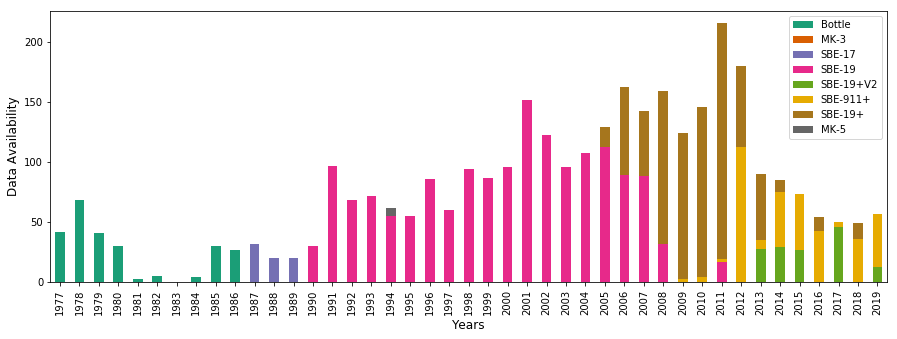

In [64]:
ax = df.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('datacollection_count_fallWGoM')
plt.show()

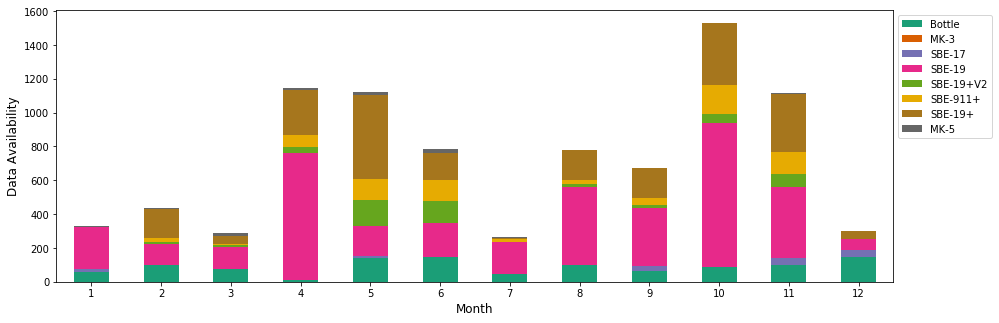

In [196]:
ax = dfmonth.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xticks(rotation = 360)
plt.xlabel('Month',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('ANNUALtrend_datacollection_count')
plt.show()

### SPATIAL FIGURES

In [171]:
for year in range(2017,2018):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [],latnew = [], lonnew = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
#         if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
#             print(df_final)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
#             d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin)), 'lat': list(reversed(df_final['lat'])), 'lon':list(reversed(df_final['lon']))}
#             print(d)
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                    elif dffin.at[i,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                    break  
#     monthly = []
#     if len(seasonyeartemp) > 0:
# #         print('stddepth_',year,np.std(seasonyeardepth))
#         print('depth_',year,np.mean(seasonyeardepth))
#         print('depth_',year,seasonyeardepth)
# #         print(np.mean(seasonyeardepth))

ValueError: not enough values to unpack (expected 2, got 0)

In [17]:
for year in range(1977,2005):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [];counterii = []; floors = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
        print(floordepth)

20
24
46
24
33
22
32
16
17
42
1972
1240
49
32
27
18
14
20
25
62
55
32
16
36
95
2000
1300
110
162
49
37
33
29
40
20
43
53
125
222
80
330
80
38
20
26
21
36
29
27
27
51
44
31
40
41
34
39
65
67
102
1430
205
75
170
83
65
72
34
51
62
98
322
1298
108
59
45
30
70
87
60
57
76
209
52
60
50
185
140
80
170
88
195
215
190
210
168
85
75
76
173
81
120
89
44
60
30
94
45
170
160
206
185
185
145
205
210
135
110
82
180
85
225
185
235
33
35
35
61
80
800
129
70
60
66
160
132
195
110
135
155
201
48
58
55
85
118
325
118
74
64
34
43
54
68
85
405
153
90
77
67
55
32
38
33
34
58
80
117
105
135
80
73
67
43
43
34
53
148
85
81
68
54
53
79
130
620
131
73
43
44
43
58
34
170
163
174
147
175
215
118
233
64
69
80
53
145
163
104
138
155
163
205
245
173
190
128
185
168
173
228
280
175
195
188
194
225
175
204
220
198
39
31
60
53
78
90
105
1100
153
93
134
83
151
137
78
70
88
112
133
224
33
32
27
260
306
40
33
53
20
23
23
17
17
27
100
17
28
92
98
59
38
29
23
23
30
43
65
121
185
133
73
53
45
28
33
23
23
18
43
37
60
73
55
133


81
170
84
130
104
55
62
82
39
33
177
168
187
199
207
79
22
92
135
1240
79
60
31
38
34
220
205
188
208
200
230
225
140
87
125
120
158
205
155
145
88
164
160
140
228
49
24
27
23
32
400
32
24
16
15
46
1400
80
37
32
17
15
27
73
59
90
25
27
22
22
21
15
26
47
53
114
1100
154
125
57
41
23
44
25
28
42
53
210
83
78
38
37
23
22
22
28
23
32
28
38
69
68
117
285
1200
155
180
66
67
51
28
28
34
42
36
75
94
1300
358
127
93
67
50
39
29
39
39
61
89
68
93
77
123
70
66
39
61
72
267
170
170
190
41
32
68
52
104
302
137
93
1400
175
83
82
73
84
153
164
212
191
113
93
44
93
128
1320
91
61
32
28
224
213
225
187
193
228
202
230
81
106
78
104
118
162
155
203
204
186
205
158
192
85
203
93
134
180
87
79
82
64
57
26
27
26
39
273
35
25
19
22
45
1170
51
37
27
18
12
13
27
62
57
91
39
34
23
23
25
23
22
27
32
42
42
102
1260
135
122
55
42
26
36
19
25
41
47
183
77
76
34
35
28
17
22
30
24
27
33
42
69
69
108
214
223
157
93
74
68
68
52
29
30
43
42
38
29
46
38
56
64
83
128
309
108
94
74
45
59
48
40
67
79
238
194
212
166
110
15

81
95
142
230
69
63
24
179
76
89
170
89
126
148
84
181
240
249
111
63
139
80
71
121
139
170
210
234
203
182
256
204
219
73
128
85
118
136
164
197
199
190
168
170
194
225
162
165
89
201
108
150
193
111
79
79
232
82
62
52
25
29
19
39
472
34
23
18
18
11
19
26
37
49
45
1225
63
60
100
40
33
28
12
19
15
23
21
19
25
32
44
49
107
1200
145
124
54
40
21
39
16
25
38
49
177
80
77
34
35
21
12
20
28
22
29
27
37
63
69
109
239
414
72
142
95
71
64
51
26
25
42
39
47
28
40
34
49
63
87
129
295
103
54
40
42
66
94
168
74
76
35
70
75
155
59
84
61
74
122
50
30
33
174
32
43
37
61
103
725
82
92
117
158
64
59
26
150
75
74
134
84
125
146
81
180
242
250
104
61
131
69
124
83
24
201
131
143
212
205
142
173
210
236
203
182
254
223
73
138
82
119
142
210
201
166
199
203
201
188
165
118
170
215
194
229
161
168
164
94
201
108
150
200
95
83
82
228
83
64
51
25
30
19
36
384
36
25
17
18
44
1200
51
41
24
18
12
12
24
66
60
98
39
32
14
17
21
20
18
27
32
43
47
109
1186
147
123
53
42
22
42
18
25
42
46
203
76
78
32
34
25
14
19
27


36
50
52
62
60
48
52
37
40
40
28
26
24
22
35
47
60
80
85
119
161
92
81
69
65
32
32
36
37
39
45
55
56
83
127
86
66
71
53
59
49
34
25
25
31
57
52
53
47
12
31
43
19
28
47
88
55
100
116
88
70
218
197
211
159
144
152
131
71
65
65
54
47
46
44
38
37
42
39
36
39
35
40
39
52
50
47
47
43
56
58
48
55
63
67
66
64
79
75
86
93
91
89
102
52
53
50
68
68
50
62
74
76
71
88
99
72
103
89
104
134
80
67
87
69
65
110
108
35
147
1830
50
130
843
53
100
1695
62
70
2013
61
63
2196
49
55
2291
53
57
2400
37
73
2745
39
98
1830
40
131
1795
28
146
182
25
156
1690
25
142
1942
23
132
2400
37
96
2545
48
47
2700
60
24
2727
80
85
3200
86
150
3370
121
496
159
1830
93
915
82
112
269
69
82
1000
66
68
1100
46
54
200
31
53
2020
36
62
2920
35
92
2920
36
165
3200
43
179
3400
42
178
3120
55
168
3090
56
93
3000
83
65
2680
129
51
2220
87
44
810
66
44
92
72
70
500
53
152
1309
60
173
2500
52
184
2641
35
146
2608
26
64
250
25
54
1647
31
48
350
58
47
2013
55
42
103
53
53
47
107
15
174
32
45
20
30
53
88
56
100
116
90
71
218
199
211
160


54
54
167
87
63
31
21
43
43
50
34
28
19
26
30
26
136
126
203
194
217
210
219
240
283
172
149
209
195
183
192
173
205
251
244
198
230
218
192
237
168
63
60
183
107
103
71
171
174
172
141
161
160
100
102
177
173
168
55
100
67
71
102
196
161
56
86
91
110
110
135
63
108
83
14
64
88
50
53
53
31
28
22
38
55
38
27
25
24
22
35
46
60
85
117
90
81
68
79
59
63
45
28
34
33
40
38
45
59
56
82
84
66
69
52
59
50
34
26
25
31
56
54
52
47
13
32
43
20
29
52
87
55
97
118
85
70
218
197
210
160
143
171
151
131
73
64
66
92
53
136
177
71
182
32
41
40
36
35
62
37
41
41
52
44
47
55
88
189
178
56
47
64
58
63
67
74
76
64
61
79
68
158
81
86
84
185
93
90
88
86
72
51
40
40
47
61
68
65
67
47
33
47
47
44
53
69
64
52
30
23
38
27
39
50
56
26
25
22
35
48
61
86
118
159
80
92
70
81
61
64
46
31
32
36
37
41
45
54
56
83
128
85
69
26
51
51
72
73
118
58
35
26
33
56
54
53
46
12
33
45
24
29
49
87
55
90
72
171
195
188
140
152
65
67
137
74
54
50
45
44
38
41
42
33
37
64
38
36
38
43
52
53
43
46
43
45
79
53
48
67
44
58
63
73
76
88
75
6

38
71
33
75
39
88
38
85
35
87
45
73
72
214
45
35
221
28
251
38
167
38
105
173
29
199
30
192
33
89
93
38
33
24
39
38
51
98
34
56
60
69
65
60
44
53
54
68
83
96
92
72
62
57
57
43
62
61
62
83
86
60
67
73
64
71
78
66
68
83
98
22
21
80
39
84
47
46
34
46
25
72
33
82
37
124
50
128
29
100
19
93
24
96
25
92
38
88
41
90
41
95
34
90
28
84
24
79
25
78
29
101
81
12
80
24
73
20
80
20
74
15
70
15
62
21
72
24
72
16
65
26
65
17
67
23
65
23
63
28
59
38
65
37
69
34
61
22
105
44
50
36
52
37
55
26
51
38
52
29
38
31
56
59
50
43
53
20
86
20
111
20
77
24
107
23
95
21
94
29
96
94
21
180
18
194
43
97
46
95
31
95
24
93
19
95
25
95
22
95
31
95
33
94
25
92
34
95
31
96
35
96
40
93
31
94
33
94
52
97
67
95
50
94
47
100
56
95
95
57
97
55
98
53
101
43
100
68
93
64
78
42
79
44
81
37
70
73
65
108
59
59
67
74
58
35
50
65
34
48
61
51
45
73
38
92
33
183
25
44
1200
54
64
45
55
64
52
60
58
82
144
80
84
71
42
38
55
40
57
36
31
24
38
63
46
50
58
64
76
66
39
60
72
62
62
76
66
22
13
23
22
23
28
30
26
34
36
48
59
56
52
47
31
23
42


50
1000
147
36
80
30
57
27
90
18
137
22
1250
175
37
2006
60
39
1371
118
33
1000
65
30
753
96
35
548
48
35
1000
80
34
2012
90
42
170
189
39
150
40
97
156
190
170
185
150
125
175
73
147
56
79
155
68
41
83
110
93
130
222
193
212
100
95
80
35
110
125
122
95
70
61
71
93
80
163
107
132
99
1052
800
2560
1000
188
496
300
102
1471
2000
2195
1850
2195
144
1642
1952
134
2176
2430
237
2000
125
2000
2430
688
2203
2012
213
2000
1411
95
97
12
26
102
65
48
60
67
39
94
83
121
130
125
148
135
95
132
147
94
106
90
52
129
137
100
81
101
177
99
175
250
64
51
63
33
64
34
64
26
150
19
66
26
135
40
112
36
113
38
88
31
109
41
60
34
64
44
72
36
217
33
250
33
180
36
180
28
197
30
229
39
34
44
34
49
34
72
78
780
1200
2000
1748
2000
2400
173
89
82
81
182
232
245
107
61
149
81
80
73
38
172
195
195
195
157
132
84
85
89
161
156
225
196
206
168
168
158
77
71
75
82
173
171
1400
1600
1319
2000
2000
296
296
130
94
63
50
39
33
60
73
83
83
213
1150
240
240
108
70
66
41
27
27
24
26
32
48
116
116
1500
1200
106
108
51
43
32
2

87
87
68
50
52
1910
249
278
2311
76
76
3670
36
34
3383
53
54
4940
700
790
1829
91
91
5166
82
81
1624
71
71
4750
83
81
3841
218
218
3572
76
67
4938
286
286
4938
55
58
5488
182
181
5121
194
211
5121
52
48
5486
148
148
2750
1115
154
154
79
118
326
364
222
207
186
78
171
56
167
163
108
121
140
46
129
50
154
154
256
100
110
276
105
67
57
70
77
160
169
57
48
50
75
130
63
133
64
111
94
60
360
150
74
90
45
175
145
85
69
92
59
111
50
35
27
28
30
32
42
53
31
28
26
25
51
42
30
30
45
39
37
25
26
30
46
47
35
46
29
46
40
30
33
50
47
43
43
57
70
66
113
81
70
53
55
55
55
42
48
78
70
60
80
84
93
115
342
125
114
247
139
104
80
67
62
61
55
37
43
44
50
47
45
82
80
66
91
79
90
159
134
70
70
57
69
78
100
141
176
91
70
70
77
96
192
115
175
97
79
77
133
94
54
54
50
57
119
73
40
428
156
97
69
154
82
142
37
29
25
33
62
244
52
29
64
187
119
359
135
40
98
65
236
164
57
47
25
27
23
15
24
28
30
27
15
16
29
34
25
20
21
20
12
23
20
16
12
15
16
28
15
17
11
15
21
30
17
15
12
15
22
19
19
21
20
38
22
11
14
15
18
25
20
32

83
45
69
55
66
66
304
70
191
74
51
78
43
98
63
875
220
142
71
90
51
85
68
83
152
71
63
71
73
81
91
91
116
96
86
95
98
93
217
248
221
236
84
81
68
67
66
196
298
61
63
63
56
187
50
36
47
35
59
105
228
111
72
47
55
68
68
130
146
82
85
65
76
96
66
89
77
56
97
61
88
80
89
465
56
90
54
73
58
52
63
49
70
37
79
55
112
70
338
76
112
800
90
98
83
82
76
58
65
76
55
100
43
85
50
211
39
222
42
91
46
66
55
67
65
290
70
61
74
52
77
56
105
61
800
217
150
62
94
52
85
67
85
136
68
64
74
74
81
88
89
91
114
116
100
98
95
86
98
215
226
221
98
86
79
66
68
67
207
298
60
64
51
37
54
37
61
212
77
70
43
54
70
69
99
140
81
81
66
75
96
66
92
77
45
97
63
85
78
91
285
52
92
53
77
58
54
62
49
69
36
76
56
109
69
265
75
111
1200
90
96
84
82
78
65
64
75
55
88
42
120
48
84
36
95
42
220
47
223
56
88
65
71
68
66
73
287
77
53
104
190
750
52
136
49
96
61
88
190
84
68
70
54
60
72
68
146
75
173
81
210
90
93
116
97
85
92
98
232
222
234
222
98
84
80
68
69
67
210
290
60
54
51
182
53
36
47
31
56
106
211
96
71
45
48
71
69
129
156


49
1714
47
89
52
72
56
54
67
40
72
40
113
57
249
67
106
75
89
658
77
97
72
80
67
57
56
76
43
89
45
102
41
86
32
95
41
91
56
66
62
52
65
48
69
78
73
95
96
1030
650
70
118
84
93
220
82
227
77
69
65
276
60
60
64
187
75
63
78
215
91
72
90
52
103
68
97
154
84
88
91
91
96
87
74
66
46
47
213
230
220
97
65
71
299
56
60
51
184
171
61
104
210
100
71
40
51
65
65
131
155
77
84
72
65
66
99
76
93
97
54
89
64
91
79
52
282
53
91
59
79
63
56
73
50
78
42
118
56
260
70
111
75
89
1300
84
101
77
78
66
61
56
71
40
89
50
112
40
85
44
96
48
222
57
213
66
87
70
70
74
66
78
297
99
65
800
185
145
55
95
47
87
58
84
217
71
68
62
52
73
70
74
146
82
90
91
112
97
85
94
102
115
217
233
221
100
85
82
67
67
66
191
298
60
55
55
190
187
172
51
35
47
37
58
105
213
93
72
45
50
72
70
134
155
102
123
133
67
43
65
120
70
64
59
77
115
137
240
330
128
500
163
77
56
57
125
119
69
48
53
111
165
68
65
84
60
52
120
177
121
84
81
107
600
102
63
72
115
213
88
131
115
44
53
33
32
33
26
15
23
23
29
26
38
29
22
30
18
49
30
34
25
52
47
34

42
218
332
86
77
37
772
33
52
163
52
220
31
38
26
35
31
69
14
252
26
149
26
30
21
32
36
270
42
250
85
33
26
37
26
213
128
229
85
37
153
38
40
209
15
201
15
60
22
34
14
33
33
88
56
56
47
34
55
40
38
76
25
124
24
36
31
37
23
70
30
189
29
177
37
270
38
47
152
64
49
49
64
89
86
139
173
87
89
38
33
43
43
59
69
40
57
58
28
28
36
29
27
66
46
69
246
253
99
83
47
53
44
48
44
50
54
94
152
250
261
80
60
34
46
99
177
62
51
60
65
96
93
142
74
63
68
328
322
89
92
97
252
258
266
275
107
98
190
211
103
172
88
173
98
182
200
192
224
222
210
170
126
122
192
190
250
255
140
172
120
26
83
157
170
122
141
39
54
66
91
66
109
102
187
168
179
137
89
244
244
232
233
211
139
150
142
79
89
109
96
124
95
119
1852
102
162
87
74
85
219
222
190
238
240
340
338
68
60
55
46
43
35
31
31
36
35
194
156
131
249
245
184
166
50
32
27
21
24
26
28
35
33
54
99
327
109
58
34
41
79
120
89
50
37
38
105
144
64
33
34
92
86
89
255
147
39
24
33
31
43
94
104
286
157
74
69
58
57
56
30
27
28
25
43
62
38
33
45
47
121
127
368
81
114
130
1

70
59
198
62
50
56
61
69
82
86
128
123
79
97
227
229
102
167
360
360
58
58
41
188
67
38
239
244
214
263
263
247
247
30
30
67
160
220
31
50
131
214
184
68
68
136
176
62
65
166
174
189
68
38
31
201
160
183
190
34
39
177
197
237
50
50
54
190
285
295
67
70
285
272
85
80
230
250
94
225
246
163
70
228
75
18
158
220
30
95
250
227
80
83
271
284
71
71
235
294
285
43
50
142
236
194
179
39
34
186
183
31
36
175
198
189
187
201
65
61
169
139
86
65
71
184
212
50
140
30
82
251
83
248
85
213
80
117
180
76
182
95
249
227
80
84
271
287
71
68
295
283
182
52
45
197
34
32
186
174
229
29
33
222
189
184
169
210
65
63
170
172
136
66
68
184
212
47
30
219
21
85
45
44
51
47
65
78
67
73
79
65
82
72
84
66
41
210
249
248
251
179
199
175
175
358
240
245
120
241
339
80
147
136
441
121
315
132
155
112
60
57
34
24
27
24
23
20
29
25
29
33
30
34
43
360
305
145
82
97
450
94
72
85
360
96
94
26
29
76
132
51
46
121
285
107
68
124
101
36
64
60
57
44
52
36
46
30
32
46
46
46
61
30
28
53
34
26
22
37
42
75
84
78
70
85
212
124
77


5.13
5.332
5.04
5.332
4.98
5.332
4.97
5.332
4.96
5.332
4.97
5.332
4.98
5.332
4.98
5.332
4.99
5.332
4.99
5.332
4.99
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
5.0
5.332
4.99
5.332
4.99
5.332
4.99
5.332
4.99
5.332
4.99
5.332
4.96
5.332
4.95
5.332
4.94
5.332
4.93
5.332
4.92
5.332
4.89
5.332
4.88
5.332
4.87
5.332
4.86
5.332
4.85
5.332
4.84
5.332
4.84
5.332
4.84
5.332
4.83
5.332
4.82
5.332
4.82
5.332
4.81
5.332
4.81
5.332
4.81
5.332
4.81
5.332
4.81
5.332
4.8
5.332
4.8
5.332
4.8
5.332
4.8
5.332
4.79
5.332
4.79
5.332
4.79
5.332
4.79
5.332
4.79
5.332
4.79
5.332
4.79
5.332
4.79
5.332
4.76
5.332
4.75
5.332
4.76
5.332
4.78
5.332
4.85
5.332
4.89
5.332
4.91
5.332
4.94
5.332
4.95
5.332
4.97
5.332
4.99
5.332
5.0
5.332
5.0
5.332
5.01
5.332
5.01
5.332
5.02
5.332
5.06
5.332
5.07
5.332
5.08
5.332
5.08
5.332
5.08
5.332
5.1
5.332
5.11
5.332
5.12
5.332
5.6
5.332
5.74
5.332
5.77
5.332
5.8
5.332
5.83
5.332
5.89
5.332
5.96
5.332

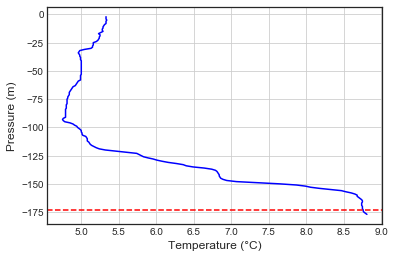

5.18
5.382
5.15
5.382
5.12
5.382
5.1
5.382
5.07
5.382
5.04
5.382
4.99
5.382
4.98
5.382
5.03
5.382
5.04
5.382
5.03
5.382
5.01
5.382
5.01
5.382
5.0
5.382
5.0
5.382
5.0
5.382
5.0
5.382
5.0
5.382
4.99
5.382
4.97
5.382
4.94
5.382
4.93
5.382
4.91
5.382
4.89
5.382
4.87
5.382
4.87
5.382
4.85
5.382
4.83
5.382
4.81
5.382
4.8
5.382
4.8
5.382
4.77
5.382
4.75
5.382
4.74
5.382
4.73
5.382
4.73
5.382
4.78
5.382
4.81
5.382
4.78
5.382
4.79
5.382
4.79
5.382
4.79
5.382
4.79
5.382
4.82
5.382
4.84
5.382
4.84
5.382
4.86
5.382
4.87
5.382
4.88
5.382
4.91
5.382
4.92
5.382
4.91
5.382
4.9
5.382
4.9
5.382
4.9
5.382
4.92
5.382
4.93
5.382
4.95
5.382
4.96
5.382
4.98
5.382
4.99
5.382
5.03
5.382
5.06
5.382
5.07
5.382
5.07
5.382
5.08
5.382
5.1
5.382
5.12
5.382
5.12
5.382
5.12
5.382
5.12
5.382
5.13
5.382
5.13
5.382
5.13
5.382
5.14
5.382
5.15
5.382
5.16
5.382
5.59
5.382
5.6
5.382
5.62
5.382
5.66
5.382
5.71
5.382
5.75
5.382
5.79
5.382
5.8
5.382
5.8
5.382
5.8
5.382
5.8
5.382
5.81
5.382
5.82
5.382
5.81
5.382
5.87
5.382
5.9
5

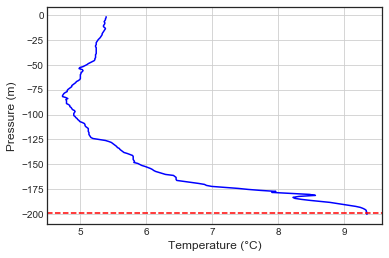

5.32
5.54
5.29
5.54
5.29
5.54
5.29
5.54
5.28
5.54
5.28
5.54
5.28
5.54
5.27
5.54
5.28
5.54
5.26
5.54
5.24
5.54
5.22
5.54
5.19
5.54
5.17
5.54
5.16
5.54
5.13
5.54
5.07
5.54
5.0
5.54
4.91
5.54
4.83
5.54
4.8
5.54
4.77
5.54
4.74
5.54
4.73
5.54
4.7
5.54
4.68
5.54
4.67
5.54
4.68
5.54
4.68
5.54
4.68
5.54
4.68
5.54
4.68
5.54
4.68
5.54
4.68
5.54
4.7
5.54
4.72
5.54
4.72
5.54
4.74
5.54
4.75
5.54
4.74
5.54
4.72
5.54
4.69
5.54
4.69
5.54
4.7
5.54
4.71
5.54
4.71
5.54
4.71
5.54
4.71
5.54
4.73
5.54
4.74
5.54
4.75
5.54
4.75
5.54
4.74
5.54
4.74
5.54
4.73
5.54
4.73
5.54
4.74
5.54
4.75
5.54
4.77
5.54
4.79
5.54
4.8
5.54
4.8
5.54
4.82
5.54
4.83
5.54
4.84
5.54
4.85
5.54
4.87
5.54
4.9
5.54
4.91
5.54
4.91
5.54
4.91
5.54
4.92
5.54
4.92
5.54
4.93
5.54
4.94
5.54
4.95
5.54
4.96
5.54
4.97
5.54
4.98
5.54
4.99
5.54
5.0
5.54
5.0
5.54
5.0
5.54
5.0
5.54
4.99
5.54
4.99
5.54
5.0
5.54
5.0
5.54
5.01
5.54
5.02
5.54
5.04
5.54
5.05
5.54
5.07
5.54
5.11
5.54
5.12
5.54
5.16
5.54
5.19
5.54
5.22
5.54
5.27
5.54
5.32
5.54
5.34
5.54
5.75

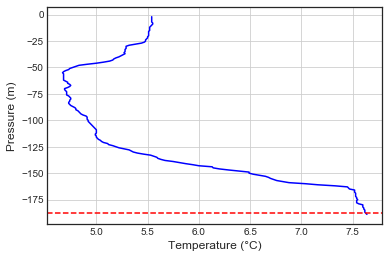

4.77
4.97
4.76
4.97
4.74
4.97
4.74
4.97
4.73
4.97
4.72
4.97
4.72
4.97
4.71
4.97
4.7
4.97
4.7
4.97
4.71
4.97
4.72
4.97
4.73
4.97
4.74
4.97
4.74
4.97
4.74
4.97
4.74
4.97
4.74
4.97
4.74
4.97
4.74
4.97
4.74
4.97
4.75
4.97
4.75
4.97
4.75
4.97
4.75
4.97
4.75
4.97
4.76
4.97
4.75
4.97
4.75
4.97
4.75
4.97
4.75
4.97
4.75
4.97
4.76
4.97
4.76
4.97
4.76
4.97
4.76
4.97
4.77
4.97
5.17
4.97
5.24
4.97
5.29
4.97
5.47
4.97
5.54
4.97
5.59
4.97
5.67
4.97
5.77
4.97
5.82
4.97
5.85
4.97
5.87
4.97
5.94
4.97
5.99
4.97
6.05
4.97
6.08
4.97
6.17
4.97
6.2
4.97
6.26
4.97
6.34
4.97
6.43
4.97
6.63
4.97
6.64
4.97
6.64
4.97
6.63
4.97
6.63
4.97
6.82
4.97
7.01
4.97
7.12
4.97
7.19
4.97
7.31
4.97
7.4
4.97
7.43
4.97
7.51
4.97
7.72
4.97
7.86
4.97
7.92
4.97
7.96
4.97
7.99
4.97
7.99
4.97
7.99
4.97
7.99
4.97
7.98
4.97
7.98
4.97
7.97
4.97
7.98
4.97
7.98
4.97
7.98
4.97
7.98
4.97
7.97
4.97
7.97
4.97
4.88
5.1080000000000005
4.83
5.1080000000000005
4.82
5.1080000000000005
4.81
5.1080000000000005
4.8
5.1080000000000005
4.8
5.108000000

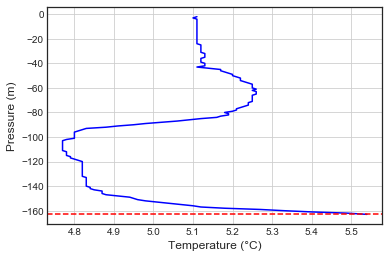

4.39
5.066
4.37
5.066
4.35
5.066
4.35
5.066
4.34
5.066
4.33
5.066
4.32
5.066
4.3
5.066
4.3
5.066
4.29
5.066
4.29
5.066
4.29
5.066
4.29
5.066
4.28
5.066
4.27
5.066
4.27
5.066
4.25
5.066
4.24
5.066
4.23
5.066
4.23
5.066
4.22
5.066
4.21
5.066
4.2
5.066
4.2
5.066
4.2
5.066
4.2
5.066
4.2
5.066
4.2
5.066
4.19
5.066
4.19
5.066
4.2
5.066
4.19
5.066
4.19
5.066
4.19
5.066
4.19
5.066
4.19
5.066
4.2
5.066
4.2
5.066
4.22
5.066
4.22
5.066
4.23
5.066
4.24
5.066
4.24
5.066
4.24
5.066
4.25
5.066
4.25
5.066
4.25
5.066
4.25
5.066
4.25
5.066
4.26
5.066
4.26
5.066
4.26
5.066
4.26
5.066
4.26
5.066
4.26
5.066
4.27
5.066
4.27
5.066
4.28
5.066
4.28
5.066
4.29
5.066
4.29
5.066
4.29
5.066
4.3
5.066
4.3
5.066
4.31
5.066
4.32
5.066
4.32
5.066
4.32
5.066
4.32
5.066
4.33
5.066
4.34
5.066
4.34
5.066
4.34
5.066
4.34
5.066
4.34
5.066
4.35
5.066
4.36
5.066
4.36
5.066
4.36
5.066
4.36
5.066
4.36
5.066
4.36
5.066
4.36
5.066
4.36
5.066
4.36
5.066
4.36
5.066
4.36
5.066
4.37
5.066
4.38
5.066
4.38
5.066
4.38
5.066
4.38
5.066
4

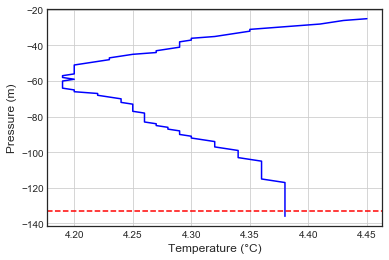

4.74
4.954
4.73
4.954
4.72
4.954
4.7
4.954
4.69
4.954
4.68
4.954
4.66
4.954
4.64
4.954
4.63
4.954
4.61
4.954
4.58
4.954
4.54
4.954
4.49
4.954
4.49
4.954
4.49
4.954
4.48
4.954
4.46
4.954
4.46
4.954
4.43
4.954
4.42
4.954
4.4
4.954
4.39
4.954
4.38
4.954
4.38
4.954
4.39
4.954
4.4
4.954
4.4
4.954
4.38
4.954
4.37
4.954
4.36
4.954
4.34
4.954
4.32
4.954
4.29
4.954
4.27
4.954
4.26
4.954
4.26
4.954
4.26
4.954
4.26
4.954
4.26
4.954
4.26
4.954
4.27
4.954
4.27
4.954
4.25
4.954
4.23
4.954
4.23
4.954
4.23
4.954
4.23
4.954
4.23
4.954
4.23
4.954
4.23
4.954
4.22
4.954
4.22
4.954
4.22
4.954
4.21
4.954
4.21
4.954
4.21
4.954
4.2
4.954
4.19
4.954
4.2
4.954
4.2
4.954
4.21
4.954
4.21
4.954
4.21
4.954
4.21
4.954
4.21
4.954
4.2
4.954
4.19
4.954
4.2
4.954
4.2
4.954
4.19
4.954
4.19
4.954
4.19
4.954
4.19
4.954
4.19
4.954
4.19
4.954
4.19
4.954
4.19
4.954
4.19
4.954
4.18
4.954
4.18
4.954
4.18
4.954
4.18
4.954
4.17
4.954
4.17
4.954
4.17
4.954
4.17
4.954
4.17
4.954
4.17
4.954
4.17
4.954
4.17
4.954
4.17
4.954
4.17
4.95

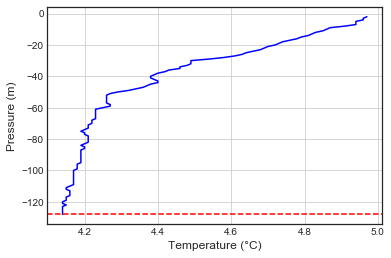

4.92
5.124
4.91
5.124
4.9
5.124
4.87
5.124
4.84
5.124
4.84
5.124
4.84
5.124
4.8
5.124
4.76
5.124
4.71
5.124
4.65
5.124
4.61
5.124
4.61
5.124
4.61
5.124
4.6
5.124
4.57
5.124
4.56
5.124
4.55
5.124
4.55
5.124
4.53
5.124
4.53
5.124
4.53
5.124
4.53
5.124
4.54
5.124
4.56
5.124
4.58
5.124
4.59
5.124
4.6
5.124
4.6
5.124
4.6
5.124
4.6
5.124
4.6
5.124
4.6
5.124
4.61
5.124
4.6
5.124
4.61
5.124
4.61
5.124
4.61
5.124
4.61
5.124
4.61
5.124
4.61
5.124
4.61
5.124
4.61
5.124
4.62
5.124
4.62
5.124
4.62
5.124
4.62
5.124
4.62
5.124
4.62
5.124
4.62
5.124
4.62
5.124
4.62
5.124
4.62
5.124
4.63
5.124
4.62
5.124
4.62
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.63
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.124
4.64
5.12

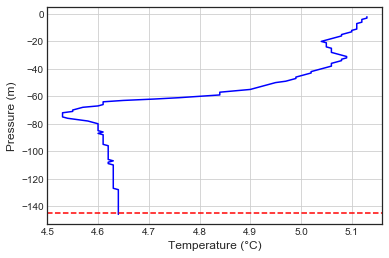

4.93
5.1339999999999995
4.92
5.1339999999999995
4.9
5.1339999999999995
4.88
5.1339999999999995
4.86
5.1339999999999995
4.85
5.1339999999999995
4.83
5.1339999999999995
4.79
5.1339999999999995
4.77
5.1339999999999995
4.75
5.1339999999999995
4.74
5.1339999999999995
4.73
5.1339999999999995
4.72
5.1339999999999995
4.71
5.1339999999999995
4.71
5.1339999999999995
4.7
5.1339999999999995
4.68
5.1339999999999995
4.67
5.1339999999999995
4.67
5.1339999999999995
4.65
5.1339999999999995
4.64
5.1339999999999995
4.63
5.1339999999999995
4.63
5.1339999999999995
4.62
5.1339999999999995
4.62
5.1339999999999995
4.6
5.1339999999999995
4.6
5.1339999999999995
4.59
5.1339999999999995
4.56
5.1339999999999995
4.55
5.1339999999999995
4.56
5.1339999999999995
4.55
5.1339999999999995
4.55
5.1339999999999995
4.54
5.1339999999999995
4.54
5.1339999999999995
4.52
5.1339999999999995
4.51
5.1339999999999995
4.49
5.1339999999999995
4.49
5.1339999999999995
4.49
5.1339999999999995
4.47
5.1339999999999995
4.46
5.1339999999999

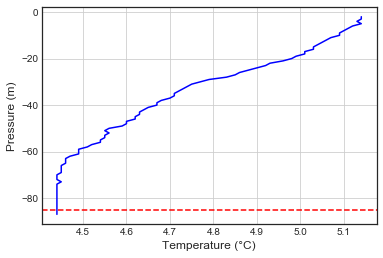

4.89
5.12
4.87
5.12
4.86
5.12
4.86
5.12
4.86
5.12
4.86
5.12
4.86
5.12
4.86
5.12
4.85
5.12
4.85
5.12
4.84
5.12
4.84
5.12
4.82
5.12
4.8
5.12
4.77
5.12
4.75
5.12
4.74
5.12
4.73
5.12
4.73
5.12
4.73
5.12
4.72
5.12
4.72
5.12
4.71
5.12
4.71
5.12
4.69
5.12
4.68
5.12
4.66
5.12
4.56
5.12
4.5
5.12
4.49
5.12
4.48
5.12
4.48
5.12
4.47
5.12
4.47
5.12
4.47
5.12
4.47
5.12
4.45
5.12
4.45
5.12
4.44
5.12
4.44
5.12
4.44
5.12
4.45
5.12
4.45
5.12
4.45
5.12
4.45
5.12
4.48
5.12
4.49
5.12
4.49
5.12
4.49
5.12
4.49
5.12
4.49
5.12
4.51
5.12
4.52
5.12
4.52
5.12
4.52
5.12
4.52
5.12
4.52
5.12
4.52
5.12
4.52
5.12
4.52
5.12
4.53
5.12
4.54
5.12
4.55
5.12
4.56
5.12
4.56
5.12
4.56
5.12
4.57
5.12
4.57
5.12
4.57
5.12
4.57
5.12
4.57
5.12
4.57
5.12
4.58
5.12
4.59
5.12
4.59
5.12
4.59
5.12
4.59
5.12
4.59
5.12
4.59
5.12
4.59
5.12
4.59
5.12
4.6
5.12
4.6
5.12
4.62
5.12
4.64
5.12
4.65
5.12
4.66
5.12
4.68
5.12
4.69
5.12
4.69
5.12
4.7
5.12
4.71
5.12
4.72
5.12
4.73
5.12
4.73
5.12
4.74
5.12
4.75
5.12
4.77
5.12
4.8
5.12
4.82
5.12
4.86
5

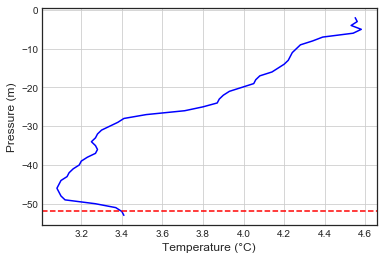

4.41
4.676666666666667
4.36
4.676666666666667
4.27
4.676666666666667
4.19
4.676666666666667
4.18
4.676666666666667
4.17
4.676666666666667
4.12
4.676666666666667
4.08
4.676666666666667
4.02
4.676666666666667
3.96
4.676666666666667
3.93
4.676666666666667
3.92
4.676666666666667
3.91
4.676666666666667
3.9
4.676666666666667
3.89
4.676666666666667
3.87
4.676666666666667
3.85
4.676666666666667
3.77
4.676666666666667
3.71
4.676666666666667
3.66
4.676666666666667
3.6
4.676666666666667
3.54
4.676666666666667
3.34
4.676666666666667
3.31
4.676666666666667
3.32
4.676666666666667
3.35
4.676666666666667
3.35
4.676666666666667
3.35
4.676666666666667
3.34
4.676666666666667
3.34
4.676666666666667
3.33
4.676666666666667
3.32
4.676666666666667
3.32
4.676666666666667
3.3
4.676666666666667
3.29
4.676666666666667
3.29
4.676666666666667
3.29
4.676666666666667
3.29
4.676666666666667
3.28
4.676666666666667
3.28
4.676666666666667
3.28
4.676666666666667
3.28
4.676666666666667
3.28
4.676666666666667
3.28
4.6766666

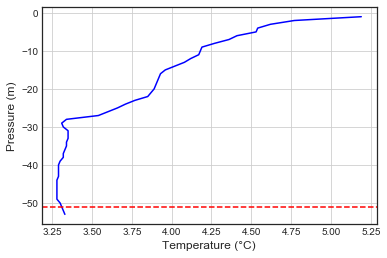

4.76
5.168
4.75
5.168
4.74
5.168
4.74
5.168
4.73
5.168
4.73
5.168
4.72
5.168
4.73
5.168
4.74
5.168
4.74
5.168
4.74
5.168
4.74
5.168
4.74
5.168
4.74
5.168
4.74
5.168
4.75
5.168
4.75
5.168
4.75
5.168
4.75
5.168
4.75
5.168
4.75
5.168
4.75
5.168
4.76
5.168
4.76
5.168
4.76
5.168
4.75
5.168
4.75
5.168
4.75
5.168
4.75
5.168
4.76
5.168
4.75
5.168
4.75
5.168
4.73
5.168
4.68
5.168
4.62
5.168
4.55
5.168
4.49
5.168
4.48
5.168
4.47
5.168
4.47
5.168
4.47
5.168
4.47
5.168
4.47
5.168
4.47
5.168
4.47
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.46
5.168
4.45
5.168
4.45
5.168
4.44
5.168
4.43
5.168
4.43
5.168
4.43
5.168
4.43
5.168
4.42
5.168
4.42
5.168
4.42
5.168
4.42
5.168
4.42
5.168
4.42
5.168
4.42
5.168
4.42
5.168
4.42
5.168
4.42
5.168
4.42
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168
4.41
5.168

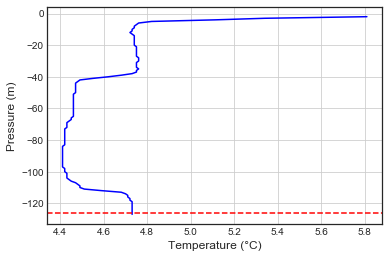

5.68
5.888
5.62
5.888
5.57
5.888
5.54
5.888
5.53
5.888
5.5
5.888
5.48
5.888
5.48
5.888
5.47
5.888
5.44
5.888
5.4
5.888
5.39
5.888
5.37
5.888
5.35
5.888
5.32
5.888
5.28
5.888
5.22
5.888
5.18
5.888
5.17
5.888
5.15
5.888
5.09
5.888
5.08
5.888
5.06
5.888
5.03
5.888
4.98
5.888
4.93
5.888
4.84
5.888
4.75
5.888
4.7
5.888
4.62
5.888
4.62
5.888
4.61
5.888
4.57
5.888
4.5
5.888
4.47
5.888
4.42
5.888
4.41
5.888
4.42
5.888
4.42
5.888
4.43
5.888
4.44
5.888
4.45
5.888
4.46
5.888
4.48
5.888
4.48
5.888
4.48
5.888
4.49
5.888
4.49
5.888
4.49
5.888
4.49
5.888
4.5
5.888
4.5
5.888
4.5
5.888
4.51
5.888
4.51
5.888
4.52
5.888
4.53
5.888
4.53
5.888
4.54
5.888
4.54
5.888
4.54
5.888
4.54
5.888
4.55
5.888
4.57
5.888
4.58
5.888
4.59
5.888
4.61
5.888
4.63
5.888
4.65
5.888
4.67
5.888
4.67
5.888
4.68
5.888
4.69
5.888
4.69
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.7
5.888
4.71
5.888
4.71
5.888
4.7
5.888
4.71
5.888
4.71
5.888

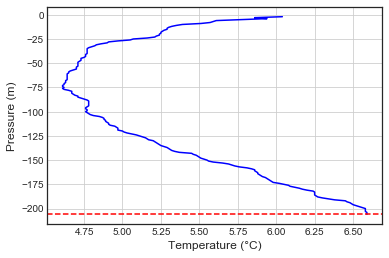

5.88
6.111666666666667
5.64
6.111666666666667
5.52
6.111666666666667
5.48
6.111666666666667
5.45
6.111666666666667
5.42
6.111666666666667
5.37
6.111666666666667
5.27
6.111666666666667
5.04
6.111666666666667
4.87
6.111666666666667
4.79
6.111666666666667
4.77
6.111666666666667
4.77
6.111666666666667
4.77
6.111666666666667
4.78
6.111666666666667
4.79
6.111666666666667
4.79
6.111666666666667
4.8
6.111666666666667
4.8
6.111666666666667
4.79
6.111666666666667
4.77
6.111666666666667
4.73
6.111666666666667
4.67
6.111666666666667
4.53
6.111666666666667
4.37
6.111666666666667
4.17
6.111666666666667
4.04
6.111666666666667
4.05
6.111666666666667
4.08
6.111666666666667
4.08
6.111666666666667
4.09
6.111666666666667
4.1
6.111666666666667
4.1
6.111666666666667
4.1
6.111666666666667
4.1
6.111666666666667
4.1
6.111666666666667
4.1
6.111666666666667
4.1
6.111666666666667
4.1
6.111666666666667
4.12
6.111666666666667
4.12
6.111666666666667
4.13
6.111666666666667
4.14
6.111666666666667
4.16
6.11166666666666

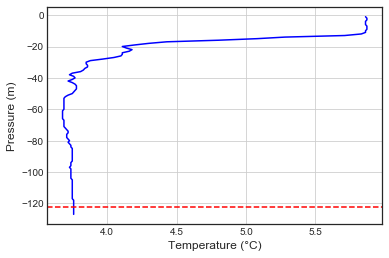

5.7
5.91
5.42
5.91
5.1
5.91
4.9
5.91
4.82
5.91
4.76
5.91
4.59
5.91
4.45
5.91
4.34
5.91
4.27
5.91
4.23
5.91
4.21
5.91
4.21
5.91
4.21
5.91
4.2
5.91
4.23
5.91
4.33
5.91
4.42
5.91
4.35
5.91
4.28
5.91
4.31
5.91
4.33
5.91
4.36
5.91
4.38
5.91
4.4
5.91
4.41
5.91
4.43
5.91
4.47
5.91
4.49
5.91
4.43
5.91
4.39
5.91
4.36
5.91
4.35
5.91
4.36
5.91
4.37
5.91
4.39
5.91
4.4
5.91
4.38
5.91
4.35
5.91
4.35
5.91
4.35
5.91
4.35
5.91
4.34
5.91
4.33
5.91
4.33
5.91
4.34
5.91
4.31
5.91
4.32
5.91
4.38
5.91
4.38
5.91
4.38
5.91
4.36
5.91
4.35
5.91
4.34
5.91
4.34
5.91
4.32
5.91
4.31
5.91
4.3
5.91
4.29
5.91
4.21
5.91
4.12
5.91
4.12
5.91
4.13
5.91
4.13
5.91
4.13
5.91
4.14
5.91
4.15
5.91
4.16
5.91
4.16
5.91
4.17
5.91
4.17
5.91
4.17
5.91
4.17
5.91
4.17
5.91
4.17
5.91
4.17
5.91
4.18
5.91
4.18
5.91
4.18
5.91
4.18
5.91
4.18
5.91
4.18
5.91
4.18
5.91
4.18
5.91
4.19
5.91
4.19
5.91
4.18
5.91
4.18
5.91
4.19
5.91
4.19
5.91
4.19
5.91
4.19
5.91
4.21
5.91
4.22
5.91
4.23
5.91
4.29
5.91
4.33
5.91
6.06
6.27
6.01
6.27
5.99
6.27
5.91
6.

6.15
6.391666666666667
6.1
6.391666666666667
6.06
6.391666666666667
6.01
6.391666666666667
5.96
6.391666666666667
5.75
6.391666666666667
5.67
6.391666666666667
5.65
6.391666666666667
5.64
6.391666666666667
5.64
6.391666666666667
5.57
6.391666666666667
5.53
6.391666666666667
5.51
6.391666666666667
5.5
6.391666666666667
5.48
6.391666666666667
5.46
6.391666666666667
5.42
6.391666666666667
5.39
6.391666666666667
5.39
6.391666666666667
5.39
6.391666666666667
5.38
6.391666666666667
5.38
6.391666666666667
5.37
6.391666666666667
5.36
6.391666666666667
5.35
6.391666666666667
5.34
6.391666666666667
5.32
6.391666666666667
5.31
6.391666666666667
5.29
6.391666666666667
5.28
6.391666666666667
5.28
6.391666666666667
5.28
6.391666666666667
5.27
6.391666666666667
5.26
6.391666666666667
5.17
6.391666666666667
5.1
6.391666666666667
5.03
6.391666666666667
4.97
6.391666666666667
4.94
6.391666666666667
4.91
6.391666666666667
4.89
6.391666666666667
4.86
6.391666666666667
4.82
6.391666666666667
4.78
6.3916666

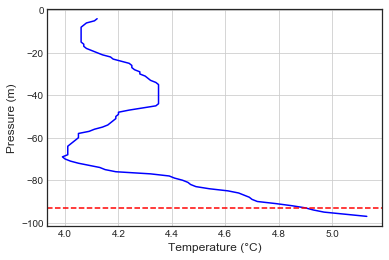

4.32
4.546666666666667
4.24
4.546666666666667
4.25
4.546666666666667
4.25
4.546666666666667
4.26
4.546666666666667
4.28
4.546666666666667
4.29
4.546666666666667
4.29
4.546666666666667
4.28
4.546666666666667
4.27
4.546666666666667
4.25
4.546666666666667
4.28
4.546666666666667
4.3
4.546666666666667
4.33
4.546666666666667
4.31
4.546666666666667
4.25
4.546666666666667
4.17
4.546666666666667
4.15
4.546666666666667
4.12
4.546666666666667
4.05
4.546666666666667
3.94
4.546666666666667
3.93
4.546666666666667
3.92
4.546666666666667
3.91
4.546666666666667
3.87
4.546666666666667
3.79
4.546666666666667
3.71
4.546666666666667
3.69
4.546666666666667
3.69
4.546666666666667
3.68
4.546666666666667
3.68
4.546666666666667
3.68
4.546666666666667
3.68
4.546666666666667
3.68
4.546666666666667
3.67
4.546666666666667
3.66
4.546666666666667
3.65
4.546666666666667
3.65
4.546666666666667
3.65
4.546666666666667
3.65
4.546666666666667
3.65
4.546666666666667
3.65
4.546666666666667
3.65
4.546666666666667
3.65
4.54666

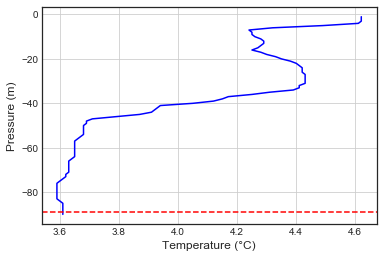

4.97
5.18
4.96
5.18
4.9
5.18
4.87
5.18
4.83
5.18
4.81
5.18
4.83
5.18
4.87
5.18
4.89
5.18
4.93
5.18
4.96
5.18
5.39
5.18
5.4
5.18
5.42
5.18
5.44
5.18
5.45
5.18
5.49
5.18
5.53
5.18
5.57
5.18
5.59
5.18
5.61
5.18
5.61
5.18
5.69
5.18
5.73
5.18
5.74
5.18
5.74
5.18
5.75
5.18
5.82
5.18
5.86
5.18
5.91
5.18
5.91
5.18
5.91
5.18
5.93
5.18
6.0
5.18
6.11
5.18
6.16
5.18
6.24
5.18
6.28
5.18
6.33
5.18
6.46
5.18
6.5
5.18
6.52
5.18
6.56
5.18
6.63
5.18
6.67
5.18
6.72
5.18
6.76
5.18
6.78
5.18
6.8
5.18
6.9
5.18
6.93
5.18
6.95
5.18
6.87
5.18
6.79
5.18
6.82
5.18
6.88
5.18
6.84
5.18
6.85
5.18
6.84
5.18
6.82
5.18
6.78
5.18
6.71
5.18
6.87
5.18
7.06
5.18
7.18
5.18
7.27
5.18
7.3
5.18
7.37
5.18
7.54
5.18
7.66
5.18
7.75
5.18
7.82
5.18
7.87
5.18
7.96
5.18
8.02
5.18
8.05
5.18
8.07
5.18
8.11
5.18
8.18
5.18
8.23
5.18
8.27
5.18
8.31
5.18
8.34
5.18
8.36
5.18
8.37
5.18
8.38
5.18
8.39
5.18
8.43
5.18
8.44
5.18
8.45
5.18
8.48
5.18
8.51
5.18
8.53
5.18
8.53
5.18
8.54
5.18
8.55
5.18
8.55
5.18
8.56
5.18
8.58
5.18
8.6
5.18
8.62
5.1

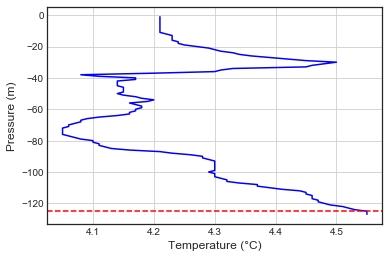

4.57
4.816666666666666
4.54
4.816666666666666
4.51
4.816666666666666
4.47
4.816666666666666
4.44
4.816666666666666
4.39
4.816666666666666
4.29
4.816666666666666
4.18
4.816666666666666
4.11
4.816666666666666
4.08
4.816666666666666
4.08
4.816666666666666
4.08
4.816666666666666
4.09
4.816666666666666
4.09
4.816666666666666
4.11
4.816666666666666
4.12
4.816666666666666
4.12
4.816666666666666
4.13
4.816666666666666
4.13
4.816666666666666
4.14
4.816666666666666
4.15
4.816666666666666
4.16
4.816666666666666
4.16
4.816666666666666
4.16
4.816666666666666
4.19
4.816666666666666
4.23
4.816666666666666
4.24
4.816666666666666
4.26
4.816666666666666
4.29
4.816666666666666
4.39
4.816666666666666
4.42
4.816666666666666
4.43
4.816666666666666
4.44
4.816666666666666
4.47
4.816666666666666
4.51
4.816666666666666
4.53
4.816666666666666
4.54
4.816666666666666
4.54
4.816666666666666
4.54
4.816666666666666
4.54
4.816666666666666
4.54
4.816666666666666
4.54
4.816666666666666
4.54
4.816666666666666
4.54
4.8166

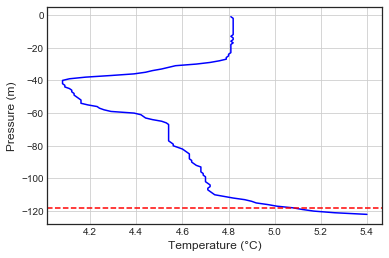

5.33
5.535
5.32
5.535
5.21
5.535
5.13
5.535
4.95
5.535
4.75
5.535
4.61
5.535
4.64
5.535
4.72
5.535
4.76
5.535
4.78
5.535
4.8
5.535
4.81
5.535
4.82
5.535
4.83
5.535
4.85
5.535
4.87
5.535
4.91
5.535
4.91
5.535
4.91
5.535
4.91
5.535
4.91
5.535
4.92
5.535
4.94
5.535
4.96
5.535
4.99
5.535
5.04
5.535
5.05
5.535
5.06
5.535
5.07
5.535
5.09
5.535
5.11
5.535
5.13
5.535
5.13
5.535
5.11
5.535
5.1
5.535
5.09
5.535
5.1
5.535
5.12
5.535
5.1
5.535
5.08
5.535
5.07
5.535
5.08
5.535
5.08
5.535
5.09
5.535
5.09
5.535
5.08
5.535
5.07
5.535
5.07
5.535
5.07
5.535
5.05
5.535
5.02
5.535
5.0
5.535
4.97
5.535
4.95
5.535
4.93
5.535
4.95
5.535
4.98
5.535
5.0
5.535
5.02
5.535
5.02
5.535
5.02
5.535
5.02
5.535
5.02
5.535
5.05
5.535
5.11
5.535
5.13
5.535
5.13
5.535
5.15
5.535
5.16
5.535
5.17
5.535
5.19
5.535
5.19
5.535
5.19
5.535
5.2
5.535
5.24
5.535
5.28
5.535
5.28
5.535
5.3
5.535
5.82
5.535
5.89
5.535
5.92
5.535
5.96
5.535
5.99
5.535
6.02
5.535
6.05
5.535
6.08
5.535
6.1
5.535
6.12
5.535
6.15
5.535
6.2
5.535
6.28
5.53

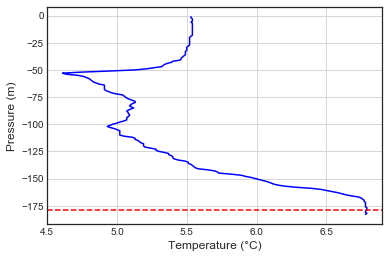

5.06
5.304
4.94
5.304
4.83
5.304
4.79
5.304
4.78
5.304
4.75
5.304
4.7
5.304
4.61
5.304
4.59
5.304
4.58
5.304
4.55
5.304
4.49
5.304
4.46
5.304
4.42
5.304
4.39
5.304
4.37
5.304
4.35
5.304
4.35
5.304
4.35
5.304
4.35
5.304
4.35
5.304
4.35
5.304
4.35
5.304
4.35
5.304
4.35
5.304
4.35
5.304
4.32
5.304
4.27
5.304
4.24
5.304
4.23
5.304
4.22
5.304
4.22
5.304
4.22
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.21
5.304
4.22
5.304
4.22
5.304
4.22
5.304
4.22
5.304
4.22
5.304
4.22
5.304
4.24
5.304
4.24
5.304
4.25
5.304
4.27
5.304
4.29
5.304
4.29
5.304
4.29
5.304
4.29
5.304
4.29
5.304
4.29
5.304
4.29
5.304
4.29
5.304
4.29
5.304
4.29
5.304
4.3
5.304
4.3
5.304
4.3
5.304
4.3
5.304
4.3
5.304
4.31
5.304
4.31
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.32
5.304
4.33


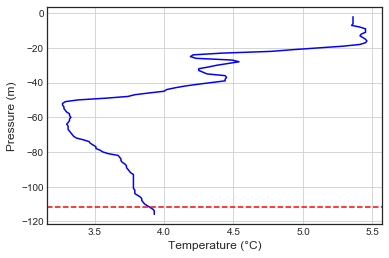

5.81
6.013333333333333
5.76
6.013333333333333
5.71
6.013333333333333
5.58
6.013333333333333
5.5
6.013333333333333
5.41
6.013333333333333
5.35
6.013333333333333
5.3
6.013333333333333
5.25
6.013333333333333
5.22
6.013333333333333
5.16
6.013333333333333
4.96
6.013333333333333
4.84
6.013333333333333
4.58
6.013333333333333
4.4
6.013333333333333
4.17
6.013333333333333
3.99
6.013333333333333
3.88
6.013333333333333
3.75
6.013333333333333
3.67
6.013333333333333
3.66
6.013333333333333
3.56
6.013333333333333
3.48
6.013333333333333
3.44
6.013333333333333
3.42
6.013333333333333
3.38
6.013333333333333
3.34
6.013333333333333
3.32
6.013333333333333
3.32
6.013333333333333
3.31
6.013333333333333
all mixed


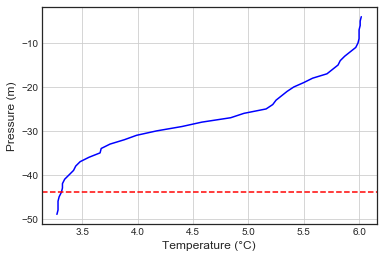

In [574]:
for year in range(1994,1995):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [];counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        elif yd > 59 and yd <= 151:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            floor_intermediate.append(npfile[i]['depth'])
            s_intermediate.append(npfile[i]['s'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate, 
                            'depth': floor_intermediate, 's': s_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'temp': month_df['t'].iloc[ii],'sal': month_df['s'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for x in range(len(l)):
                    val = df_final[1][x]
                    numrange.append(x)
                    surfaceval.append(val)      
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
#                 b = dffin.at[ix,'temp']
                c = dffinunreversed.at[ix,'temp']
                if c >= (surfacevalmean + 0.2) or c <= (surfacevalmean - 0.2):
                    print(c)
                    print(surfacevalmean)
#                     print(surfacevalmean)
                    yplottable = dffinunreversed.at[ix,'pressure']*-1
#                     print(dffinunreversed.at[ix,'pressure']*-1)
                    if dffinunreversed.at[ix,'pressure'] >= month_df['depth'].iloc[ii] - 6:
                        print('all mixed')
                        plt.style.use('seaborn-white')
    #                     plt.scatter(df_final[1],df_final[0]*-1,color='blue')
                        plt.plot(df_final[1],df_final[0]*-1,color='blue')
                        plt.axhline(y=yplottable, color='r', linestyle='--')
                        plt.xlabel('Temperature (°C)')
                        plt.ylabel('Pressure (m)')
                        plt.grid(True)
                        plt.show()
                        break
                    elif dffinunreversed.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                elif c >= (surfacevalmean + 0.2) and c <= (surfacevalmean - 0.2):
                    print('yes')
#                     seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
#                     seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                    
                    break
#                                         seasonyeartemp.append(dffin.at[ix,'temp'])
#                         seasonyeardepth.append(dffin.at[ix,'pressure'])
#                         counterii.append(ix)
# #                         print(month_df['depth'].iloc[ii]) 
#                         floors.append(month_df['depth'].iloc[ii])
# #                         print(ii)
# #                         print(month_df.at[ii,'depth'])
#                         pnew.append(dffin.at[ix,'pressure'])
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1

#                         plt.style.use('seaborn-white')  
#                         plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Temperature (°C)')
#                         plt.ylabel('Pressure (m)')
#                         plt.grid(False)
#                         plt.show()

In [577]:
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [];counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        elif yd > 59 and yd <= 151:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            floor_intermediate.append(npfile[i]['depth'])
            s_intermediate.append(npfile[i]['s'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate, 
                            'depth': floor_intermediate, 's': s_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'temp': month_df['t'].iloc[ii],'sal': month_df['s'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
#             print(month_df['depth'].iloc[ii])
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for x in range(len(l)):
                    val = df_final[1][x]
                    numrange.append(x)
                    surfaceval.append(val)      
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            pnew = []
            for ix in range(len(dffinunreversed)):
                b = dffin.at[ix,'temp']
                c = dffinunreversed.at[ix,'temp']
#                 if b > (surfacevalmean + 0.2) or b < (surfacevalmean - 0.2):
#                     pass
                
                if c <= (surfacevalmean + 0.2) and c >= (surfacevalmean - 0.2):
                    if dffinunreversed.at[ix,'pressure'] >= month_df['depth'].iloc[ii] - 6:
                        print(dffinunreversed.at[ix,'pressure'])
#                         print(dffin.at[ix,'pressure'])
#                         dffin.at[ix,'pressure'] = c
#                         print(c)
#                         print(b)
                        print(dffinunreversed)
                        print(dffin)
#                         print(surfacevalmean)
#                         c = dffinunreversed.at[ix,'temp']
#                         print(c)
#                         pass
#                         print(month_df['depth'].iloc[ii])
#                         seasonyeartemp.append(dffin.at[ix,'temp'])
#                         seasonyeardepth.append(dffin.at[ix,'pressure'])
#                         seasonyearsal.append(dffin.at[ix,'sal'])
#                         counterii.append(ix)
# #                         print(month_df['depth'].iloc[ii]) 
#                         floors.append(month_df['depth'].iloc[ii])
# #                         print(ii)
# #                         print(month_df.at[ii,'depth'])
#                         pnew.append(dffin.at[ix,'pressure'])
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1
                        plt.style.use('seaborn-white')
                        plt.subplot(1, 2, 1)
#                         plt.scatter(df_final[1],df_final[0]*-1,color='blue')
                        plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
                        plt.xlabel('Temperature (°C)')
                        plt.ylabel('Pressure (m)')
                        plt.grid(True)
                        plt.subplot(1, 2, 2)
                        plt.plot(df_final[2],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
                        plt.xlabel('Salinity')
                        plt.grid(True)
                        plt.show()
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    elif dffin.at[ix,'pressure'] == 0:
                        pass
                    else:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                        counterii.append(ii)
                        floors.append(month_df['depth'].iloc[ii])
                        pnew.append(dffin.at[ix,'pressure'])
                        seasonyearsal.append(dffin.at[ix,'sal'])
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1

#                         plt.style.use('seaborn-white')
#                         plt.subplot(1, 2, 1)
#                         plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Temperature (°C)')
#                         plt.ylabel('Pressure (m)')
#                         plt.subplot(1, 2, 2)
#                         plt.plot(df_final[2],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Salinity')
#                         plt.ylabel('Pressure (m)')
    
# #                         plt.grid(False)
#                         plt.show()
#                         print(month_df['depth'].iloc[ii])  

#                         print(ii)
#                         print(month_df.at[ii,'depth'])
                    break  
#     monthly = []
#     if len(seasonyeartemp) > 0:
# #         print('depth_',year,np.mean(seasonyeardepth))
# #         print(seasonyeardepth)
# #         print(floors)
#         bottomandmixeddepths = pd.DataFrame({'MLD': seasonyeardepth,'bottomd': floors}) 
# #         print(bottomandmixeddepths)
#         bottomandmixeddepths = bottomandmixeddepths[bottomandmixeddepths.bottomd <= 200]
# #         print(bottomandmixeddepths)
#         filteredMLD = bottomandmixeddepths['MLD'].tolist()
#         filteredfloors = bottomandmixeddepths['bottomd'].tolist()
# #         print('filtereddepthstd_',year,np.std(filteredMLD))
# #         print(filteredMLD)
# #         print(filteredfloors)
#         print('filtereddepth_',year,np.mean(filteredMLD))

KeyboardInterrupt: 

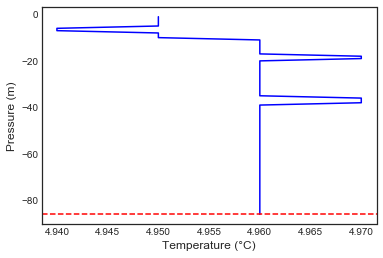

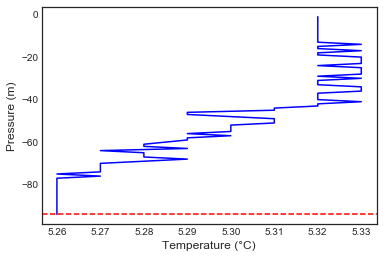

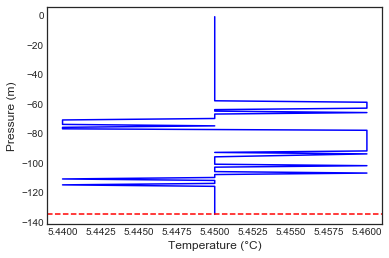

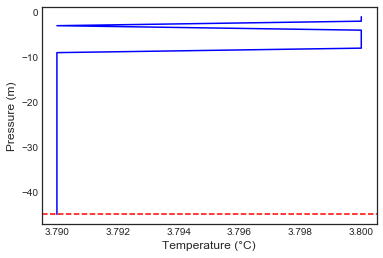

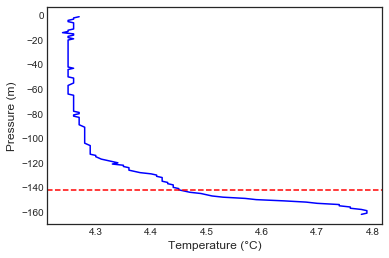

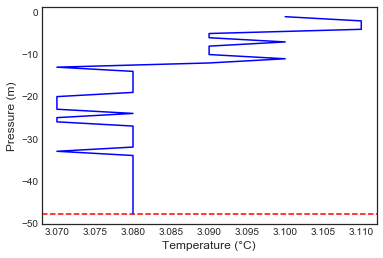

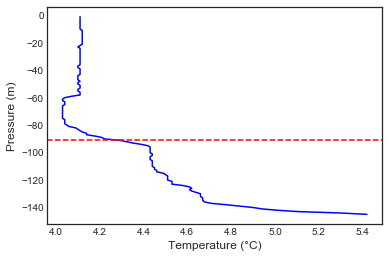

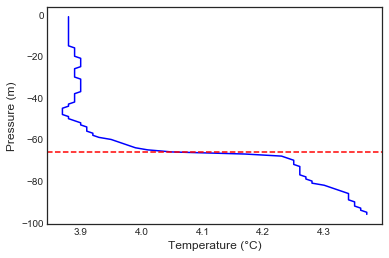

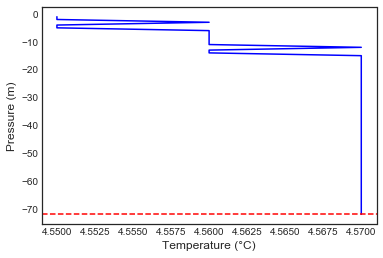

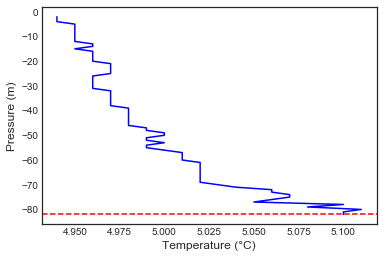

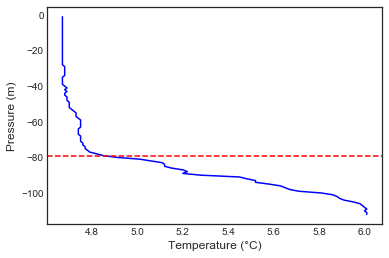

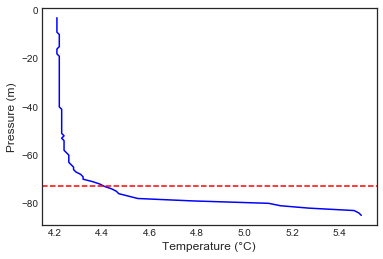

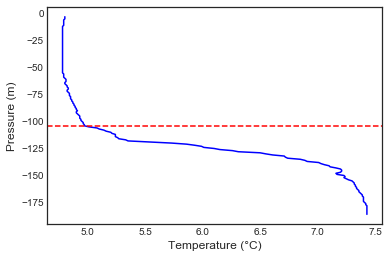

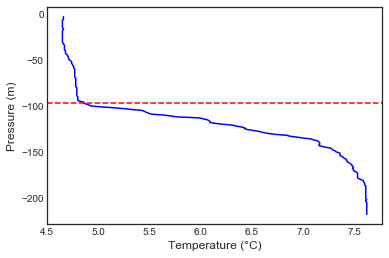

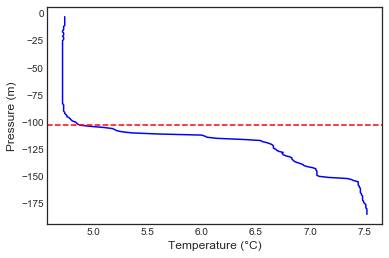

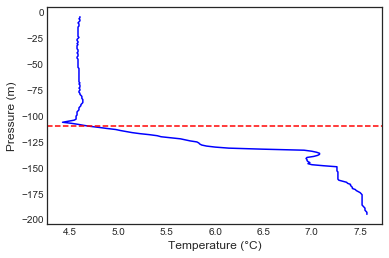

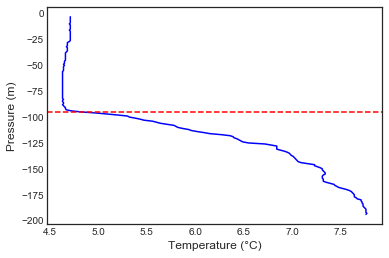

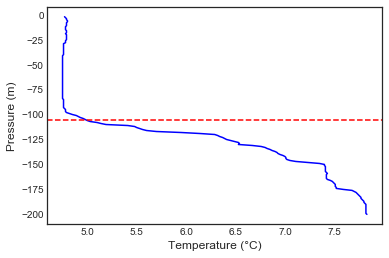

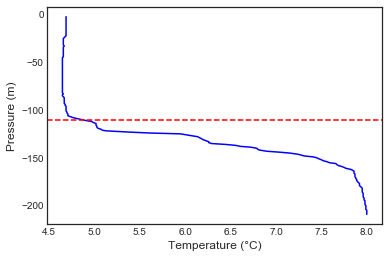

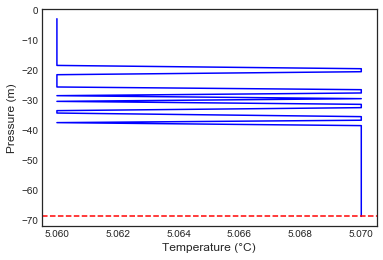

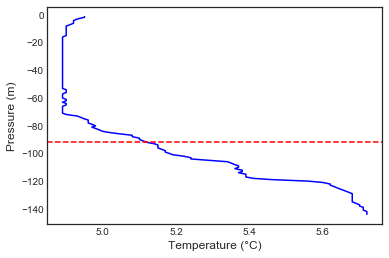

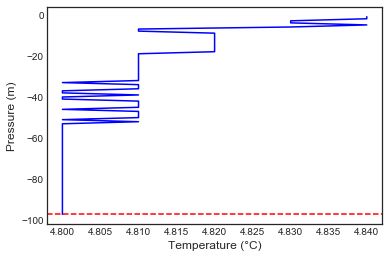

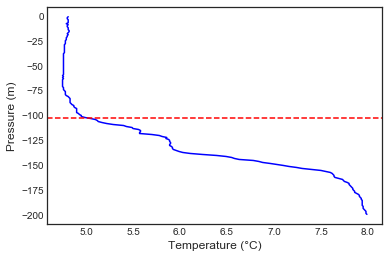

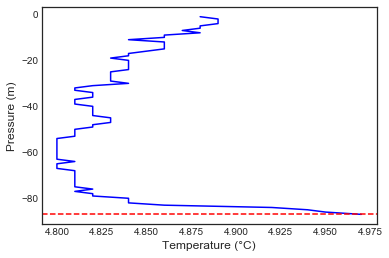

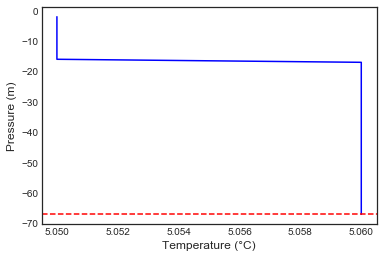

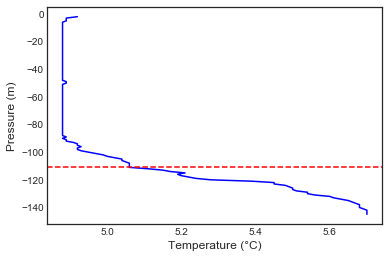

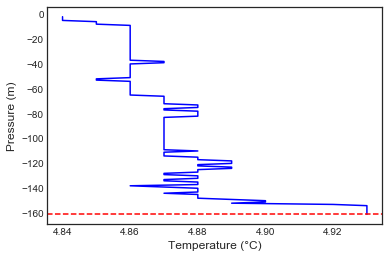

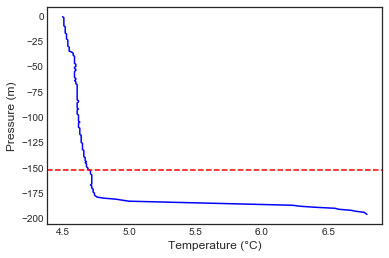

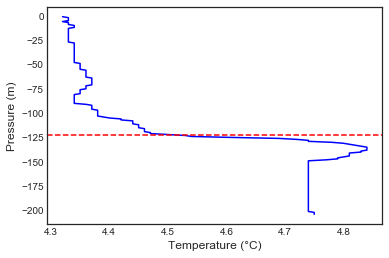

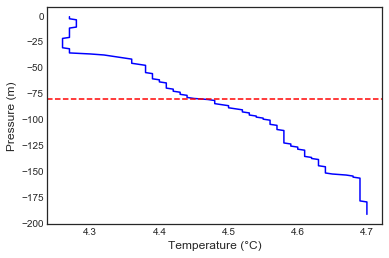

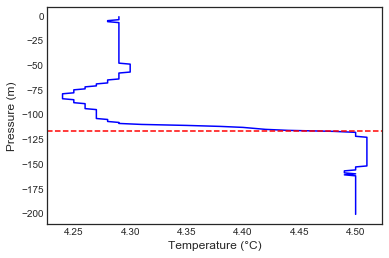

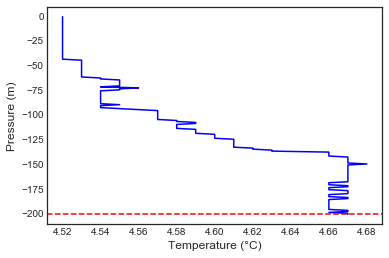

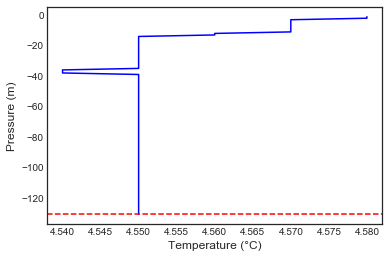

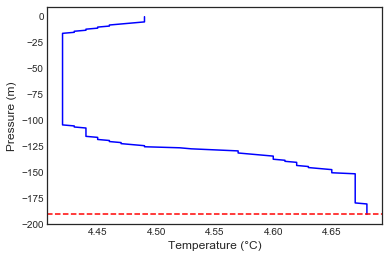

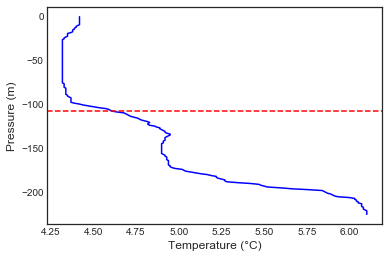

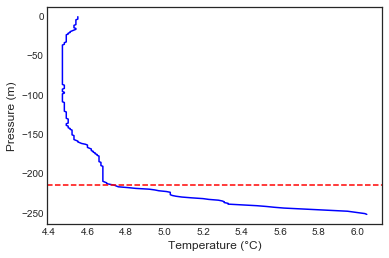

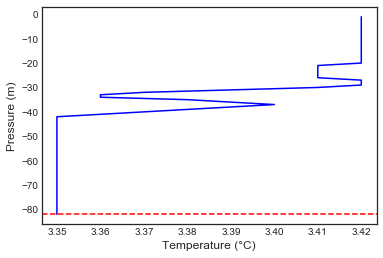

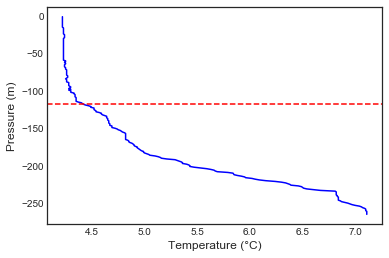

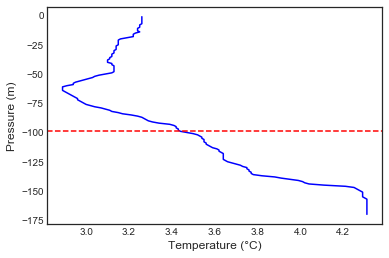

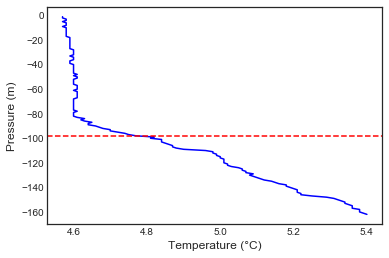

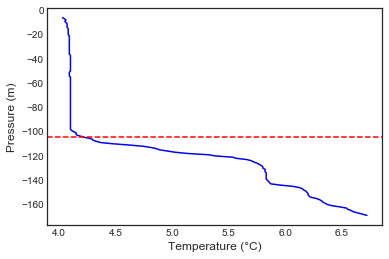

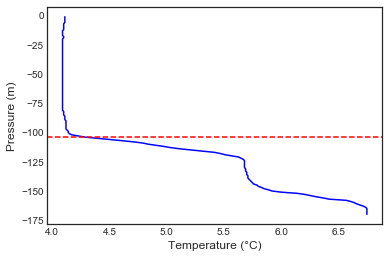

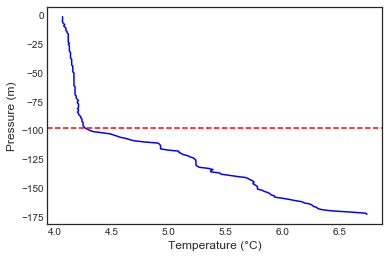

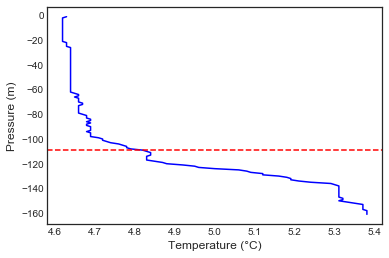

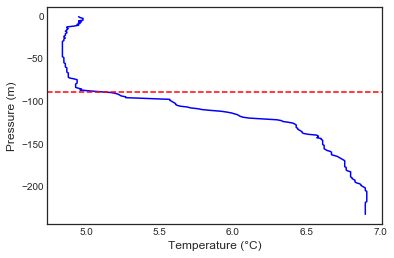

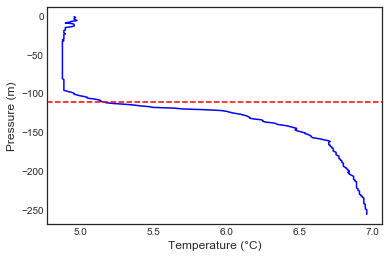

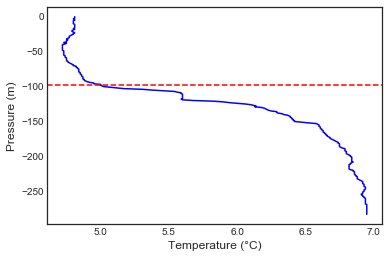

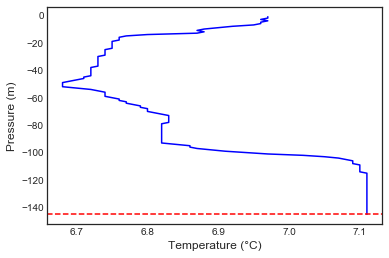

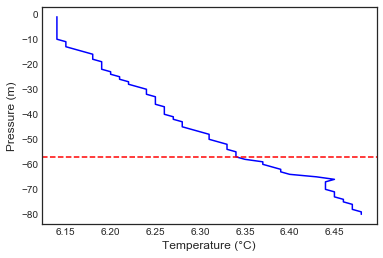

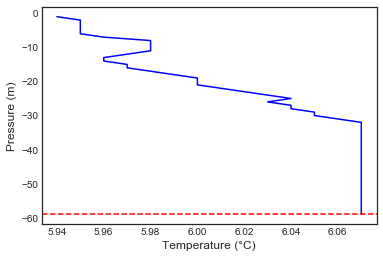

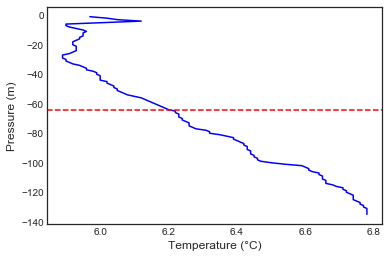

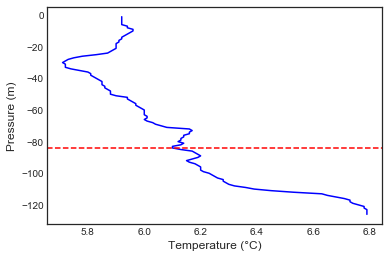

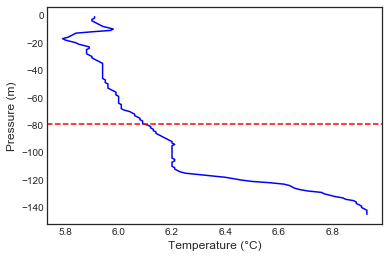

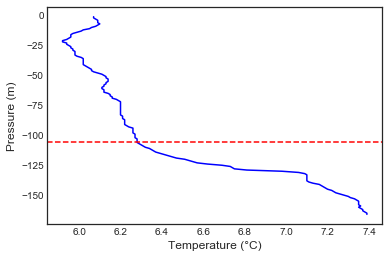

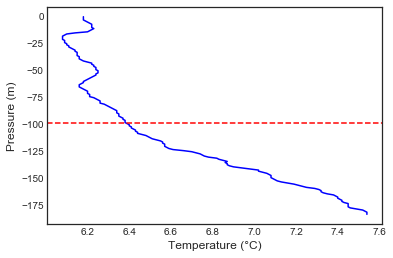

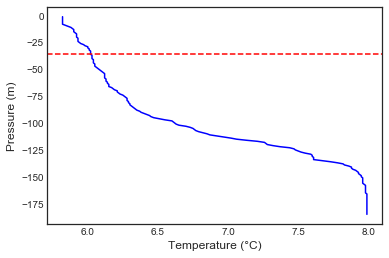

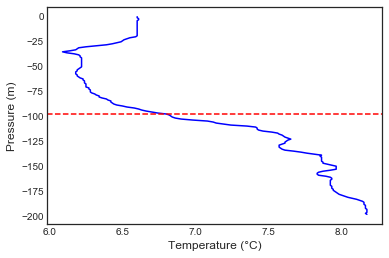

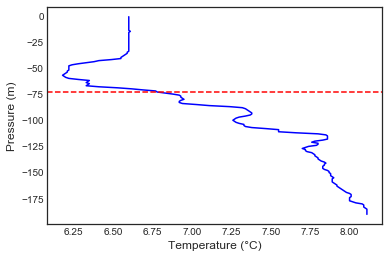

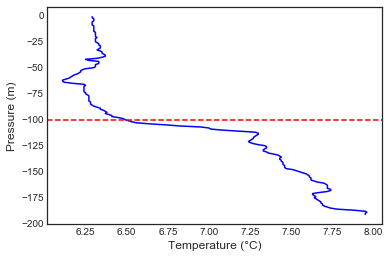

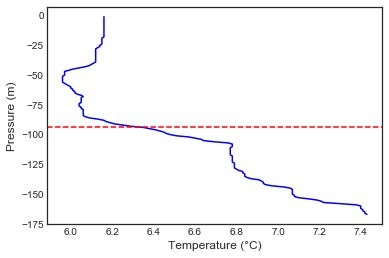

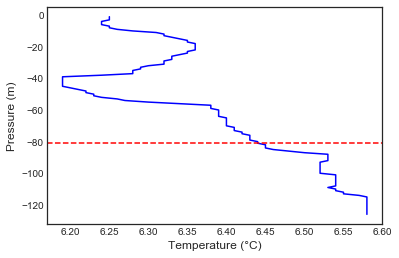

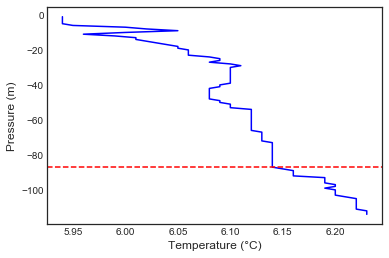

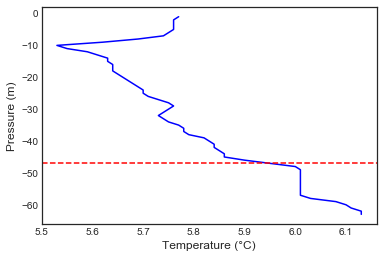

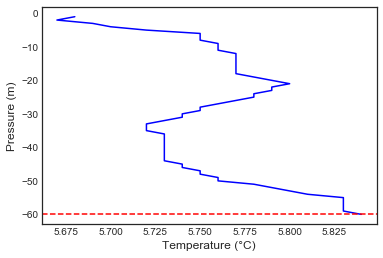

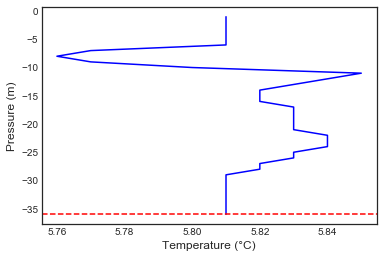

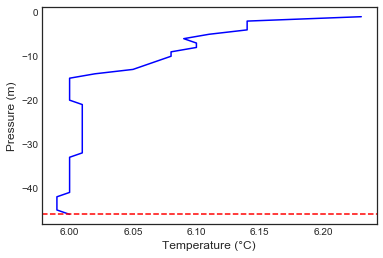

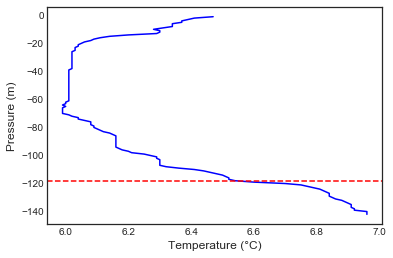

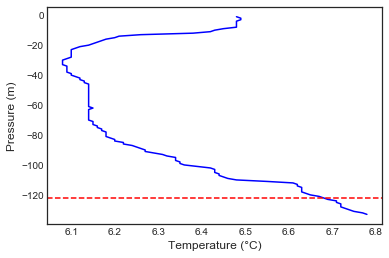

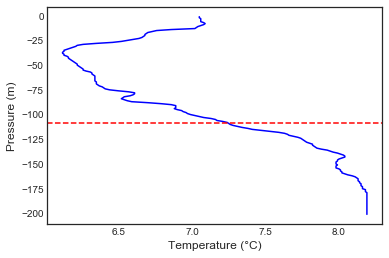

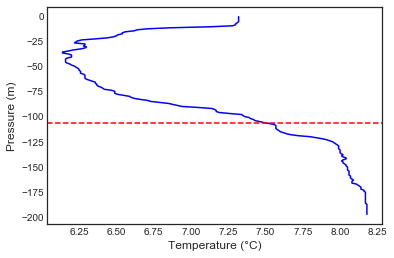

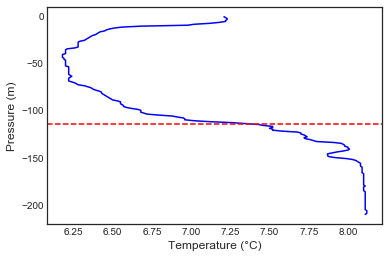

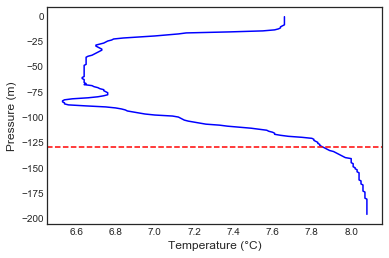

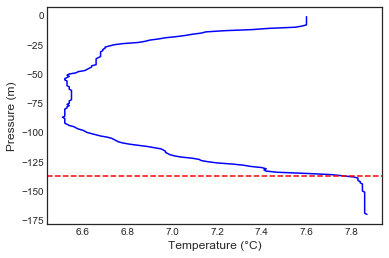

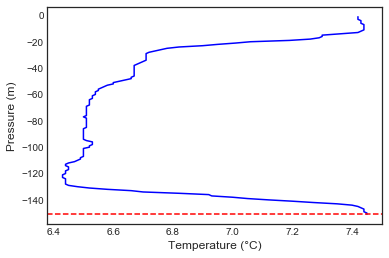

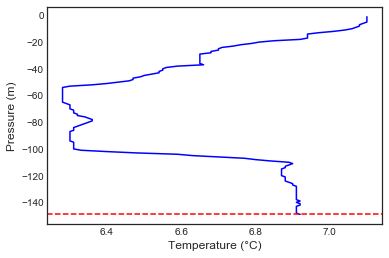

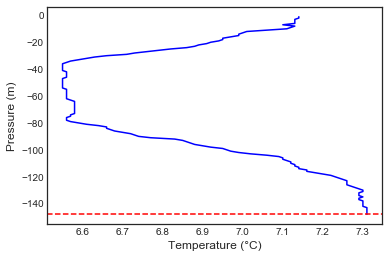

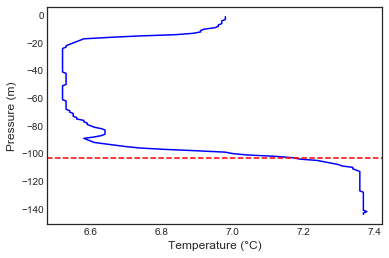

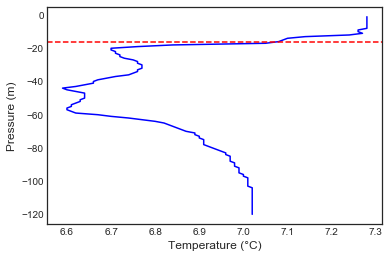

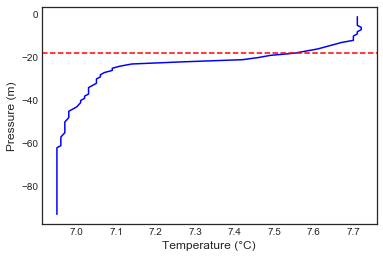

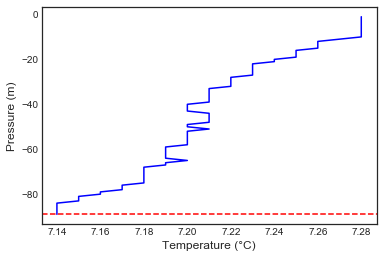

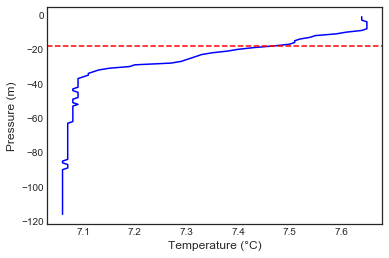

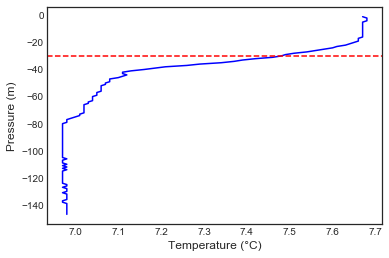

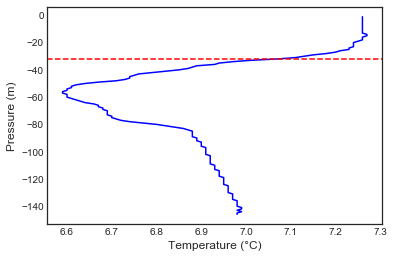

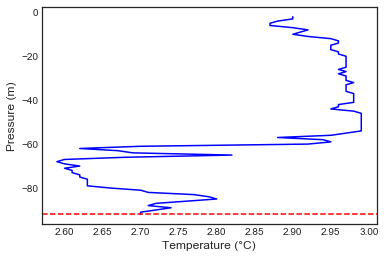

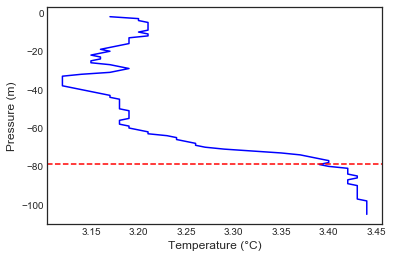

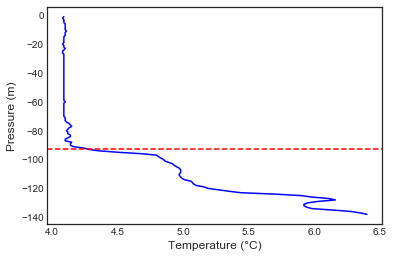

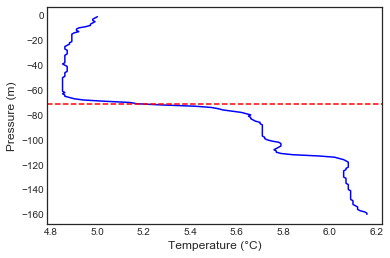

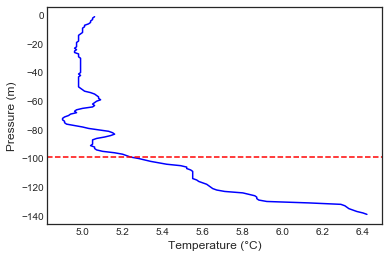

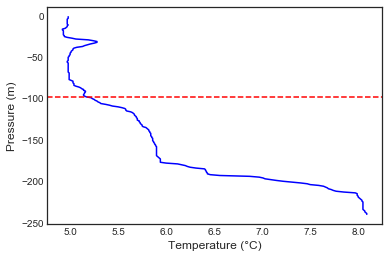

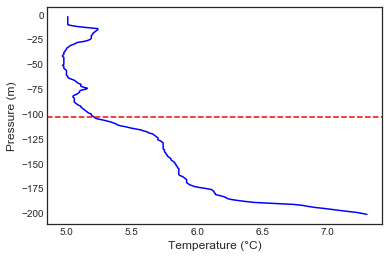

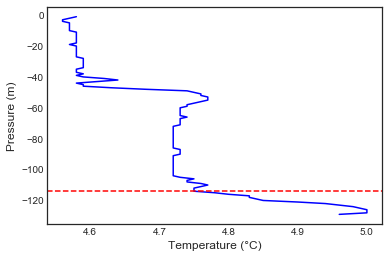

In [504]:
years = []; filteredMLDlist = []; filteredMLDstdlist = []; filteredfloorslist = []
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [];counterii = []; floors = []; floor_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if gear == 'Bottle':
#             pass
        #if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd >= 59 and yd <= 90:
            if gear == 'Bottle':
                pass
            else:
#         elif yd > 243 and yd <= 334:
                lat_intermediate.append(npfile[i]['lat'])
                lon_intermediate.append(npfile[i]['lon'])
                p_intermediate.append(npfile[i]['p'])
                t_intermediate.append(npfile[i]['t'])
                yd_intermediate.append(npfile[i]['yd'])
                floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate, 
                            'depth': floor_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'temp': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
#             print(month_df['depth'].iloc[ii])
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for x in range(len(l)):
                    val = df_final[1][x]
                    numrange.append(x)
                    surfaceval.append(val)      
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            pnew = []
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                
                if b > (surfacevalmean + 0.2) or b < (surfacevalmean - 0.2):
                    pass
                
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        counterii.append(ix)
#                         print(month_df['depth'].iloc[ii]) 
                        floors.append(month_df['depth'].iloc[ii])
#                         print(ii)
#                         print(month_df.at[ii,'depth'])
                        pnew.append(dffin.at[ix,'pressure'])
                        if len(pnew) > 0:
                            yplottable = pnew[0]*-1

                        plt.style.use('seaborn-white')  
                        plt.plot(df_final[1],df_final[0]*-1,color='blue')
                        plt.axhline(y=yplottable, color='r', linestyle='--')
                        plt.xlabel('Temperature (°C)')
                        plt.ylabel('Pressure (m)')
                        plt.grid(False)
                        plt.show()
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    elif dffin.at[ix,'pressure'] == 0:
                        pass
                    else:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                        counterii.append(ii)
                        floors.append(month_df['depth'].iloc[ii])
                        pnew.append(dffin.at[ix,'pressure'])
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1

#                         plt.style.use('seaborn-white')  
#                         plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Temperature (°C)')
#                         plt.ylabel('Pressure (m)')
#                         plt.grid(False)
#                         plt.show()
#                         print(month_df['depth'].iloc[ii])  

#                         print(ii)
#                         print(month_df.at[ii,'depth'])
                    break  
#     print(year, seasonyeartemp)
#     monthly = []
#     if len(seasonyeartemp) > 0:
# #         print('depth_',year,np.mean(seasonyeardepth))
# #         print(seasonyeardepth)
# #         print(floors)
#         bottomandmixeddepths = pd.DataFrame({'MLD': seasonyeardepth,'bottomd': floors}) 
# #         print(bottomandmixeddepths)
#         bottomandmixeddepths = bottomandmixeddepths[bottomandmixeddepths.bottomd <= 200]
# #         print(bottomandmixeddepths)
#         filteredMLD = bottomandmixeddepths['MLD'].tolist()
#         filteredfloors = bottomandmixeddepths['bottomd'].tolist()
# #         print('filtereddepthstd_',year,np.std(filteredMLD))
# #         print(filteredMLD)
# #         print(filteredfloors)
#         new = np.mean(filteredMLD)
#         newstd = np.std(filteredMLD)
#         print('filtereddepth_',year,np.mean(filteredMLD))
#         filteredMLDlist.append(new)
#         filteredMLDstdlist.append(filteredMLD)
#         filteredfloorslist.append(filteredfloors)
#     years.append(year)
#     filteredMLDlist.append(np.mean(filteredMLD))

In [492]:
flat_filteredfloorslist = sum(filteredfloorslist, []) 
flat_filteredMLDstdlist = sum(filteredMLDstdlist, []) 
print(len(flat_filteredfloorslist))
print(len(flat_filteredMLDstdlist))


5198
5198


In [493]:
bananasplit = [(x/y)*100 for x, y in zip(map(int, flat_filteredMLDstdlist), map(int, flat_filteredfloorslist))]

In [494]:
print(bananasplit)

[10.062893081761008, 10.9375, 9.195402298850574, 8.547008547008547, 11.11111111111111, 8.19672131147541, 6.875000000000001, 6.214689265536723, 4.40251572327044, 4.8, 5.755395683453238, 5.025125628140704, 4.081632653061225, 8.928571428571429, 11.304347826086957, 4.651162790697675, 8.205128205128204, 7.262569832402235, 4.848484848484849, 8.284023668639055, 8.88888888888889, 6.25, 20.0, 8.96551724137931, 5.555555555555555, 12.941176470588237, 19.230769230769234, 34.177215189873415, 25.543478260869566, 80.89887640449437, 87.5, 62.06896551724138, 78.72340425531915, 91.66666666666666, 41.41414141414141, 44.099378881987576, 68.62745098039215, 32.0, 56.060606060606055, 65.59139784946237, 65.71428571428571, 63.76811594202898, 31.147540983606557, 80.7017543859649, 35.84905660377358, 86.53846153846155, 22.988505747126435, 26.262626262626267, 46.08695652173913, 51.724137931034484, 12.5, 19.897959183673468, 20.125786163522015, 13.380281690140844, 16.374269005847953, 15.789473684210526, 22.463768115

In [495]:
print(len(bananasplit))

5198


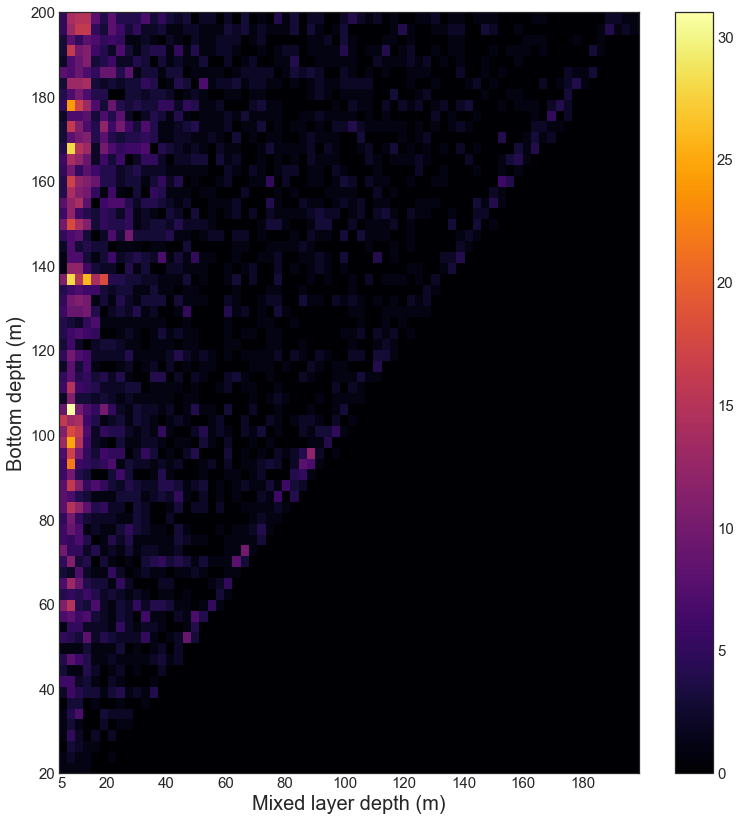

In [502]:
x = flat_filteredMLDstdlist
y = flat_filteredfloorslist
plt.style.use('seaborn-white')
plt.figure(figsize=(13, 14))
# plt.scatter(x, y, marker='.', c='red')
plt.hist2d(x, y, bins=(70, 70), cmap='inferno')
# plt.ylim((20,200))
# plt.xlim((4,180))
# plt.scatter(x, y, marker='.', c='red')
plt.ylabel('Bottom depth (m)', fontsize = 20)
plt.xlabel('Mixed layer depth (m)', fontsize = 20)
plt.xticks([5, 20, 40,60,80, 100, 120, 140, 160,180], fontsize = 15) 
plt.yticks([20, 40,60,80,100,120,140,160,180, 200], fontsize = 15) 
cbar = plt.colorbar()
# cbar.ax.set_yticklabels(fontsize=15)
cbar.ax.set_yticklabels([0,5,10,15,20,25,30], fontsize=15)
# cbar.set_label('Count', rotation=270, fontsize = 20)

# plt.grid(b=True, which='major', color='white', linestyle='--',alpha = 0.15)
plt.savefig('2dhist')
plt.show()

In [250]:
print(filteredMLDlist)
print(len(filteredMLDlist))

[12.142857142857142, 86.0, 89.44, 72.28, 80.4090909090909, 86.6, 61.75757575757576, 79.27272727272727, 72.62375, 70.81011235955057, 80.30985915492958, 96.88888888888889, 72.74509803921569, 77.4, 69.11290322580645, 41.84931506849315, 36.50920245398773, 32.850806451612904, 85.67391304347827, 62.89473684210526, 68.296875, 54.979166666666664, 82.22916666666667, 46.537974683544306, 46.15686274509804, 33.2962962962963, 57.605633802816904, 15.961538461538462, 57.125, 20.02777777777778, 71.48484848484848]
31


In [251]:
print(filteredMLDstdlist)
print(len(filteredMLDstdlist))

[3.270149469217028, 0.0, 74.04165314199838, 34.61735980689458, 65.52907688465764, 63.47832025862959, 55.571973698886346, 46.76781639266197, 43.022012516123645, 44.62875589568192, 70.0839720780271, 71.75954360756089, 61.903417225594865, 70.8028248024046, 64.98736970060827, 49.012486872162306, 52.69094613769421, 45.45431417114321, 64.11981120555421, 61.52525774606899, 59.43922307899368, 65.88262592903804, 54.621515748273495, 49.67255260175425, 59.82339123768594, 43.86284584408355, 65.3673215668475, 35.881729622609605, 72.78152953646047, 36.89962820582878, 71.14097025778793]
31


In [252]:
print(years)

[1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


best fit line:
y = 2049.15 + -0.99x


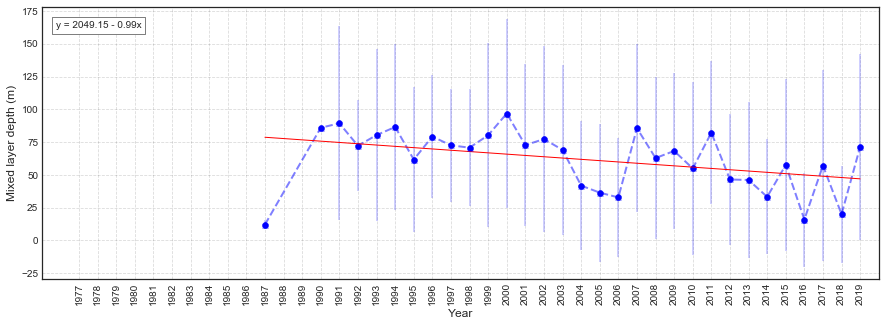

In [256]:
from matplotlib.offsetbox import AnchoredText

x= [1987, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y = filteredMLDlist
e = filteredMLDstdlist

plt.style.use('seaborn-white')
plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,100))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
# plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 1)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.15)
plt.xticks([1977,1978,1979,1980,1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# # plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.25)
a = AnchoredText("y = 2049.15 - 0.99x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_spring_WesternGoM_withstd')
plt.show()

#### Spring Mean and Standard Deviation (Mean first, STD after)

In [164]:
filtereddepth_1987= 12.333333333333334
filtereddepth_1990= 86.0
filtereddepth_1991= 72.28571428571429
filtereddepth_1992= 72.51162790697674
filtereddepth_1993= 63.2
filtereddepth_1994= 66.5
filtereddepth_1995= 55.72
filtereddepth_1996= 72.49019607843137
filtereddepth_1997= 68.84285714285714
filtereddepth_1998= 65.80958904109589
filtereddepth_1999= 60.679245283018865
filtereddepth_2000= 78.4
filtereddepth_2001= 54.9
filtereddepth_2002= 48.225806451612904
filtereddepth_2003= 61.91304347826087
filtereddepth_2004= 33.710743801652896
filtereddepth_2005= 23.581560283687942
filtereddepth_2006= 27.924444444444443
filtereddepth_2007= 71.55263157894737
filtereddepth_2008= 49.13333333333333
filtereddepth_2009= 63.925925925925924
filtereddepth_2010= 45.189189189189186
filtereddepth_2011= 76.92682926829268
filtereddepth_2012= 43.94964028776978
filtereddepth_2013= 39.30952380952381
filtereddepth_2014= 34.333333333333336
filtereddepth_2015= 47.473684210526315
filtereddepth_2016 =18.157894736842106
filtereddepth_2017 =32.714285714285715
filtereddepth_2018 =21.5
filtereddepth_2019 =60.96078431372549

In [125]:
filteredfldepth_1987 = 131.16666666666666
filteredfldepth_1990 =89.0
filteredfldepth_1991 =156.38095238095238
filteredfldepth_1992 =134.13953488372093
filteredfldepth_1993 =135.31428571428572
filteredfldepth_1994 =137.23076923076923
filteredfldepth_1995 =135.64
filteredfldepth_1996 =130.45098039215685
filteredfldepth_1997 =127.71428571428571
filteredfldepth_1998 =136.93150684931507
filteredfldepth_1999 =136.56603773584905
filteredfldepth_2000 =141.33333333333334
filteredfldepth_2001 =133.35
filteredfldepth_2002 =132.19354838709677
filteredfldepth_2003 =132.95652173913044
filteredfldepth_2004 =138.6611570247934
filteredfldepth_2005 =133.87234042553192
filteredfldepth_2006 =134.13333333333333
filteredfldepth_2007 =126.05263157894737
filteredfldepth_2008 =146.17777777777778
filteredfldepth_2009 =127.94444444444444
filteredfldepth_2010 =142.40540540540542
filteredfldepth_2011 =141.21951219512195
filteredfldepth_2012 =129.46043165467626
filteredfldepth_2013 =136.38095238095238
filteredfldepth_2014 =144.28571428571428
filteredfldepth_2015 =128.8421052631579
filteredfldepth_2016 =140.73684210526315
filteredfldepth_2017 =123.94285714285714
filteredfldepth_2018 =126.93333333333334
filteredfldepth_2019 =128.11764705882354

best fit line:
y = 138.30 + -0.09x


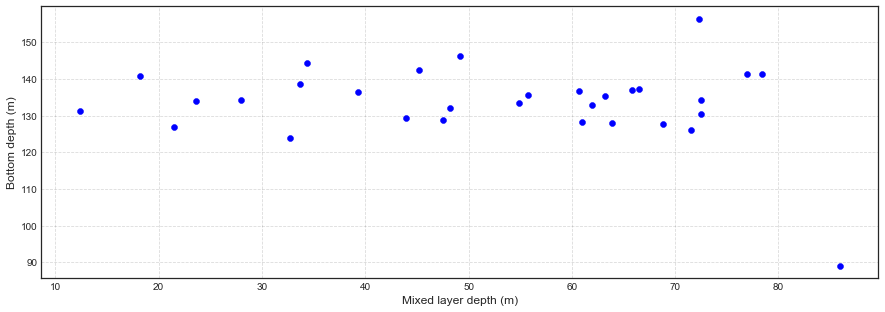

In [470]:
x = [filtereddepth_1987, filtereddepth_1990, filtereddepth_1991, filtereddepth_1992,
    filtereddepth_1993, filtereddepth_1994, filtereddepth_1995, filtereddepth_1996, filtereddepth_1997, filtereddepth_1998, filtereddepth_1999, filtereddepth_2000, filtereddepth_2001, filtereddepth_2002, filtereddepth_2003, filtereddepth_2004, filtereddepth_2005,
    filtereddepth_2006, filtereddepth_2007, filtereddepth_2008, filtereddepth_2009, filtereddepth_2010, filtereddepth_2011, filtereddepth_2012, filtereddepth_2013, filtereddepth_2014, filtereddepth_2015, filtereddepth_2016, filtereddepth_2017, filtereddepth_2018, filtereddepth_2019]
y = [filteredfldepth_1987, filteredfldepth_1990, filteredfldepth_1991, filteredfldepth_1992,
    filteredfldepth_1993, filteredfldepth_1994, filteredfldepth_1995, filteredfldepth_1996, filteredfldepth_1997, filteredfldepth_1998, filteredfldepth_1999, filteredfldepth_2000, filteredfldepth_2001, filteredfldepth_2002, filteredfldepth_2003, filteredfldepth_2004, filteredfldepth_2005,
    filteredfldepth_2006, filteredfldepth_2007, filteredfldepth_2008, filteredfldepth_2009, filteredfldepth_2010, filteredfldepth_2011, filteredfldepth_2012, filteredfldepth_2013, filteredfldepth_2014, filteredfldepth_2015, filteredfldepth_2016, filteredfldepth_2017, filteredfldepth_2018, filteredfldepth_2019]
plt.style.use('seaborn-white')
plt.figure(figsize=(15, 5))
plt.scatter(x, y, marker='o', c='blue')
plt.ylabel('Bottom depth (m)', fontsize = 12)
plt.xlabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.15)
# # plt.savefig('timeseries_spring_WesternGoM_withstd')
plt.show()

In [165]:
filtereddepthstd_1987 =3.4960294939005054
filtereddepthstd_1990 =0.0
filtereddepthstd_1991 =51.78908035037323
filtereddepthstd_1992 =35.826696615417596
filtereddepthstd_1993 =56.0651661653014
filtereddepthstd_1994 =58.42500123432407
filtereddepthstd_1995 =56.14375833518807
filtereddepthstd_1996 =45.65315638810582
filtereddepthstd_1997 =42.76531495575949
filtereddepthstd_1998 =43.72331488136134
filtereddepthstd_1999 =59.88094275385766
filtereddepthstd_2000 =63.79843258262698
filtereddepthstd_2001 =53.038570870640925
filtereddepthstd_2002 =49.42032341340069
filtereddepthstd_2003 =55.77822003136775
filtereddepthstd_2004 =40.26696819411579
filtereddepthstd_2005 =31.80016415238617
filtereddepthstd_2006 =39.38018201840196
filtereddepthstd_2007 =59.959941613863755
filtereddepthstd_2008 =55.171490222154894
filtereddepthstd_2009 =60.833973163104574
filtereddepthstd_2010 =56.217645511975626
filtereddepthstd_2011 =56.32111341917638
filtereddepthstd_2012 =47.16789600501247
filtereddepthstd_2013 =52.24233281418893
filtereddepthstd_2014 =46.319113953748264
filtereddepthstd_2015 =54.67964285332288
filtereddepthstd_2016 =41.743909934510185
filtereddepthstd_2017 =45.7143749999128
filtereddepthstd_2018 =40.24156226258287
filtereddepthstd_2019 =63.3322891919028

In [57]:
filtereddepth_1978 =37.425
filtereddepth_1979= 22.13888888888889
filtereddepth_1980 =49.93939393939394
filtereddepth_1981= 34.642857142857146
filtereddepth_1982= 40.6
filtereddepth_1984= 16.444444444444443
filtereddepth_1985= 57.083333333333336
filtereddepth_1986= 5.714285714285714
filtereddepth_1987= 12.333333333333334
filtereddepth_1990= 86.0
filtereddepth_1991= 72.28571428571429
filtereddepth_1992= 72.51162790697674
filtereddepth_1993= 63.2
filtereddepth_1994= 66.5
filtereddepth_1995= 55.72
filtereddepth_1996= 72.49019607843137
filtereddepth_1997= 68.84285714285714
filtereddepth_1998= 65.80958904109589
filtereddepth_1999= 60.679245283018865
filtereddepth_2000= 78.4
filtereddepth_2001= 54.9
filtereddepth_2002= 48.225806451612904
filtereddepth_2003= 61.91304347826087
filtereddepth_2004= 33.710743801652896
filtereddepth_2005= 23.581560283687942
filtereddepth_2006= 27.924444444444443
filtereddepth_2007= 71.55263157894737
filtereddepth_2008= 49.13333333333333
filtereddepth_2009= 63.925925925925924
filtereddepth_2010= 45.189189189189186
filtereddepth_2011= 76.92682926829268
filtereddepth_2012= 43.94964028776978
filtereddepth_2013= 39.30952380952381
filtereddepth_2014= 34.333333333333336
filtereddepth_2015= 47.473684210526315
filtereddepth_2016= 18.157894736842106
filtereddepth_2017= 32.714285714285715
filtereddepth_2018= 21.5
filtereddepth_2019= 60.96078431372549

In [58]:
filtereddepthstd_1978 =42.38625219337043
filtereddepthstd_1979 =30.164505242804992
filtereddepthstd_1980 =50.3743196924899
filtereddepthstd_1981 =42.352444933400655
filtereddepthstd_1982 =36.587429535292586
filtereddepthstd_1984 =5.871042139387959
filtereddepthstd_1985 =44.714759556797596
filtereddepthstd_1986 =1.749635530559413
filtereddepthstd_1987 =3.4960294939005054
filtereddepthstd_1990 =0.0
filtereddepthstd_1991 =51.78908035037323
filtereddepthstd_1992 =35.826696615417596
filtereddepthstd_1993 =56.0651661653014
filtereddepthstd_1994 =58.42500123432407
filtereddepthstd_1995 =56.14375833518807
filtereddepthstd_1996 =45.65315638810582
filtereddepthstd_1997 =42.76531495575949
filtereddepthstd_1998 =43.72331488136134
filtereddepthstd_1999 =59.88094275385766
filtereddepthstd_2000 =63.79843258262698
filtereddepthstd_2001 =53.038570870640925
filtereddepthstd_2002 =49.42032341340069
filtereddepthstd_2003 =55.77822003136775
filtereddepthstd_2004 =40.26696819411579
filtereddepthstd_2005 =31.80016415238617
filtereddepthstd_2006 =39.38018201840196
filtereddepthstd_2007 =59.959941613863755
filtereddepthstd_2008 =55.171490222154894
filtereddepthstd_2009 =60.833973163104574
filtereddepthstd_2010 =56.217645511975626
filtereddepthstd_2011 =56.32111341917638
filtereddepthstd_2012 =47.16789600501247
filtereddepthstd_2013 =52.24233281418893
filtereddepthstd_2014 =46.319113953748264
filtereddepthstd_2015 =54.67964285332288
filtereddepthstd_2016 =41.743909934510185
filtereddepthstd_2017 =45.7143749999128
filtereddepthstd_2018 =40.24156226258287
filtereddepthstd_2019 =63.33228919190284

In [ ]:
filtereddepth_ 1987 12.333333333333334
filtereddepth_ 1991 13.5
filtereddepth_ 1992 15.0
filtereddepth_ 1993 16.46153846153846
filtereddepth_ 1994 24.4
filtereddepth_ 1995 40.5
filtereddepth_ 1996 22.8
filtereddepth_ 1997 18.946153846153848
filtereddepth_ 1998 63.76571428571429
filtereddepth_ 1999 46.680851063829785
filtereddepth_ 2000 30.38888888888889
filtereddepth_ 2001 11.0
filtereddepth_ 2002 48.225806451612904
filtereddepth_ 2003 21.40740740740741
filtereddepth_ 2004 20.114285714285714
filtereddepth_ 2005 15.522727272727273
filtereddepth_ 2006 13.533333333333333
filtereddepth_ 2007 15.352941176470589
filtereddepth_ 2008 16.78125
filtereddepth_ 2009 12.535714285714286
filtereddepth_ 2010 12.037037037037036
filtereddepth_ 2011 12.125
filtereddepth_ 2012 9.425925925925926
filtereddepth_ 2013 32.6
filtereddepth_ 2014 12.181818181818182
filtereddepth_ 2015 10.12
filtereddepth_ 2016 8.333333333333334
filtereddepth_ 2017 12.2
filtereddepth_ 2018 10.857142857142858
filtereddepth_ 2019 11.0

best fit line:
y = 1885.98 + -0.91x


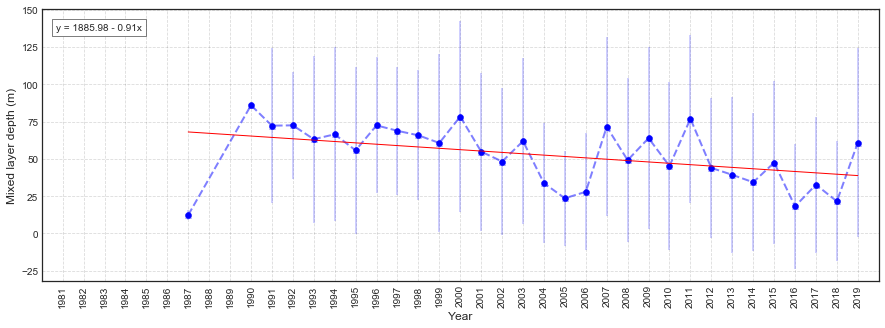

In [167]:
from matplotlib.offsetbox import AnchoredText

x = [1987, 1990, 1991, 1992,
    1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
    2006, 2007, 2008, 2009, 2010,2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y = [filtereddepth_1987, filtereddepth_1990, filtereddepth_1991, filtereddepth_1992,
    filtereddepth_1993, filtereddepth_1994, filtereddepth_1995, filtereddepth_1996, filtereddepth_1997, filtereddepth_1998, filtereddepth_1999, filtereddepth_2000, filtereddepth_2001, filtereddepth_2002, filtereddepth_2003, filtereddepth_2004, filtereddepth_2005,
    filtereddepth_2006, filtereddepth_2007, filtereddepth_2008, filtereddepth_2009, filtereddepth_2010, filtereddepth_2011, filtereddepth_2012, filtereddepth_2013, filtereddepth_2014, filtereddepth_2015, filtereddepth_2016, filtereddepth_2017, filtereddepth_2018, filtereddepth_2019]
e = [filtereddepthstd_1987, filtereddepthstd_1990, filtereddepthstd_1991, filtereddepthstd_1992,
    filtereddepthstd_1993, filtereddepthstd_1994, filtereddepthstd_1995, filtereddepthstd_1996, filtereddepthstd_1997, filtereddepthstd_1998, filtereddepthstd_1999, filtereddepthstd_2000, filtereddepthstd_2001, filtereddepthstd_2002, filtereddepthstd_2003, filtereddepthstd_2004, filtereddepthstd_2005,
    filtereddepthstd_2006, filtereddepthstd_2007, filtereddepthstd_2008, filtereddepthstd_2009, filtereddepthstd_2010, filtereddepthstd_2011, filtereddepthstd_2012, filtereddepthstd_2013, filtereddepthstd_2014, filtereddepthstd_2015, filtereddepthstd_2016, filtereddepthstd_2017, filtereddepthstd_2018, filtereddepthstd_2019]
plt.style.use('seaborn-white')
plt.figure(figsize=(15, 5))
plt.xlim((1980,2020))
# # plt.ylim((0,100))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
# plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 1)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.15)
plt.xticks([1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# # plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.25)
a = AnchoredText("y = 1885.98 - 0.91x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_spring_WesternGoM_withstd')
plt.show()

In [332]:
for year in range(2017,2018):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lon = npfile[i]['lon']
        lat = npfile[i]['lat']
        floordepth = npfile[i]['depth']
        
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'temp': month_df['t'].iloc[ii]})
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            print(point)

POINT (69 41.16666666666666)
POINT (68.75166666666668 41.41333333333333)
POINT (68.42333333333333 41.66166666666666)
POINT (68.00500000000001 42)
POINT (68.09166666666667 41.75666666666666)
POINT (68.40833333333333 41.91499999999999)
POINT (68.83166666666666 42.16166666666666)
POINT (69.66499999999999 42.25333333333333)
POINT (69.65833333333333 42.24666666666667)
POINT (69.65333333333334 42.51166666666666)
POINT (69.655 42.505)
POINT (70.27833333333334 42.31499999999999)
POINT (70.32833333333333 42.33833333333334)
POINT (70.46499999999999 42.35666666666666)
POINT (69 41.16666666666666)
POINT (68.75166666666668 41.41333333333333)
POINT (68.42333333333333 41.66166666666666)
POINT (68.00500000000001 42)
POINT (68.09166666666667 41.75666666666666)
POINT (68.40833333333333 41.91499999999999)
POINT (68.83166666666666 42.16166666666666)
POINT (69.66499999999999 42.25333333333333)
POINT (69.65833333333333 42.24666666666667)
POINT (69.65333333333334 42.51166666666666)
POINT (69.655 42.505)
POIN

In [341]:
for year in range(2017,2018):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [];latnew = []; lonnew = []; pointfull = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lon = npfile[i]['lon']
        lat = npfile[i]['lat']
        floordepth = npfile[i]['depth']
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
#         if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'temp': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
#             d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin)), 'lat': list(reversed(df_final['lat'])), 'lon':list(reversed(df_final['lon']))}
#             print(d)
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        pnew.append(dffin.at[ix,'pressure'])
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                        print('ii:',ii,'i:',i,'ix:',ix)
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    else:
                        pnew.append(dffin.at[ix,'pressure'])
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                        print('ii:',ii,'i:',i,'ix:',ix)
                    break  
#     print(latnew)
#     print(len(seasonyeardepth))
#     monthly = []
#     if len(seasonyeartemp) > 0:
# # #         print('stddepth_',year,np.std(seasonyeardepth))
# #         print('depth_',year,np.mean(seasonyeardepth))
#         print('depth_',year,seasonyeardepth)
#         print(lonnew)
#         print(latnew)
#         print(len(seasonyeardepth))
        
#         df = pd.DataFrame(list(zip(seasonyeardepth,lon,lat)),columns = ['depth','lon','lat'])
#         print(df)
        
# #         print(np.mean(seasonyeardepth))

ii: 5 i: 1242 ix: 0
ii: 5 i: 1242 ix: 0
ii: 5 i: 1242 ix: 37
ii: 5 i: 1242 ix: 0
ii: 5 i: 1242 ix: 46
ii: 5 i: 1242 ix: 6
ii: 5 i: 1242 ix: 76
ii: 5 i: 1242 ix: 117
ii: 5 i: 1242 ix: 166
ii: 3 i: 1242 ix: 214
ii: 3 i: 1242 ix: 26
ii: 5 i: 1242 ix: 2
ii: 3 i: 1242 ix: 2


In [346]:
for year in range(2017,2018):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]

        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lat = npfile[i]['lat']
        lon = npfile[i]['lon']
        floordepth = npfile[i]['depth']
                
        if yd <= 31:
#             print('day:',yd, '---', 'lon:',lon, '---','lat:',lat)
            print('floor depth:              ', floordepth)
            df_pts = pd.DataFrame({'p':p,'t':t,'lat': lat, 'lon': lon})
            df_ptsnew = df_pts.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
#             print('surfacetemp avg of top 5m:', surfacevalmean)
            tempfin = []
            pressurefin = []
            latfin = []
            lonfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                lonfin.append(df_final[3][iii])
                latfin.append(df_final[2][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin)), 'lat': list(reversed(latfin)), 'lon': list(reversed(lonfin))}
            dffin = pd.DataFrame(d)
            pnew = []; latnew = []; lonnew = []
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
#                     print('temperature at depth:     ',b)
#                     print('depth:                    ',dffin.at[i,'pressure'])
#                     print('lat:                      ', dffin.at[i,'lat'])
#                     print('lon:                      ', dffin.at[i,'lon'] )
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
#                         print('ALL MIXED')
                        a = dffin.at[ix,'pressure']
                        print(a)
                        print(i)
#                         pnew.append(dffin.at[ix,'pressure'])
#                         latnew.append(dffin.at[ix,'lat'])
#                         lonnew.append(dffin.at[ix,'lon'])
#                         print('----------------------------------------------')
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    else:
                        b = dffin.at[ix,'pressure']
                        print(b)
                        latnew.append(lat)
                        lonnew.append(lon)
                        np.array(latnew)
                        np.array(lonnew)
#                         pnew.append(dffin.at[i,'pressure'])
#                         latnew.append(dffin.at[i,'lat'])
#                         lonnew.append(dffin.at[i,'lon'])
#                         np.array(pnew)
#                         np.array(latnew)
#                         np.array(lonnew)
#                         print('----------------------------------------------')                        
                    break

#     print('day:',yd, '---', 'lon:',lon, '---','lat:',lat)
#         print(pnew)
#             np.array(pnew)
#             np.array(latnew)
#             np.array(lonnew)
#     if len(pnew) > 0:
#         print(latnew)
#         print(lonnew)
#         print(np.mean(seasonyeardepth))

In [141]:
finaldepth = []; finallat = [];finallon = []
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []; counterii = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lon = npfile[i]['lon']
        lat = npfile[i]['lat']
        floordepth = npfile[i]['depth']
        
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
#         if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    
#     print(newdf)
    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
#             print(ii)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
#             print(surfacevalmean)
#             print(ii)
#             print(lat,lon)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
#             pnew = []; allmixedcount = []
#             inconclusivecount = []
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
#                         print(i,ii,iii,ix)
#                         print(newdf.iloc[ii])
                        counterii.append(ii)
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    else:
#                         pnew.append(dffin.at[ix,'pressure'])
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
#                         print(i,ii,iii,ix)
#                         print(newdf.iloc[ii])
                        counterii.append(ii)
                    break  
#     if len(seasonyeartemp) > 0:
#         print(counterii)
    inlat = []; inlon = []
    for timer in counterii:
#         print(newdf['lat'][timer])
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
    dfplots = pd.DataFrame(list(zip(seasonyeardepth, inlat,inlon)),columns = ['depth','lat','lon'])
#     print('depth_',year,'=', seasonyeardepth)

    finaldepth.append(seasonyeardepth)
    finallat.append(inlat)
    finallon.append(inlon)
#     print('lat_',year,'=', inlat)
#     print('lon_',year,'=', inlon)
#     print(dfplots)
#         print('depth_',year,np.mean(seasonyeardepth))

In [142]:
# print(finaldepth)
flat_depth = [item for sublist in finaldepth for item in sublist]
flat_lat = [item for sublist in finallat for item in sublist]
flat_lon = [item for sublist in finallon for item in sublist]

In [143]:
print(len(flat_depth))
print(len(flat_lat))
print(len(flat_lon))

943
943
943


In [144]:
flat_lon[:] = [x *-1 for x in flat_lon]

In [145]:
dfplottable = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

In [146]:
newdfplottable = dfplottable.round(3)

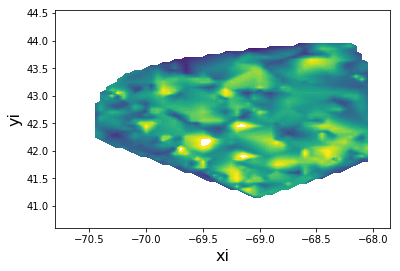

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = dfplottable['lon']
y = dfplottable['lat']
z = dfplottable['depth']

# target grid to interpolate to
xi = np.arange(-70.8,-67.8,0.05)
# xi = np.arange(67.8,70.8,0.05)
yi = np.arange(40.6,44.6,0.05)
# xi = yi = np.arange(60,100,5)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# mask out the field
# zi[mask] = np.nan

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,np.arange(0,150,3))
# plt.contourf(xi,yi,zi,np.arange(0,100,5))
# plt.plot(x,y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
plt.show()

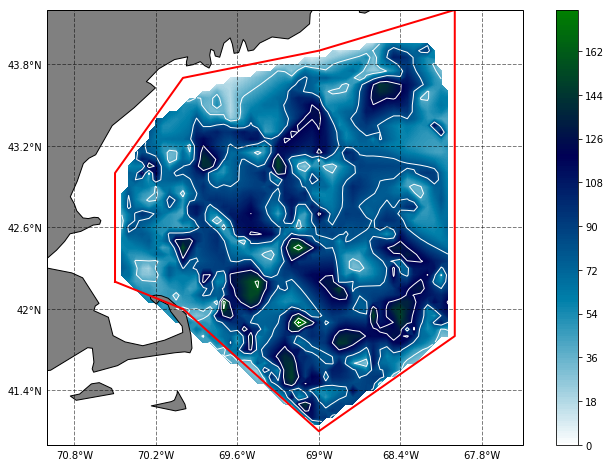

In [149]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-78, -65, 35, 44.75], ccrs.PlateCarree())
ax.set_extent([-71, -67.5, 41.0, 44.2], ccrs.PlateCarree())
feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')

ax.add_feature(feature)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.contourf(xi,yi,zi,np.arange(0,180,1))
cf = plt.contourf(xi,yi,zi,np.arange(0,180,1),cmap = 'ocean_r')
plt.contour(xi, yi, zi, levels=5, linewidths=1,colors='white')
cbar = plt.colorbar(cf, ax=ax)

plot(x_t,y_t,color='red', linewidth = 2, linestyle='-') #Western GoM
# plt.scatter(dfplottable['lon']*-1,dfplottable['lat'],c=dfplottable['depth'],cmap='RdBu')
plt.savefig('WINTER_linearinterpol_wGoM_depth_fullregion')
plt.show()

### WINTER SPATIAL

In [1]:
depth_1977 = [30.0, 75.0, 72.0, 73.0]
lat_1977 = [41.3333, 41.6167, 41.65, 41.3667]
lon_1977 = [68.7, 68.8833, 69.15, 69.1167]
depth_1979 = [50.0, 47.0, 42.0, 37.0, 125.0, 34.0, 35.0, 148.0]
lat_1979 = [42.6667, 42.9167, 43.1333, 43.3667, 43.3667, 43.6167, 43.9667, 43.9667]
lon_1979 = [68.3167, 68.3667, 68.0833, 68.1167, 68.6833, 68.9167, 68.5833, 68.1833]
depth_1980 = [50.0, 50.0, 100.0, 100.0, 130.0, 150.0, 30.0, 50.0, 100.0, 150.0, 150.0, 50.0, 50.0, 135.0, 50.0, 100.0, 30.0, 125.0, 19.0, 89.0, 83.0, 96.0, 46.0, 99.0, 49.0, 72.0, 86.0, 42.0, 143.0]
lat_1980 = [43.9667, 43.6667, 43.2833, 43.1333, 43.3667, 43.3667, 42.9167, 42.6667, 42.75, 42.5833, 42.9667, 43.3333, 43.4, 43.1333, 42.8333, 42.25, 41.9667, 41.5333, 41.9667, 42.25, 42.1833, 41.9, 41.65, 41.3333, 41.6167, 41.9833, 42.1667, 42.3167, 41.8667]
lon_1980 = [68.2, 69.3667, 69.35, 69.0167, 68.6833, 68.1333, 68.35, 68.3167, 68.7667, 69.2333, 69.2833, 69.6833, 70.2, 69.9667, 70.0, 69.7167, 69.8333, 69.4167, 69.8333, 69.7167, 69.3, 69.1667, 69.15, 69.1167, 68.8833, 68.65, 68.8, 68.45, 68.1667]
depth_1981 = [35.0, 5.0, 125.0, 10.0, 5.0, 50.0, 150.0, 182.0, 148.0, 99.0, 75.0, 75.0, 49.0, 34.0, 34.0, 15.0, 68.0, 49.0, 98.0, 82.0, 34.0, 145.0, 98.0, 49.0, 94.0, 18.0, 47.0, 70.0, 158.0, 133.0, 99.0, 98.0, 84.0, 141.0, 149.0]
lat_1981 = [42.4333, 42.8333, 43.1333, 43.3333, 43.6667, 43.2833, 43.1333, 42.9833, 42.5833, 42.75, 42.6667, 42.9167, 43.3833, 43.3667, 43.6167, 43.9667, 43.9667, 41.9833, 42.6667, 43.3, 43.9667, 43.3333, 43.1333, 42.8333, 42.25, 41.9667, 43.4, 43.6667, 43.2833, 42.9667, 42.5833, 42.1833, 41.9, 41.65, 41.3333]
lon_1981 = [70.15, 70.0, 69.9667, 69.6833, 69.3667, 69.3333, 69.0167, 69.2333, 69.2333, 68.7667, 68.3167, 68.3667, 68.1333, 68.6833, 68.9333, 68.5833, 68.1833, 68.65, 68.3167, 68.6667, 68.5833, 69.6833, 69.9667, 70.0, 69.7167, 69.8333, 70.2, 69.3667, 69.3333, 69.2833, 69.2333, 69.2, 69.1667, 69.15, 69.1167]
depth_1982 = [72.0, 48.0, 70.0, 84.0, 47.0, 50.0, 41.0, 44.0, 75.0, 53.0, 75.0, 71.0, 100.0, 99.0, 75.0, 50.0, 52.0, 96.0, 63.0, 98.0, 36.0, 85.0, 96.0, 96.0, 49.0, 72.0, 29.0, 94.0, 49.0, 34.0, 33.0, 49.0, 49.0, 73.0, 74.0, 100.0, 93.0, 97.0, 75.0, 47.0, 69.0, 35.0, 34.0, 34.0]
lat_1982 = [41.9667, 42.1833, 42.4333, 42.8333, 43.1333, 43.3333, 43.3333, 43.6667, 43.2833, 43.1333, 42.9667, 42.5833, 42.3167, 41.9, 41.65, 41.6167, 41.9833, 42.1667, 42.3167, 43.9667, 43.95, 43.6167, 43.3667, 43.3833, 42.9167, 42.75, 42.6667, 42.3167, 42.1667, 41.6167, 41.65, 41.9, 42.1833, 42.6167, 42.9667, 43.1667, 43.6667, 43.3333, 43.4, 43.1167, 42.8333, 42.4333, 42.25, 41.95]
lon_1982 = [69.8333, 69.7333, 70.15, 70.0, 69.9667, 70.15, 69.6833, 69.3667, 69.3333, 69.0167, 69.2833, 69.2333, 69.2167, 69.1667, 69.15, 68.8833, 68.65, 68.8, 68.45, 68.1833, 68.5667, 68.9333, 68.6833, 68.1333, 68.3667, 68.7667, 68.3167, 68.45, 68.8, 68.8833, 69.15, 69.1667, 69.2, 69.2833, 69.2833, 69.0667, 69.3667, 69.6833, 70.2, 69.95, 70.0, 70.15, 69.7167, 69.8333]
depth_1983 = [49.0, 228.0, 96.0, 34.0, 29.0, 141.0, 96.0, 96.0, 89.0, 96.0, 28.0, 14.0, 99.0, 75.0, 145.0, 75.0, 142.0, 74.0, 51.0, 30.0, 49.0, 37.0, 69.0, 74.0, 71.0, 11.0, 24.0, 48.0, 75.0, 142.0, 70.0, 91.0, 95.0, 64.0, 69.0]
lat_1983 = [41.8833, 42.25, 42.8333, 43.1333, 43.4, 42.9667, 42.5833, 41.9, 41.65, 41.3333, 41.1167, 41.3333, 41.8667, 41.6167, 42.3, 42.6667, 42.75, 42.8667, 43.3667, 43.1167, 43.9667, 42.4333, 41.3333, 41.8667, 43.9667, 43.9667, 43.6167, 43.3667, 43.3833, 42.75, 42.3167, 42.0833, 41.7667, 41.9, 42.1833]
lon_1983 = [69.7833, 69.7167, 70.0, 69.9667, 70.2, 69.2833, 69.2333, 69.1667, 69.15, 69.1167, 69.0167, 68.7, 68.1833, 68.8833, 68.4333, 68.3167, 68.7667, 68.5, 68.6833, 69.0, 68.1833, 70.15, 69.1167, 68.1833, 68.1833, 68.5833, 68.9333, 68.6833, 68.1333, 68.7667, 68.45, 68.5833, 68.9667, 69.1667, 69.2]
depth_1984 = [36.0, 101.0, 45.0, 31.0, 34.0, 49.0, 44.0, 44.0, 47.0, 96.0, 72.0, 209.0, 164.0, 74.0, 73.0, 72.0, 94.0, 71.0, 71.0, 24.0, 25.0, 93.0, 35.0, 74.0, 32.0, 30.0, 25.0, 48.0, 47.0, 49.0, 91.0]
lat_1984 = [41.9667, 42.25, 42.8333, 43.1333, 43.4, 43.6667, 43.3, 43.1333, 42.9667, 42.5833, 42.1833, 41.9, 41.65, 41.6167, 41.9833, 42.3167, 42.75, 43.3833, 43.3667, 43.9667, 43.9667, 41.85, 41.3333, 43.9667, 43.6167, 43.6667, 42.25, 42.8333, 43.1333, 43.4, 43.3333]
lon_1984 = [69.8333, 69.7167, 70.0, 69.9667, 70.2, 69.3667, 69.4, 69.0167, 69.2833, 69.2333, 69.2, 69.1667, 69.15, 68.8833, 68.65, 68.45, 68.7667, 68.1333, 68.6833, 68.5833, 68.1833, 68.1667, 69.1167, 68.1833, 68.9333, 69.3667, 69.7167, 70.0, 69.9667, 70.2, 69.6833]
depth_1985 = [76.0, 91.0, 79.0, 139.0, 88.0, 107.0, 97.0, 61.0, 145.0, 99.0, 19.0, 29.0, 24.0, 34.0, 148.0, 97.0, 72.0, 97.0, 48.0, 75.0, 74.0, 72.0, 67.0, 80.0, 46.0, 48.0, 93.0, 46.0, 48.0, 34.0, 102.0, 48.0, 74.0, 78.0, 74.0, 75.0]
lat_1985 = [41.9667, 42.25, 42.4167, 41.8667, 41.3333, 41.6167, 41.6333, 41.5333, 41.3333, 43.9667, 43.9667, 43.6167, 43.3667, 43.3833, 42.9167, 42.75, 42.6667, 42.3167, 42.1667, 41.9833, 41.6167, 41.65, 41.9, 42.1833, 42.5833, 42.9667, 43.1333, 43.2833, 43.6667, 43.3333, 43.4, 43.1333, 42.8333, 42.4333, 42.25, 41.9667]
lon_1985 = [69.8333, 69.7167, 70.1333, 68.1833, 68.7, 68.8833, 69.0833, 69.4333, 69.1167, 68.1833, 68.5833, 68.9333, 68.6833, 68.1333, 68.3667, 68.7667, 68.3167, 68.45, 68.8, 68.65, 68.8833, 69.15, 69.1667, 69.2, 69.2333, 69.2833, 69.0167, 69.3333, 69.3667, 69.6833, 70.2, 69.9667, 70.0, 70.15, 69.7167, 69.8333]
depth_1986 = [73.0, 100.0, 93.0, 71.0, 20.0, 93.0, 46.0, 94.0, 75.0, 92.0, 144.0, 94.0, 95.0, 98.0, 146.0, 147.0, 94.0, 47.0, 5.0, 93.0, 94.0, 135.0, 74.0, 44.0, 97.0, 34.0, 98.0, 49.0, 96.0, 96.0, 95.0, 75.0, 69.0, 86.0, 70.0, 71.0, 50.0, 46.0, 44.0]
lat_1986 = [41.8667, 43.9667, 43.3833, 43.6167, 43.6667, 43.2833, 43.1333, 42.75, 42.9167, 42.6667, 42.3167, 42.1667, 41.9833, 41.65, 41.9, 42.1833, 42.5833, 43.3333, 43.4, 43.1333, 42.8333, 42.25, 43.9667, 43.9667, 43.6167, 43.6667, 43.3333, 43.4, 43.1333, 42.8333, 42.25, 41.9667, 41.9, 42.1833, 42.1667, 42.3167, 41.9833, 41.6167, 41.65]
lon_1986 = [68.1833, 68.1833, 68.1333, 68.9333, 69.3667, 69.3333, 69.0167, 68.7667, 68.3667, 68.3167, 68.45, 68.8, 68.65, 69.15, 69.1667, 69.2, 69.2333, 69.6833, 70.2, 69.9667, 70.0, 69.7167, 68.1833, 68.5833, 68.9333, 69.3667, 69.6833, 70.2, 69.9667, 70.0, 69.7167, 69.8333, 69.1667, 69.2, 68.8, 68.45, 68.65, 68.8833, 69.15]
depth_1987 = [25.0, 142.0, 47.0]
lat_1987 = [41.5333, 41.8667, 41.8667]
lon_1987 = [69.4333, 68.1833, 68.1833]
depth_1988 = [72.0, 98.0, 72.0, 76.0, 74.0, 66.0, 74.0, 88.0, 82.0, 70.0, 71.0, 70.0, 48.0, 74.0, 61.0, 92.0, 44.0, 57.0]
lat_1988 = [42.3833, 42.6833, 42.6833, 42.5667, 42.55, 42.3667, 42.3167, 42.3, 42.05, 41.9167, 41.7167, 41.5333, 41.4167, 41.2, 41.4333, 41.5833, 41.7167, 41.9333]
lon_1988 = [70.4667, 70.3167, 70.0333, 69.85, 70.1333, 70.1833, 69.9667, 69.6833, 69.7167, 69.5, 69.4833, 69.2667, 69.0167, 69.0667, 68.5667, 68.6167, 68.3333, 68.05]
depth_1989 = [44.0, 26.0, 80.0, 50.0, 100.0, 116.0, 67.0, 68.0, 56.0, 61.0, 95.0, 122.0, 93.0, 106.0, 138.0, 93.0, 72.0, 85.0, 117.0, 68.0, 103.0, 53.0, 61.0, 89.0, 88.0, 84.0, 82.0, 65.0, 109.0, 91.0, 84.0, 83.0, 112.0, 90.0, 76.0, 76.0, 107.0, 91.0, 131.0, 66.0, 89.0]
lat_1989 = [41.9167, 42.0833, 42.3833, 42.6833, 42.6833, 42.5667, 42.55, 42.3667, 42.3167, 42.3, 42.05, 41.9167, 41.7167, 41.5333, 41.6833, 41.4167, 41.2, 41.4333, 41.5833, 41.7167, 41.9333, 41.9167, 42.6833, 42.6833, 42.5667, 42.55, 42.3833, 42.3667, 42.3167, 42.3, 42.05, 41.9167, 41.7167, 41.5333, 41.6833, 41.4167, 41.2, 41.4333, 41.5833, 41.7167, 41.9333]
lon_1989 = [69.8667, 70.0167, 70.4667, 70.3167, 70.0333, 69.85, 70.1333, 70.1833, 69.9667, 69.6833, 69.7167, 69.5, 69.4833, 69.2667, 69.0, 69.0167, 69.0667, 68.5667, 68.6167, 68.3333, 68.05, 69.8667, 70.3167, 70.0333, 69.85, 70.1333, 70.4667, 70.1833, 69.9667, 69.6833, 69.7167, 69.5, 69.4833, 69.2667, 69.0, 69.0167, 69.0667, 68.5667, 68.6167, 68.3333, 68.05]
depth_1990 = [79.0, 91.0, 82.0, 74.0, 74.0, 43.0, 61.0, 104.0, 86.0, 110.0, 60.0, 89.0, 85.0, 68.0, 11.0, 96.0, 99.0, 96.0, 124.0, 72.0, 74.0, 50.0, 91.0, 89.0, 77.0, 82.0, 67.0, 61.0, 48.0, 84.0, 65.0, 73.0]
lat_1990 = [42.3833, 42.6833, 42.6833, 42.55, 42.3667, 42.3167, 42.05, 41.7167, 41.5333, 41.4167, 41.2, 41.4333, 41.5833, 41.7167, 42.0833, 41.7167, 41.5333, 41.4167, 41.2, 42.3833, 42.55, 42.3667, 42.3167, 42.05, 41.9167, 41.7167, 41.5333, 41.4167, 41.2, 41.4333, 41.5833, 41.7167]
lon_1990 = [70.4667, 70.3167, 70.0333, 70.1333, 70.1833, 69.9667, 69.7167, 69.4833, 69.2667, 69.0167, 69.0667, 68.5667, 68.6167, 68.3333, 70.0167, 69.4833, 69.2667, 69.0167, 69.0667, 70.4667, 70.1333, 70.1833, 69.9667, 69.7167, 69.5, 69.4833, 69.2667, 69.0167, 69.0667, 68.5667, 68.6167, 68.3333]
depth_1991 = [33.0, 47.0, 66.0, 53.0, 81.0, 41.0, 64.0, 159.0, 137.0, 114.0, 97.0, 108.0, 94.0, 76.0, 11.0, 9.0, 47.0, 64.0, 95.0, 37.0, 73.0, 66.0, 146.0, 106.0, 148.0, 156.0, 136.0, 148.0, 108.0, 18.0, 67.0, 45.0, 47.0, 50.0, 142.0, 147.0, 25.0, 140.0, 140.0, 120.0, 121.0, 89.0, 77.0, 70.0, 100.0]
lat_1991 = [41.9167, 42.0833, 42.3833, 42.6833, 42.6833, 42.55, 42.3667, 42.3167, 42.05, 41.9167, 41.7167, 41.5333, 41.4167, 41.2, 41.9167, 42.0833, 42.2, 42.3833, 42.6833, 42.6833, 42.55, 42.3667, 42.3167, 42.05, 41.9167, 41.7167, 41.5333, 41.4167, 41.2, 42.5483, 42.3667, 42.3817, 42.2, 42.085, 42.2167, 42.05, 41.9183, 41.8317, 41.5333, 41.2, 41.4083, 41.4317, 41.5817, 41.7167, 41.8483]
lon_1991 = [69.8667, 70.0167, 70.4667, 70.3167, 70.0333, 70.1333, 70.1833, 69.9667, 69.7167, 69.5, 69.4833, 69.2667, 69.0167, 69.0667, 69.8667, 70.0167, 70.3667, 70.4667, 70.3167, 70.0333, 70.1333, 70.1833, 69.9667, 69.7167, 69.5, 69.4833, 69.2667, 69.0167, 69.0667, 70.135, 70.1817, 70.4617, 70.3667, 70.0183, 69.8667, 69.7167, 69.865, 69.5017, 69.2667, 69.0683, 69.0183, 68.5667, 68.615, 68.3333, 68.215]
depth_1992 = [22.0, 39.0, 26.0, 33.0, 84.0, 66.0, 108.0, 190.0, 199.0, 151.0, 140.0, 121.0, 111.0, 125.0, 51.0, 49.0, 75.0, 66.0, 89.0, 133.0, 140.0, 132.0, 153.0, 136.0, 144.0, 73.0, 52.0, 49.0, 47.0, 79.0, 85.0, 37.0, 154.0, 194.0, 111.0, 79.0, 32.0, 46.0, 41.0]
lat_1992 = [41.9167, 42.0833, 42.2, 42.3833, 42.55, 42.3667, 42.3167, 42.05, 41.9167, 41.7167, 41.5333, 41.2, 41.1833, 41.2017, 41.9, 42.0667, 42.3833, 42.3667, 42.5467, 42.3183, 42.0517, 41.9167, 41.7167, 41.5333, 41.4183, 41.1967, 41.9067, 42.08, 42.1983, 42.3833, 42.55, 42.3683, 42.215, 42.05, 41.835, 41.5333, 41.4183, 41.5767, 41.7167]
lon_1992 = [69.8667, 70.0167, 70.3667, 70.4667, 70.1333, 70.1833, 69.9667, 69.7167, 69.5, 69.485, 69.2667, 69.0667, 69.05, 69.0683, 69.85, 70.0, 70.4617, 70.1867, 70.1333, 69.9683, 69.7183, 69.5, 69.4833, 69.2683, 69.0183, 69.065, 69.865, 70.0117, 70.37, 70.4683, 70.1367, 70.185, 69.87, 69.715, 69.5, 69.2683, 69.015, 68.62, 68.3333]
depth_1993 = [17.0, 26.0, 84.0, 48.0, 38.0, 44.0, 50.0, 56.0, 74.0, 76.0, 110.0, 90.0, 126.0, 30.0, 26.0, 45.0, 38.0, 46.0, 34.0, 48.0, 16.0, 25.0, 49.0, 50.0, 17.0, 9.0, 54.0, 36.0]
lat_1993 = [41.915, 42.0833, 42.3067, 42.3667, 42.5483, 42.3833, 42.195, 42.0533, 41.9167, 41.7167, 41.535, 41.42, 41.2, 41.9167, 42.08, 42.1967, 42.3867, 42.55, 42.3633, 42.2167, 42.0517, 41.8333, 41.535, 41.4133, 41.435, 41.5833, 41.7117, 41.8483]
lon_1993 = [69.8667, 70.0167, 69.9633, 70.1767, 70.1367, 70.4667, 70.3683, 69.7133, 69.5, 69.4833, 69.2683, 69.02, 69.0667, 69.8667, 70.015, 70.3617, 70.475, 70.14, 70.1767, 69.8683, 69.7183, 69.5, 69.28, 69.0117, 68.565, 68.6183, 68.325, 68.215]
depth_1994 = [30.0, 24.0, 35.0, 53.0, 73.0, 37.0, 71.0, 62.0, 138.0, 70.0, 117.0, 82.0]
lat_1994 = [41.9117, 42.08, 42.385, 42.5533, 42.3183, 42.055, 41.92, 41.72, 41.5333, 41.415, 41.1967, 42.9833]
lon_1994 = [69.8717, 70.015, 70.4667, 70.1367, 69.9617, 69.7183, 69.5017, 69.4783, 69.27, 69.025, 69.0617, 70.0167]
depth_1995 = [95.0, 23.0, 62.0, 140.0, 156.0, 165.0, 152.0, 58.0, 88.0, 161.0, 167.0, 63.0, 136.0, 149.0]
lat_1995 = [43.2783, 42.965, 42.5767, 42.18, 41.9017, 41.6533, 41.3283, 41.7683, 41.8483, 41.7683, 41.945, 41.4333, 41.837, 41.8483]
lon_1995 = [69.3383, 69.2867, 69.2317, 69.2033, 69.17, 69.15, 69.1167, 69.1683, 69.0967, 68.8317, 68.6133, 69.1483, 68.332, 68.3]
depth_1996 = [127.0, 145.0, 123.0, 146.0, 133.0, 35.0, 6.0, 92.0, 22.0, 25.0]
lat_1996 = [41.853, 41.492, 41.85, 41.49, 41.842, 41.492, 41.8483, 41.4467, 41.4917, 41.4917]
lon_1996 = [68.325, 68.97, 68.3, 68.9517, 68.312, 68.942, 68.3, 68.5967, 68.9517, 68.9417]
depth_1997 = [103.0, 115.0, 88.9, 93.0, 75.0, 100.0, 104.0, 101.0, 83.0, 88.0, 70.0, 75.0, 94.0, 6.0, 71.0, 76.0, 87.0, 102.0, 103.0, 64.3, 95.9, 97.0, 112.0, 114.0, 85.0, 65.0, 64.0, 78.0, 90.0, 91.0]
lat_1997 = [41.837, 41.85, 41.488, 41.4917, 41.825, 41.8233, 41.525, 42.63, 42.9267, 43.43, 43.7667, 43.5783, 43.5767, 43.6267, 43.2367, 42.9233, 42.9233, 42.525, 41.847, 41.605, 41.49, 41.8383, 41.8467, 41.8283, 41.7183, 41.595, 41.5983, 41.3917, 41.4883, 41.48]
lon_1997 = [68.308, 68.3, 68.955, 68.9517, 69.675, 69.6767, 68.6233, 68.5267, 68.1283, 68.325, 68.7167, 69.23, 69.225, 69.8267, 69.96, 69.4267, 69.4317, 69.725, 68.298, 68.447, 68.945, 68.1533, 68.2983, 68.2833, 68.3783, 68.4517, 68.45, 68.775, 68.9517, 68.96]
depth_1998 = [86.0, 57.0, 95.5, 79.0, 44.0, 105.0, 105.0, 27.0, 49.0, 27.0, 23.0, 41.0, 23.0, 88.0, 133.0, 65.0, 154.0, 76.0, 62.0, 31.7, 38.5, 26.0, 34.0, 102.0, 79.0]
lat_1998 = [41.837, 41.602, 41.477, 41.8533, 41.6067, 41.4117, 41.4867, 42.8633, 43.52, 42.2533, 42.2533, 42.4933, 42.3167, 42.14, 41.8367, 41.325, 41.5767, 41.9533, 42.2417, 41.833, 41.848, 41.8383, 41.8483, 41.7317, 41.4117]
lon_1998 = [68.303, 68.443, 68.932, 68.3, 68.45, 68.76, 68.9417, 70.0367, 68.96, 68.0867, 68.0833, 68.8467, 68.7383, 68.6867, 68.4883, 68.9583, 69.22, 69.2833, 69.385, 68.013, 68.332, 68.1483, 68.2967, 68.3767, 68.7733]
depth_1999 = [95.0, 78.0, 122.0, 74.0, 95.0, 117.0, 97.0, 66.0, 42.0, 120.0, 90.0, 35.0, 92.0, 73.0, 37.0, 42.0, 109.0, 127.0, 111.0, 159.0, 43.0, 128.0, 112.0, 18.0, 33.0, 122.0, 108.0, 101.0, 88.0, 58.0, 75.0, 85.0, 73.0, 93.0]
lat_1999 = [41.825, 41.875, 41.7933, 42.4817, 42.6183, 41.462, 43.7833, 43.6117, 43.76, 43.2383, 43.1283, 42.85, 43.0133, 42.0783, 42.34, 42.3683, 41.8617, 41.7367, 41.4583, 42.465, 42.4583, 42.5367, 42.6217, 42.6233, 42.71, 42.715, 42.795, 41.853, 41.512, 41.84, 41.8483, 41.725, 41.3983, 41.5067]
lon_1999 = [69.2517, 68.93, 68.405, 68.8917, 68.3917, 68.968, 68.3667, 69.0067, 69.2717, 69.885, 70.3433, 70.1667, 69.2167, 69.82, 70.23, 70.3833, 68.295, 68.415, 68.9683, 70.0, 70.1683, 69.4917, 69.4983, 70.4667, 70.465, 69.49, 69.4983, 68.303, 68.977, 68.16, 68.2967, 68.3767, 68.7767, 68.965]
depth_2002 = [40.0, 55.0, 99.0, 87.0, 70.0, 136.0, 102.0, 52.0, 60.0, 32.0]
lat_2002 = [42.6783, 43.5233, 42.9833, 43.1467, 43.2167, 42.1367, 42.7417, 42.41, 42.41, 42.1983]
lon_2002 = [70.3183, 69.9217, 69.4133, 69.0517, 68.6083, 68.2633, 68.2917, 69.5083, 69.5117, 69.905]
depth_2003 = [166.0, 74.0, 19.0, 99.0, 54.0, 78.0, 27.0, 52.0, 127.0, 16.0, 22.0, 50.0, 29.0, 27.0, 25.0, 29.0, 14.0, 25.0, 95.0, 150.0, 142.0]
lat_2003 = [42.1983, 42.4967, 42.615, 42.665, 43.07, 43.0583, 43.1533, 43.2583, 43.5, 43.7417, 43.7933, 43.1817, 42.8167, 42.1233, 42.1233, 42.3083, 41.925, 41.5483, 41.255, 41.46, 41.7917]
lon_2003 = [69.4417, 68.8283, 69.1467, 69.8833, 70.355, 69.97, 69.4283, 68.7867, 69.015, 68.63, 68.0967, 68.3333, 68.2433, 68.0617, 68.0567, 68.3833, 68.1683, 68.3617, 68.8883, 69.1733, 68.835]
depth_2004 = [109.0, 161.0, 156.0, 78.0, 105.0, 68.0]
lat_2004 = [42.13, 42.5017, 42.5017, 42.1717, 42.4933, 42.4333]
lon_2004 = [69.6633, 69.6683, 69.6667, 68.855, 68.5917, 68.015]
depth_2005 = [174.0, 159.0, 245.0, 200.0, 136.0, 124.0, 195.0, 201.0, 137.0, 92.0, 86.0, 150.0, 111.0, 45.0, 116.0, 123.0, 113.0, 89.0, 89.0]
lat_2005 = [41.8533, 42.065, 42.4967, 42.4967, 43.0167, 43.27, 42.4817, 42.4833, 42.6867, 43.02, 43.0183, 43.6467, 43.8567, 43.185, 42.065, 41.8133, 41.605, 41.2317, 41.2317]
lon_2005 = [69.5117, 69.4783, 69.6683, 69.6667, 70.285, 69.445, 69.1433, 69.1567, 68.9817, 68.6483, 68.6483, 68.5433, 68.4433, 68.0433, 68.1767, 68.6467, 68.88, 68.8467, 68.8617]
depth_2006 = [44.0, 73.0, 74.0, 39.0, 85.0, 90.0, 17.0, 19.0, 28.0, 17.0, 9.0, 6.0, 73.0, 29.0, 98.0, 97.0, 100.0, 86.0, 81.0, 81.0, 89.0, 49.0]
lat_2006 = [42.9033, 42.7317, 42.515, 42.705, 42.6667, 42.6667, 42.6467, 42.6417, 42.845, 43.4783, 43.8383, 43.8333, 43.9817, 43.5617, 42.1033, 42.11, 42.2667, 42.1883, 42.185, 42.235, 41.4783, 41.6467]
lon_2006 = [68.2167, 68.68, 69.135, 69.3, 69.3817, 69.3833, 69.7467, 69.75, 70.005, 69.78, 69.0933, 69.0917, 68.555, 68.2367, 68.0867, 68.0733, 68.3083, 68.4983, 68.5067, 68.7617, 69.1, 69.48]
depth_2007 = [77.0, 69.0, 102.0, 124.0, 120.0, 91.0, 87.0, 90.0, 59.0, 73.0, 101.0, 102.0, 86.0, 117.0, 57.0, 31.0, 30.0, 118.0, 70.0, 79.0, 82.0, 90.0]
lat_2007 = [41.87, 42.0083, 42.0583, 42.4967, 42.4967, 42.6117, 42.61, 42.5967, 42.89, 43.17, 42.95, 42.95, 43.0533, 43.9317, 43.9783, 43.64, 43.645, 43.16, 42.4867, 42.4867, 42.4883, 41.9433]
lon_2007 = [69.34, 69.3833, 69.645, 69.6667, 69.665, 69.7817, 69.7817, 70.4133, 70.13, 69.6433, 69.0683, 69.0667, 68.3733, 68.19, 68.47, 68.8033, 68.815, 68.9633, 68.8217, 68.8217, 68.82, 68.8267]
depth_2008 = [109.0, 107.0, 85.0, 94.0, 139.0, 103.0, 84.0, 20.0, 30.0, 69.0, 18.0, 73.0, 41.0, 101.0, 114.0, 106.0, 113.0, 67.0, 73.0, 92.0, 59.0, 114.0, 88.0, 55.0, 58.0, 48.0, 67.0, 49.0, 72.0, 33.0, 11.0, 119.0, 88.0, 153.0, 60.0, 63.0, 18.0, 67.0, 116.0, 72.0, 89.0, 111.0, 101.0, 22.0, 18.0, 18.0, 10.0, 113.0, 91.0, 102.0, 46.0, 126.0, 31.0, 26.0, 53.0]
lat_2008 = [41.3517, 41.5217, 41.4783, 42.3533, 42.44, 42.6033, 42.7733, 43.35, 43.3467, 43.6833, 43.3983, 43.0233, 43.0233, 42.94, 42.6767, 42.5033, 42.5033, 42.1883, 42.19, 42.1733, 42.9133, 43.16, 43.2583, 43.3483, 43.5317, 43.44, 43.3483, 43.2583, 43.165, 43.0517, 43.05, 43.0483, 42.8817, 42.8817, 42.8817, 42.725, 42.715, 42.715, 42.545, 42.55, 42.55, 42.5467, 42.6317, 42.88, 42.9417, 43.0517, 43.0483, 43.14, 43.0467, 42.97, 42.885, 42.8817, 42.9433, 42.88, 42.8717]
lon_2008 = [69.0433, 68.8817, 68.7133, 68.0483, 68.4183, 68.4817, 68.48, 68.0833, 68.0733, 68.8467, 69.6383, 70.4383, 69.7067, 69.2867, 69.1883, 69.665, 69.6717, 69.6767, 69.68, 69.81, 69.1533, 68.7867, 68.59, 68.3983, 68.02, 68.2067, 68.3967, 68.5917, 68.785, 68.8983, 69.1283, 69.355, 69.3533, 69.13, 68.9017, 68.9083, 69.125, 69.3517, 69.3517, 69.1233, 68.9017, 69.5317, 69.4217, 69.0567, 69.0767, 68.905, 69.1267, 69.305, 69.3483, 69.2117, 69.35, 69.1267, 69.08, 69.06, 69.0433]
depth_2009 = [100.0, 114.0, 114.0, 124.0, 103.0, 115.0, 44.0, 68.0, 91.0, 98.0, 101.0, 39.0, 124.0, 46.0, 62.0, 60.0, 53.0, 101.0, 128.0, 136.0, 99.0, 82.0, 103.0, 91.0, 27.0, 23.0]
lat_2009 = [42.1033, 42.1, 42.1033, 42.1033, 42.1067, 42.3133, 42.7717, 42.6883, 42.6883, 42.7683, 42.8967, 43.765, 43.2283, 43.52, 43.52, 43.0217, 42.8583, 42.5283, 42.5233, 42.5233, 42.5017, 42.5017, 41.8967, 41.8783, 41.7717, 41.7717]
lon_2009 = [68.0433, 68.04, 68.245, 68.3667, 68.39, 68.1467, 68.215, 68.635, 68.655, 69.0683, 68.7533, 68.44, 69.2817, 69.78, 69.7783, 70.1117, 70.3183, 69.6, 69.5917, 69.5917, 69.6633, 69.66, 69.6133, 69.615, 69.6083, 69.6067]
depth_2010 = [138.0, 138.0, 40.0, 47.0, 159.0, 139.0, 101.0, 118.0, 27.0, 25.0, 37.0, 40.0, 45.0, 33.0, 49.0, 42.0, 105.0, 101.0, 19.0, 24.0, 42.0, 84.0, 55.0, 50.0, 60.0, 82.0, 71.0, 72.0, 26.0, 46.0, 51.0, 112.0, 114.0, 91.0, 115.0, 124.0, 111.0, 61.0, 49.0, 57.0, 54.0, 79.0, 90.0, 86.0, 85.0, 21.0, 101.0, 95.0, 32.0, 34.0, 35.0, 158.0, 89.0, 87.0, 70.0, 60.0, 53.0, 60.0, 60.0, 60.0, 61.0, 61.0, 77.0, 65.0]
lat_2010 = [41.4783, 42.1583, 42.505, 42.1733, 41.6, 41.4817, 41.915, 41.9167, 42.4167, 42.42, 42.4967, 42.6067, 42.61, 42.615, 42.69, 42.6967, 42.8233, 42.8233, 43.1067, 43.2283, 43.065, 42.945, 42.8617, 42.775, 42.4317, 42.5117, 42.4383, 42.4367, 42.365, 42.365, 42.1783, 42.6467, 42.7883, 42.8633, 42.8983, 42.7117, 42.6667, 42.2017, 42.1633, 42.3483, 42.6133, 41.4983, 41.495, 42.1183, 42.1067, 42.5083, 42.5117, 42.515, 42.7733, 42.7733, 43.0267, 43.0317, 42.7767, 42.7667, 42.6083, 42.6, 42.5267, 42.52, 42.4517, 42.445, 42.2067, 42.2017, 42.2533, 42.25]
lon_2010 = [69.0967, 68.87, 69.6533, 70.1033, 69.2167, 69.0883, 68.4283, 68.4317, 69.34, 69.345, 69.665, 70.0, 69.9983, 69.995, 70.0867, 70.0833, 70.08, 70.08, 70.085, 69.9517, 70.38, 70.335, 70.335, 70.335, 70.445, 70.265, 70.2117, 70.2133, 70.0817, 70.0833, 70.1, 69.6017, 69.2133, 69.1667, 69.3617, 69.9467, 70.0167, 70.4517, 70.1267, 70.1333, 70.2083, 68.615, 68.6017, 69.7583, 69.76, 69.5383, 69.525, 69.505, 70.255, 70.2483, 70.2583, 70.24, 70.4083, 70.4167, 70.4067, 70.4183, 70.4567, 70.45, 70.3267, 70.33, 70.41, 70.415, 70.1183, 70.1267]
depth_2011 = [73.0, 66.0, 62.0, 48.0, 73.0, 103.0, 86.0, 53.0, 63.0, 34.0, 39.0, 51.0, 72.0, 95.0, 85.0, 62.0, 82.0, 64.0, 64.0, 94.0, 98.0, 98.0, 79.0, 75.0, 41.0, 51.0, 60.0, 76.0, 53.0, 60.0, 86.0, 88.0, 80.0, 79.0, 84.0, 83.0, 70.0, 60.0, 96.0, 90.0, 24.0, 85.0, 86.0, 79.0, 74.0, 77.0, 90.0, 38.0, 92.0, 105.0, 78.0, 73.0, 62.0, 76.0]
lat_2011 = [42.6033, 42.5, 42.4917, 42.0667, 42.06, 41.9167, 41.7717, 41.6883, 41.5683, 41.355, 42.5617, 43.36, 43.8883, 43.8517, 43.7267, 43.44, 43.2717, 43.2467, 43.2467, 42.9817, 42.9867, 42.98, 42.94, 42.9333, 42.69, 42.6883, 42.8717, 42.8667, 42.7767, 42.7733, 42.6933, 42.6883, 42.6133, 42.6083, 42.2833, 42.2783, 42.285, 42.275, 41.415, 41.405, 41.5867, 43.0267, 43.0033, 43.0267, 43.1083, 43.1033, 43.0817, 42.6817, 42.6933, 42.695, 42.6967, 42.3617, 42.3783, 42.3617]
lon_2011 = [70.31, 69.6667, 69.675, 69.2167, 68.7133, 68.55, 68.2833, 68.3433, 68.4467, 68.9717, 68.475, 68.215, 68.2817, 68.3467, 69.1083, 69.5083, 69.3467, 70.2033, 70.2017, 69.8783, 69.895, 69.895, 69.65, 69.6367, 69.9817, 69.9783, 70.09, 70.0817, 70.165, 70.165, 70.3317, 70.33, 70.335, 70.3333, 70.0833, 70.0883, 70.0, 70.0067, 69.2967, 69.29, 69.5333, 70.0833, 70.0833, 70.1667, 70.1667, 70.17, 70.3717, 70.4467, 70.255, 70.2783, 70.0867, 70.4183, 70.42, 70.4983]
depth_2012 = [15.0, 47.0, 60.0, 20.0, 46.0, 91.0, 84.0, 98.0, 92.0, 74.0, 96.0, 101.0, 71.0, 82.0, 108.0, 95.0, 58.0, 64.0, 44.0, 93.0, 92.0, 67.0, 67.0, 85.0, 76.0, 79.0, 78.0]
lat_2012 = [43.855, 43.6633, 42.4917, 42.3183, 42.3567, 42.6267, 42.93, 42.8133, 42.8017, 43.2, 43.1067, 42.9633, 42.5183, 42.325, 41.84, 41.64, 42.4933, 42.205, 42.4567, 41.4967, 41.495, 41.67, 41.6767, 42.1033, 42.1033, 42.2767, 42.275]
lon_2012 = [69.1067, 68.115, 69.6567, 70.2817, 70.465, 68.975, 69.1133, 69.8133, 69.8217, 68.83, 68.95, 68.1417, 68.6083, 68.49, 69.095, 69.1367, 69.6483, 69.9667, 70.0933, 68.535, 68.535, 69.615, 69.6183, 69.8367, 69.8333, 70.4183, 70.415]
depth_2013 = [156.0, 156.0, 170.0, 70.0, 71.0, 116.0, 24.0, 9.0, 143.0, 152.0, 46.0, 54.0]
lat_2013 = [42.5083, 43.03, 43.0917, 43.2033, 43.5333, 43.6433, 43.75, 43.6933, 42.505, 42.0033, 41.9017, 41.6667]
lon_2013 = [69.6633, 69.8317, 69.2883, 68.7483, 68.0617, 68.345, 69.1917, 69.6867, 69.6717, 68.4183, 68.185, 68.495]
depth_2017 = [96.0, 128.0, 155.0, 33.0, 157.0, 166.0, 128.0, 125.0, 34.0, 38.0, 9.0, 36.0, 70.0]
lat_2017 = [41.166666666666664, 41.413333333333334, 42.0, 41.75666666666666, 41.91499999999999, 42.16166666666666, 42.25333333333333, 42.24666666666667, 42.51166666666666, 42.505, 42.31499999999999, 42.33833333333334, 42.35666666666666]
lon_2017 = [69.0, 68.75166666666668, 68.00500000000001, 68.09166666666667, 68.40833333333333, 68.83166666666666, 69.66499999999999, 69.65833333333333, 69.65333333333334, 69.655, 70.27833333333334, 70.32833333333333, 70.46499999999999]

In [2]:
depth1977to1987 = depth_1977 + depth_1979 + depth_1980 + depth_1981 + depth_1982 + depth_1983 + depth_1984 + depth_1985 + depth_1986 + depth_1987

In [3]:
depth1988to1998 = depth_1988 + depth_1989 + depth_1990 + depth_1991 + depth_1992 + depth_1993 + depth_1994 + depth_1995 + depth_1996 + depth_1997 + depth_1998 

In [4]:
depth1999to2009 = depth_1999 + depth_2002 + depth_2003 + depth_2004 + depth_2005 + depth_2006 + depth_2007 + depth_2008 + depth_2009

In [5]:
depth2010to2019 = depth_2010 + depth_2011 + depth_2012 + depth_2013 + depth_2017

In [6]:
lat1977to1987 = lat_1977 + lat_1979 + lat_1980 + lat_1981 + lat_1982 + lat_1983 + lat_1984 + lat_1985 + lat_1986 + lat_1987

In [7]:
lat1988to1998 = lat_1988 + lat_1989 + lat_1990 + lat_1991 + lat_1992 + lat_1993 + lat_1994 + lat_1995 + lat_1996 + lat_1997 + lat_1998

In [8]:
lat1999to2009 = lat_1999 + lat_2002 + lat_2003 + lat_2004 + lat_2005 + lat_2006 + lat_2007 + lat_2008 + lat_2009

In [9]:
lat2010to2019 = lat_2010 + lat_2011 + lat_2012 + lat_2013 + lat_2017

In [10]:
lon1977to1987 = lon_1977 + lon_1979 + lon_1980 + lon_1981 + lon_1982 + lon_1983 + lon_1984 + lon_1985 + lon_1986 + lon_1987

In [11]:
lon1988to1998 = lon_1988 + lon_1989 + lon_1990 + lon_1991 + lon_1992 + lon_1993 + lon_1994 + lon_1995 + lon_1996 + lon_1997 + lon_1998

In [12]:
lon1999to2009 = lon_1999 + lon_2002 + lon_2003 + lon_2004 + lon_2005 + lon_2006 + lon_2007 + lon_2008 + lon_2009

In [13]:
lon2010to2019 = lon_2010 + lon_2011 + lon_2012 + lon_2013 + lon_2017

In [14]:
depth = depth1977to1987 + depth1988to1998 + depth1999to2009 + depth2010to2019

In [15]:
lat = lat1977to1987 + lat1988to1998 + lat1999to2009 + lat2010to2019

In [16]:
lon = lon1977to1987 + lon1988to1998 + lon1999to2009 + lon2010to2019

In [19]:
dfplottable = pd.DataFrame(list(zip(depth,lon,lat)),columns = ['depth','lon','lat'])

In [143]:
# print(dfplottable)

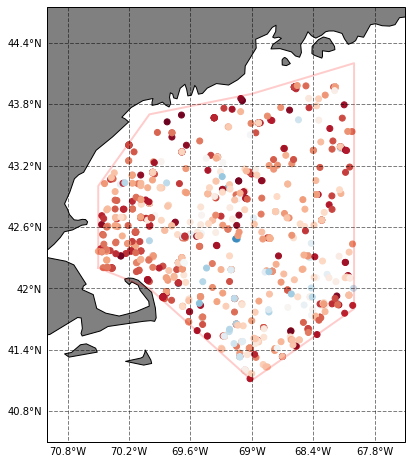

In [486]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-78, -65, 35, 44.75], ccrs.PlateCarree())
ax.set_extent([-71, -67.5, 40.5, 44.75], ccrs.PlateCarree())
feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')
ax.add_feature(feature)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plot(x_t,y_t,color='red', linewidth = 2, linestyle='-',alpha=0.2) #Western GoM
plt.scatter(dfplottable['lon']*-1,dfplottable['lat'],c=dfplottable['depth'],cmap='RdBu')
plt.show()

In [44]:
newdfplottable = dfplottable.round(3)

In [64]:
dflatlonnormal = pd.DataFrame(list(zip(lonlarge,latlarge)),columns = ['lon','lat'])

In [145]:
# print(dflatlonnormal)

In [144]:
# print(newdfplottable)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = dfplottable['lon']*-1
y = dfplottable['lat']
z = dfplottable['depth']

# target grid to interpolate to
xi = yi = np.arange(0,1000,0.01)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# mask out the field
# zi[mask] = np.nan

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,np.arange(0,1.01,0.01))
plt.plot(x,y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
# plt.savefig('interpolated.png',dpi=100)
plt.close(fig)

In [56]:
lon[:] = [x *-1 for x in lon]

In [57]:
dfplottable = pd.DataFrame(list(zip(lon,lat,depth)),columns = ['lon','lat','depth'])

In [58]:
dfplottable.values

array([[-68.7       ,  41.3333    ,  30.        ],
       [-68.8833    ,  41.6167    ,  75.        ],
       [-69.15      ,  41.65      ,  72.        ],
       ...,
       [-70.27833333,  42.315     ,   9.        ],
       [-70.32833333,  42.33833333,  36.        ],
       [-70.465     ,  42.35666667,  70.        ]])

In [148]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = dfplottable['lon']
y = dfplottable['lat']
z = dfplottable['depth']

# target grid to interpolate to
xi = np.arange(-70.8,-67.8,0.05)
# xi = np.arange(67.8,70.8,0.05)
yi = np.arange(40.6,44.6,0.05)
# xi = yi = np.arange(60,100,5)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# mask out the field
zi[mask] = np.nan

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,np.arange(0,150,3))
# plt.contourf(xi,yi,zi,np.arange(0,100,5))
# plt.plot(x,y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
plt.show()

NameError: name 'mask' is not defined

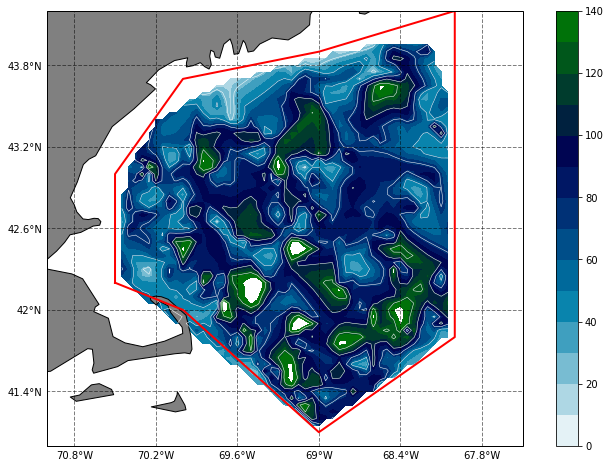

In [149]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-78, -65, 35, 44.75], ccrs.PlateCarree())
ax.set_extent([-71, -67.5, 41.0, 44.2], ccrs.PlateCarree())
feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')
ax.add_feature(feature)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.contourf(xi,yi,zi,np.arange(0,150,10))
cf = plt.contourf(xi,yi,zi,np.arange(0,150,10),cmap = 'ocean_r')
plt.contour(xi, yi, zi, levels=8, linewidths=0.5, colors='white')
cbar = plt.colorbar(cf, ax=ax)

plot(x_t,y_t,color='red', linewidth = 2, linestyle='-') #Western GoM
plt.scatter(dfplottable['lon']*-1,dfplottable['lat'],c=dfplottable['depth'],cmap='RdBu')
# plt.savefig('WINTER_linearinterpol_wGoM_depth_fullregion')
plt.show()

In [75]:
finaldepth = []; finallat = [];finallon = []
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []; counterii = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lon = npfile[i]['lon']
        lat = npfile[i]['lat']
        floordepth = npfile[i]['depth']
        gear = npfile[i]['gear']
         
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
            if gear == 'Bottle':
                pass
            else:
#         if yd > 243 and yd <= 334:
                lat_intermediate.append(npfile[i]['lat'])
                lon_intermediate.append(npfile[i]['lon'])
                p_intermediate.append(npfile[i]['p'])
                t_intermediate.append(npfile[i]['t'])
                yd_intermediate.append(npfile[i]['yd'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    
#     print(newdf)
    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
#             print(ii)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
#             print(surfacevalmean)
#             print(ii)
#             print(lat,lon)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
#             pnew = []; allmixedcount = []
#             inconclusivecount = []
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
#                         print(i,ii,iii,ix)
#                         print(newdf.iloc[ii])
                        counterii.append(ii)
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    elif dffin.at[ix,'pressure'] == 0:
                        pass
                    else:
#                         pnew.append(dffin.at[ix,'pressure'])
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
#                         print(i,ii,iii,ix)
#                         print(newdf.iloc[ii])
                        counterii.append(ii)
                    break  
#     if len(seasonyeartemp) > 0:
#         print(counterii)
    inlat = []; inlon = []
    for timer in counterii:
#         print(newdf['lat'][timer])
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
    dfplots = pd.DataFrame(list(zip(seasonyeardepth, inlat,inlon)),columns = ['depth','lat','lon'])
    print('stddepth_',year,'=', seasonyeardepth)

#     finaldepth.append(seasonyeardepth)
#     finallat.append(inlat)
#     finallon.append(inlon)
#     print('lat_',year,'=', inlat)
#     print('lon_',year,'=', inlon)
#     print(dfplots)
#         print('depth_',year,np.mean(seasonyeardepth))

stddepth_ 1977 = []
stddepth_ 1978 = []
stddepth_ 1979 = []
stddepth_ 1980 = []
stddepth_ 1981 = []
stddepth_ 1982 = []
stddepth_ 1983 = []
stddepth_ 1984 = []
stddepth_ 1985 = []
stddepth_ 1986 = []
stddepth_ 1987 = [47.0]
stddepth_ 1988 = [72.0, 98.0, 72.0, 76.0, 74.0, 66.0, 74.0, 88.0, 82.0, 70.0, 71.0, 70.0, 48.0, 74.0, 61.0, 92.0, 44.0, 57.0]
stddepth_ 1989 = [44.0, 26.0, 80.0, 50.0, 100.0, 116.0, 67.0, 68.0, 56.0, 61.0, 95.0, 122.0, 93.0, 106.0, 138.0, 93.0, 72.0, 85.0, 117.0, 68.0, 103.0, 53.0, 61.0, 89.0, 88.0, 84.0, 82.0, 65.0, 109.0, 91.0, 84.0, 83.0, 112.0, 90.0, 76.0, 76.0, 107.0, 91.0, 131.0, 66.0, 89.0]
stddepth_ 1990 = [79.0, 91.0, 82.0, 74.0, 74.0, 43.0, 61.0, 104.0, 86.0, 110.0, 60.0, 89.0, 85.0, 68.0, 11.0, 96.0, 99.0, 96.0, 124.0, 72.0, 74.0, 50.0, 91.0, 89.0, 77.0, 82.0, 67.0, 61.0, 48.0, 84.0, 65.0, 73.0]
stddepth_ 1991 = [33.0, 47.0, 66.0, 53.0, 81.0, 41.0, 64.0, 159.0, 137.0, 114.0, 97.0, 108.0, 94.0, 76.0, 11.0, 9.0, 47.0, 64.0, 95.0, 37.0, 73.0, 66.0, 146.0, 10

In [38]:
# stddepth_1977 = nan
# stddepth_1978 = nan
# stddepth_1979 = nan
# stddepth_1980 = nan
# stddepth_1981 = nan
# stddepth_1982 = nan
# stddepth_1983 = nan
# stddepth_1984 = nan
# stddepth_1985 = nan
# stddepth_1986 = nan
stddepth_1987 = 0.0
stddepth_1988 = 13.350567565500263
stddepth_1989 = 23.613711621885503
stddepth_1990 = 21.24041603729786
stddepth_1991 = 42.8907656469056
stddepth_1992 = 49.65356643879717
stddepth_1993 = 27.647286466841404
stddepth_1994 = 33.13859783796935
stddepth_1995 = 47.014598253942275
stddepth_1996 = 54.028140815689746
stddepth_1997 = 20.780762738648455
stddepth_1998 = 35.52800045034902
stddepth_1999 = 32.72745797018631
# stddepth_2000 = nan
# stddepth_2001 = nan
stddepth_2002 = 30.64979608415038
stddepth_2003 = 47.59480335207247
stddepth_2004 = 35.31485365804153
stddepth_2005 = 48.58792754996974
stddepth_2006 = 31.98798844814531
stddepth_2007 = 25.143924557410692
stddepth_2008 = 36.110985943132654
stddepth_2009 = 32.13442549315528
stddepth_2010 = 34.71847926874642
stddepth_2011 = 18.261221816248284
stddepth_2012 = 23.153806715788633
stddepth_2013 = 55.31745505112589
# stddepth_2014 = nan
# stddepth_2015 = nan
# stddepth_2016 = nan
stddepth_2017 = 53.78237981623931
# stddepth_2018 = nan
# stddepth_2019 = nan

In [39]:
# depth_1977 = nan
# depth_1978 = nan
# depth_1979 = nan
# depth_1980 = nan
# depth_1981 = nan
# depth_1982 = nan
# depth_1983 = nan
# depth_1984 = nan
# depth_1985 = nan
# depth_1986 = nan
depth_1987 = 47.0
depth_1988 = 71.61111111111111
depth_1989 = 85.04878048780488
depth_1990 = 77.03125
depth_1991 = 87.06666666666666
depth_1992 = 93.8974358974359
depth_1993 = 48.642857142857146
depth_1994 = 66.0
depth_1995 = 115.35714285714286
depth_1996 = 85.4
depth_1997 = 86.37000000000002
depth_1998 = 66.028
depth_1999 = 85.82352941176471
# depth_2000 = nan
# depth_2001 = nan
depth_2002 = 73.3
depth_2003 = 62.857142857142854
depth_2004 = 112.83333333333333
depth_005 = 136.05263157894737
depth_2006 = 58.36363636363637
depth_2007 = 84.31818181818181
depth_2008 = 72.81818181818181
depth_2009 = 86.38461538461539
depth_2010 = 71.453125
depth_2011 = 72.5
depth_2012 = 73.44444444444444
depth_2013 = 97.25
# depth_2014 = nan
# depth_2015 = nan
# depth_2016 = nan
depth_2017 = 90.38461538461539
# depth_2018 = nan
# depth_2019 = nan

best fit line:
y = -776.91 + 0.43x


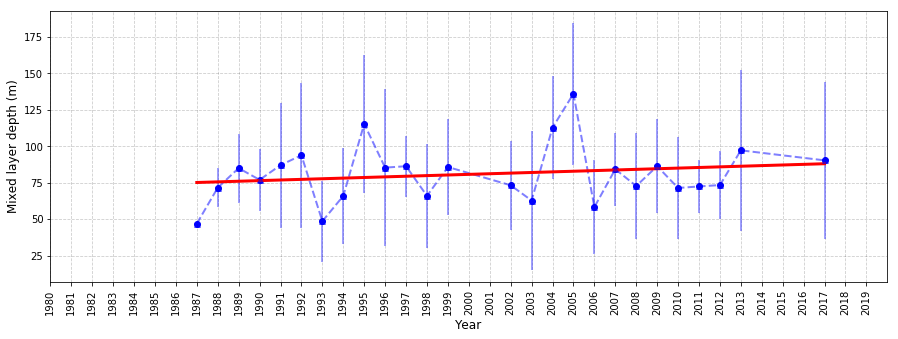

In [76]:
from matplotlib.offsetbox import AnchoredText

x = [1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2002, 2003, 2004, 2005,
    2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]
# y = [depth_1987, depth_1988, depth_1989, depth_1990, depth_1991, depth_1992, depth_1993,
#     depth_1994, depth_1995, depth_1996, depth_1997, depth_1998, depth_1999, depth_2002,
#     depth_2003, depth_2004, depth_2005, depth_2006, depth_2007, depth_2008, depth_2009,
#     depth_2010, depth_2011, depth_2012, depth_2013, depth_2017]
values = [47.0, 71.61111111111111, 85.04878048780488,77.03125,87.06666666666666,
          93.8974358974359,48.642857142857146,66.0,
          115.35714285714286,85.4,86.37000000000002,
          66.028,85.82352941176471,73.3,62.857142857142854,
          112.83333333333333,136.05263157894737,58.36363636363637,
          84.31818181818181,72.81818181818181,86.38461538461539,
          71.453125,72.5,73.44444444444444,97.25,90.38461538461539]
e = [0.0, 13.350567565500263, 23.613711621885503, 21.24041603729786, 42.8907656469056, 49.65356643879717, 
    27.647286466841404, 33.13859783796935, 47.014598253942275, 54.028140815689746, 20.780762738648455, 35.52800045034902,
    32.72745797018631, 30.64979608415038, 47.59480335207247, 35.31485365804153, 48.58792754996974, 31.98798844814531,
    25.143924557410692, 36.110985943132654, 32.13442549315528, 34.71847926874642, 18.261221816248284, 23.153806715788633,
    55.31745505112589, 53.78237981623931]

# e = [stddepth_1987, stddepth_1988, stddepth_1989, stddepth_1990, stddepth_1991, stddepth_1992, stddepth_1993,
#     stddepth_1994, stddepth_1995, stddepth_1996, stddepth_1997, stddepth_1998, stddepth_1999, stddepth_2002,
#     stddepth_2003, stddepth_2004, stddepth_2005, stddepth_2006, stddepth_2007, stddepth_2008, stddepth_2009,
#     stddepth_2010, stddepth_2011, stddepth_2012, stddepth_2013, stddepth_2017]

plt.figure(figsize=(15, 5))
plt.xlim((1980,2020))
plt.scatter(x, values, marker='o', c='blue')
plt.plot(x,values,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, values)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, values, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# # plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, values, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -776.91 + 0.43x | p-value: 0.354794145736711".format(3), loc=2, pad=0.4, borderpad=1)
# plt.gca().add_artist(a)
# # plt.savefig('timeseries_spring_WesternGoM_withstd')
plt.show()

In [71]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,values)

In [73]:
print ("r-squared:", r_value**2)

r-squared: 0.03576958307924746


In [74]:
print ("p-value:", p_value)

p-value: 0.354794145736711
